<a href="https://colab.research.google.com/github/nattntn/DataPreparation_ForDeeptooth/blob/main/Multi(Age)_Eff_250_Unfreeze_Predict_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import

In [ ]:
import os
import numpy as np
import pandas as pd
#import efficientnet.tfkeras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

# Clone Efficient

In [ ]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 16.63 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


# Load Model

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})


In [ ]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 swish (Swish)               (None, 112, 112, 32)         0         ['batch_normalization[0][0

In [ ]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


# Data Preparation

In [ ]:
train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/table_cut_images/table_train_10Fold_forGender.csv')
train

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0              0          7      F      Normal        Both   
1              1          7      F      Normal        Both   
2              2          7      F      Normal        Both   
3              3          7      F      Normal        Both   
4              4          7      F      Normal        Both   
...          ...        ...    ...         ...         ...   
4184        4184         25      M      Normal          Rt   
4185        4185         25      M      Normal          Rt   
4186        4186         25      M      Normal          Rt   
4187        4187         25      M      Normal          Rt   
4188        4188         25      M      Normal          Rt   

                                              Path_Name    Filename  Fold  \
0     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V1.jpg     2   
1     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV1.jpg     4   
2     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V2.jpg    10   
3     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV2.jpg     9   
4     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V3.jpg    10   
...                                                 ...         ...   ...   
4184  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J375.jpg     3   
4185  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J437.jpg     5   
4186  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J480.jpg     5   
4187  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J491.jpg     6   
4188  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J496.jpg     5   

      Gender_Class  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
4184             1  
4185             1  
4186             1  
4187             1  
4188             1  

[4189 rows x 9 columns]

In [ ]:
train = train.iloc[:,1:]

In [ ]:
DATA_PATH = "/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'Normal')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'Test')
print(test_dir)

/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Normal
/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test


In [ ]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = DATA_PATH,
        x_col = 'Path_Name',
        y_col = ['Age(year)','Gender_Class'],
        class_mode = 'multi_output',
        color_mode= 'rgb',
        target_size=(height, width),# รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        batch_size=batch_size)
#label
#labels = (train_generator.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#print(labels)

Found 4189 validated image filenames.


In [ ]:
test = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/table_cut_images/table_test_forGender.csv')
test

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  
0               0         Female  
1               0         Female  
2               0         Female  
3               0         Female  
4               0         Female  
..            ...            ...  
938             0         Female  
939             0         Female  
940             0         Female  
941             0         Female  
942             0         Female  

[943 rows x 9 columns]

In [ ]:
test = test.iloc[:,1:]
test

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
938         25      F    Abnormal          Rt   
939         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  
0               0         Female  
1               0         Female  
2               0         Female  
3               0         Female  
4               0         Female  
..            ...            ...  
938             0         Female  
939             0         Female  
940             0         Female  
941             0         Female  
942             0         Female  

[943 rows x 8 columns]

# Predict

In [ ]:
len(model.output)

2

In [ ]:
model.output_names

['prediction_layer', 'prediction_layer2']

In [ ]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path,model, height, width):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])

    return result

In [ ]:
# Predict for each image in the test dataset
pred_list_regression = []  # Store regression results
pred_list_classification = []  # Store binary classification results

img_path = test['Path_Name'].tolist()

for i in range(len(img_path)):
    predictions = predict_image(img_path[i], model, height, width)

    # Access the regression result (output 0)
    regression_result = predictions[0]

    # Access the classification result (output 1)
    classification_result = predictions[1] # Use a threshold to determine the class

    pred_list_regression.append(regression_result)
    pred_list_classification.append(classification_result)


1/1 [==============================] - 0s 119ms/step


In [ ]:
predictions

[array([[19.068129]], dtype=float32), array([[9.307751e-06]], dtype=float32)]

# Age Estination

In [ ]:
list_Regression_predict = []
for i in pred_list_regression:
  i = i[0][0]
  list_Regression_predict.append(i)

In [ ]:
list_Regression_predict

[7.4233937,
 7.4153166,
 7.5483046,
 7.492437,
 7.343049,
 7.0956306,
 7.280275,
 7.2444286,
 7.7590513,
 7.5089245,
 7.279278,
 7.277551,
 7.0028825,
 7.113247,
 7.9211173,
 8.004616,
 7.6343136,
 7.7752986,
 6.9141607,
 7.0307374,
 7.479535,
 7.447382,
 7.332691,
 7.2805004,
 7.3024936,
 7.683658,
 7.903811,
 7.476423,
 7.1070824,
 7.2931957,
 7.293974,
 7.1500034,
 7.3774743,
 7.2586484,
 7.5382237,
 7.3829584,
 7.624794,
 7.693211,
 7.4459934,
 7.453668,
 7.4319983,
 6.9585447,
 7.2563057,
 7.7667127,
 7.643955,
 7.5741086,
 7.482774,
 7.420051,
 7.23117,
 8.448949,
 8.725794,
 7.8286824,
 7.95768,
 7.8936357,
 8.405479,
 8.457088,
 8.392206,
 7.820202,
 7.635856,
 8.111839,
 7.980139,
 7.920406,
 8.194067,
 9.136308,
 8.592405,
 8.6442585,
 8.13403,
 9.025865,
 8.908302,
 8.218962,
 8.03856,
 8.547119,
 8.220709,
 7.568737,
 7.5968447,
 9.233898,
 8.747547,
 7.6391172,
 7.300783,
 9.233898,
 8.747547,
 7.6024003,
 7.6067076,
 8.08755,
 8.088382,
 8.431042,
 7.6631765,
 8.423525,
 

In [ ]:
print(type(list_Regression_predict))

<class 'list'>


In [ ]:
age_predict = np.around(list_Regression_predict) # array
age_predict

array([ 7.,  7.,  8.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  7.,  7.,  7.,
        7.,  8.,  8.,  8.,  8.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,
        8.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  7.,  8.,  8.,  7.,
        7.,  7.,  7.,  7.,  8.,  8.,  8.,  7.,  7.,  7.,  8.,  9.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,
        9.,  8.,  9.,  9.,  8.,  8.,  9.,  8.,  8.,  8.,  9.,  9.,  8.,
        7.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,
        8.,  8.,  8., 10., 10.,  9.,  8., 10., 10., 10.,  9.,  8.,  8.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  8.,  9.,  9.,  9.,  9.,  8.,
        8.,  9.,  9.,  9.,  9.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  8.,
        8.,  9.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10.,
        9.,  9.,  9.,  9., 10., 10., 10.,  9., 10.,  9.,  9.,  8., 10.,
        9.,  9.,  8.,  9.,  9., 10., 10.,  9.,  9., 10., 10., 10.,  9.,
        9.,  8.,  8.,  8.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9

In [ ]:
act_age = test['Age(year)'].to_numpy() #ค่าจริง array
act_age

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

## confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_age, age_predict)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_age, age_predict))#performance

classifier accuracy = 30.858960763520678%
              precision    recall  f1-score   support

           7       0.97      0.70      0.81        50
           8       0.49      0.71      0.58        48
           9       0.43      0.64      0.52        50
          10       0.38      0.37      0.37        49
          11       0.45      0.38      0.41        50
          12       0.38      0.42      0.40        48
          13       0.48      0.48      0.48        50
          14       0.27      0.34      0.30        47
          15       0.20      0.22      0.21        51
          16       0.31      0.22      0.26        50
          17       0.27      0.33      0.30        51
          18       0.15      0.22      0.18        50
          19       0.15      0.22      0.18        49
          20       0.11      0.14      0.12        49
          21       0.18      0.32      0.23        50
          22       0.13      0.12      0.12        50
          23       0.11      0.02      

Text(0.5, 76.24999999999999, 'Predicted label')

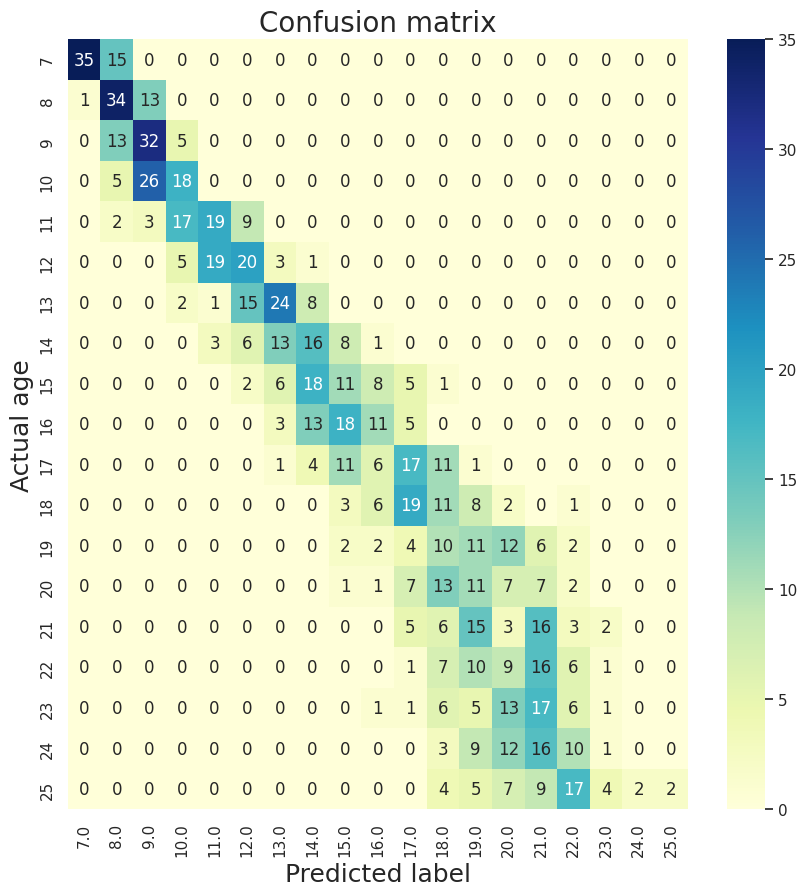

In [ ]:
#create CF
data = {'Actual': act_age,'Predicted' : age_predict}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_age, age_predict)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('Actual age',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_age,age_predict)
mse = mean_squared_error(act_age,age_predict)
rmse = mean_squared_error(act_age,age_predict,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.3637327677624602
MSE: 3.83457051961824
RMSE: 1.958205944128002


## R-squared (coefficient of determination)

In [ ]:
from sklearn.metrics import r2_score
 # Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average
print("R-squared:", r2_score(act_age, age_predict, multioutput= 'uniform_average'))
# Returns a full set of scores in case of multioutput input.
print("R-squared:", r2_score(act_age, age_predict, multioutput= 'raw_values'))
# Scores of all outputs are averaged, weighted by the variances of each individual output
print("R-squared:", r2_score(act_age, age_predict, multioutput= 'variance_weighted'))

R-squared: 0.8723684294250963
R-squared: [0.87236843]
R-squared: 0.8723684294250963


# Gender Prediction

In [ ]:
list_Classification_predict = []
for i in pred_list_classification:
  i = i[0][0]
  list_Classification_predict.append(i)

In [ ]:
list_Classification_predict

[0.0051415227,
 0.046190735,
 0.0064064255,
 2.0211812e-05,
 0.020909827,
 0.0034551108,
 0.015391847,
 0.3851656,
 0.015272347,
 0.0022833985,
 3.0007677e-05,
 0.000440554,
 0.027884834,
 0.007905862,
 1.5698799e-05,
 5.776386e-06,
 5.2829917e-05,
 0.00045018448,
 0.6983274,
 0.0086845895,
 0.074403755,
 0.4302884,
 0.0003509257,
 0.0036199961,
 0.025638461,
 0.99733114,
 0.768514,
 0.9876057,
 0.98859173,
 0.88156676,
 0.9936555,
 0.9999943,
 0.98829514,
 0.38999087,
 0.93652326,
 0.58577764,
 0.5524671,
 0.8373343,
 0.97813743,
 0.0029114985,
 0.3759018,
 0.03284166,
 0.0012772591,
 0.95572233,
 0.9924398,
 0.99999785,
 0.9999972,
 5.16142e-05,
 0.0014945334,
 3.506682e-06,
 2.611099e-06,
 0.28557068,
 0.008645972,
 0.9134671,
 0.008040763,
 0.8823744,
 0.009854536,
 0.31121948,
 0.6932376,
 0.12552781,
 0.9979619,
 3.8634054e-05,
 2.0540733e-07,
 1.557874e-05,
 1.3193197e-06,
 0.9988489,
 0.97348875,
 0.0029646337,
 0.00047245345,
 0.99902666,
 0.020179132,
 0.00018320107,
 0.07717

In [ ]:
print(type(list_Classification_predict))

<class 'list'>


In [ ]:
gender_predict_str = []
# ใช้ลูป for เพื่อแปลงค่าและเพิ่มเข้าใน NumPy array
for value in list_Classification_predict:
    if value >= 0.5:
        gender_predict_str = np.append(gender_predict_str, 'Male')
    else:
        gender_predict_str = np.append(gender_predict_str, 'Female')

# แสดงผลลัพธ์
print(gender_predict_str)

['Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Female' 'Female' 'Male' 'Male' 'Female' 'Female'
 'Male' 'Female' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female' 'Male'
 'Male' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Ma

In [ ]:
gender_predict_int = []
# ใช้ลูป for เพื่อแปลงค่าและเพิ่มเข้าใน NumPy array
for value in list_Classification_predict:
    if value >= 0.5:
        gender_predict_int = np.append(gender_predict_int, 1)
    else:
        gender_predict_int = np.append(gender_predict_int, 0)

# แสดงผลลัพธ์
print(gender_predict_int)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.

In [ ]:
test

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
938         25      F    Abnormal          Rt   
939         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  
0               0         Female  
1               0         Female  
2               0         Female  
3               0         Female  
4               0         Female  
..            ...            ...  
938             0         Female  
939             0         Female  
940             0         Female  
941             0         Female  
942             0         Female  

[943 rows x 8 columns]

In [ ]:
gender_predict_str # array str
act_gender_str = np.array(test['Gender_Predict'].tolist())

gender_predict_int # array int
act_gender_int = np.array(test['Gender_Class'].tolist()) #ค่าจริง

## confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_gender_str, gender_predict_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_gender_str, gender_predict_str))#performance

classifier accuracy = 87.38069989395547%
              precision    recall  f1-score   support

      Female       0.88      0.87      0.87       475
        Male       0.87      0.88      0.87       468

    accuracy                           0.87       943
   macro avg       0.87      0.87      0.87       943
weighted avg       0.87      0.87      0.87       943



Text(0.5, 76.24999999999999, 'Predicted label')

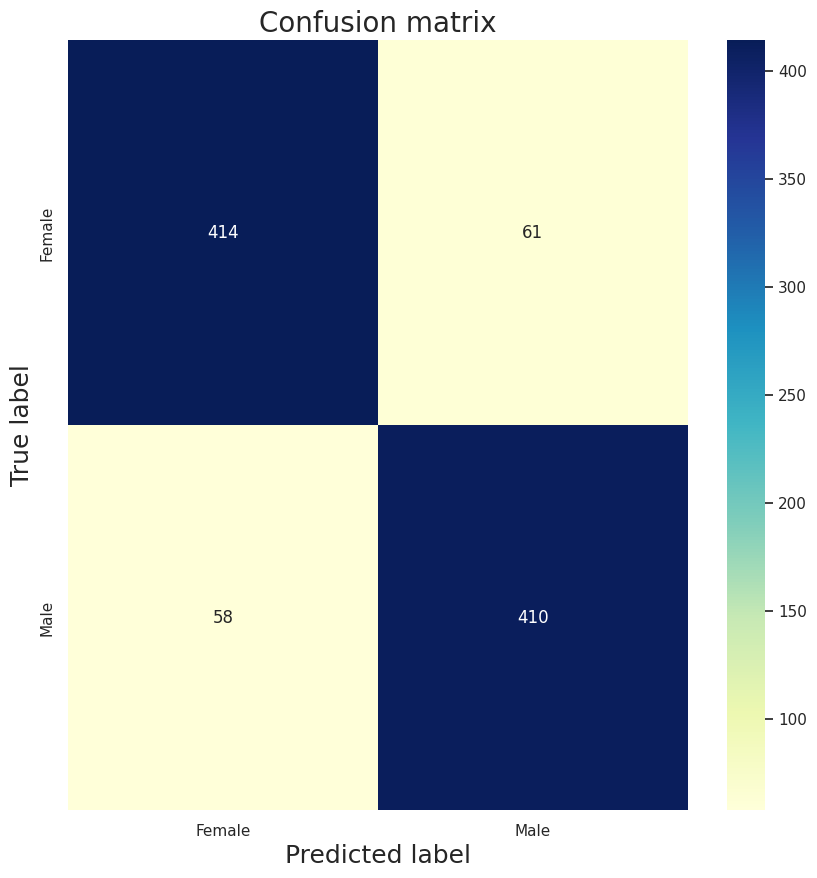

In [ ]:
#create CF
data = {'Actual': act_gender_str,'Predicted' : gender_predict_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_gender_str, gender_predict_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_gender_int,gender_predict_int)
mse = mean_squared_error(act_gender_int,gender_predict_int)
rmse = mean_squared_error(act_gender_int,gender_predict_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.1261930010604454
MSE: 0.1261930010604454
RMSE: 0.35523654240582486


# ROC

In [ ]:
list_Classification_predict

[0.0051415227,
 0.046190735,
 0.0064064255,
 2.0211812e-05,
 0.020909827,
 0.0034551108,
 0.015391847,
 0.3851656,
 0.015272347,
 0.0022833985,
 3.0007677e-05,
 0.000440554,
 0.027884834,
 0.007905862,
 1.5698799e-05,
 5.776386e-06,
 5.2829917e-05,
 0.00045018448,
 0.6983274,
 0.0086845895,
 0.074403755,
 0.4302884,
 0.0003509257,
 0.0036199961,
 0.025638461,
 0.99733114,
 0.768514,
 0.9876057,
 0.98859173,
 0.88156676,
 0.9936555,
 0.9999943,
 0.98829514,
 0.38999087,
 0.93652326,
 0.58577764,
 0.5524671,
 0.8373343,
 0.97813743,
 0.0029114985,
 0.3759018,
 0.03284166,
 0.0012772591,
 0.95572233,
 0.9924398,
 0.99999785,
 0.9999972,
 5.16142e-05,
 0.0014945334,
 3.506682e-06,
 2.611099e-06,
 0.28557068,
 0.008645972,
 0.9134671,
 0.008040763,
 0.8823744,
 0.009854536,
 0.31121948,
 0.6932376,
 0.12552781,
 0.9979619,
 3.8634054e-05,
 2.0540733e-07,
 1.557874e-05,
 1.3193197e-06,
 0.9988489,
 0.97348875,
 0.0029646337,
 0.00047245345,
 0.99902666,
 0.020179132,
 0.00018320107,
 0.07717

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = test['Gender_Class'].tolist()
predicted_probabilities = list_Classification_predict

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

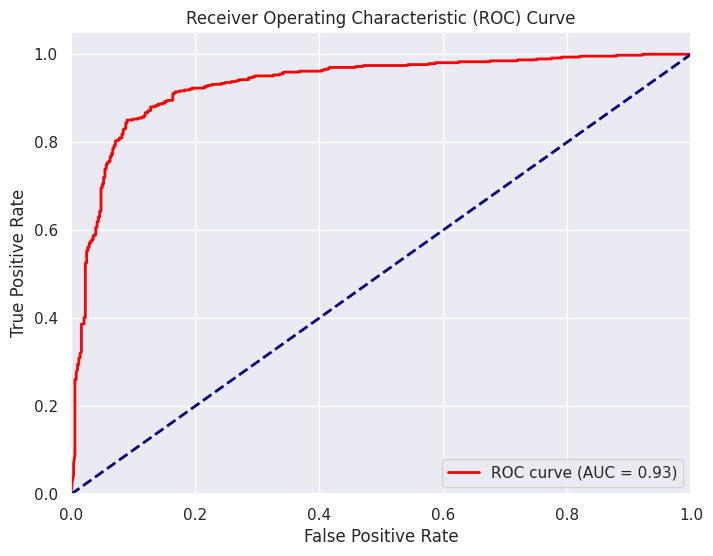

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# ตารางรวม

In [ ]:
#Regression
test['Age_predict'] = list_Regression_predict # ผลที่ทำนาย
test['Age_predict_int'] = age_predict

In [ ]:
test

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
938         25      F    Abnormal          Rt   
939         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  
0               0         Female     7.423394              7.0  
1               0         Female     7.415317              7.0  
2               0         Female     7.548305              8.0  
3               0         Female     7.492437              7.0  
4               0         Female     7.343049              7.0  
..            ...            ...          ...              ...  
938             0         Female    21.686237             22.0  
939             0         Female    21.118515             21.0  
940             0         Female    19.639421             20.0  
941             0         Female    21.359797             21.0  
942             0         Female    19.068129             19.0  

[943 rows x 10 columns]

In [ ]:
test['Gender_predict'] = list_Classification_predict # ผลที่ทำนาย
test['Gender_predict_str'] = gender_predict_str
test['Gender_predict_int'] = gender_predict_int

In [ ]:
test

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
938         25      F    Abnormal          Rt   
939         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423394              7.0   
1               0         Female     7.415317              7.0   
2               0         Female     7.548305              8.0   
3               0         Female     7.492437              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686237             22.0   
939             0         Female    21.118515             21.0   
940             0         Female    19.639421             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068129             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141523e-03             Female                 0.0  
1      4.619073e-02             Female                 0.0  
2      6.406425e-03             Female                 0.0  
3      2.021181e-05             Female                 0.0  
4      2.090983e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800772e-05             Female                 0.0  
939    1.193717e-01             Female                 0.0  
940    1.212690e-03             Female                 0.0  
941    3.044486e-09             Female                 0.0  
942    9.307751e-06             Female                 0.0  

[943 rows x 13 columns]

In [ ]:
#test.to_csv('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_test_Predict.csv')

# เปลี่ยนหน่วย แกน X ให้เหมือนแกน Y

In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
import pandas as pd
#import efficientnet.tfkeras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
test = pd.read_csv ('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_test_Predict.csv')
test

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 14 columns]

## AGE 7-25

In [ ]:
age_predict = np.array(test['Age_predict_int'].astype(int).tolist())
act_age = np.array( test['Age(year)'].tolist())

In [ ]:
age_predict

array([ 7,  7,  8,  7,  7,  7,  7,  7,  8,  8,  7,  7,  7,  7,  8,  8,  8,
        8,  7,  7,  7,  7,  7,  7,  7,  8,  8,  7,  7,  7,  7,  7,  7,  7,
        8,  7,  8,  8,  7,  7,  7,  7,  7,  8,  8,  8,  7,  7,  7,  8,  9,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  8,  9,
        9,  8,  8,  9,  8,  8,  8,  9,  9,  8,  7,  9,  9,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  8,  8,  8, 10, 10,  9,  8, 10, 10, 10,  9,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  8,  9,  9,  9,  9,  8,  8,  9,
        9,  9,  9,  8,  8,  9,  9,  9,  9,  9,  8,  8,  9,  8,  8,  8,  9,
        9,  9,  9,  9,  9, 10, 10,  9,  9,  9,  9, 10, 10, 10,  9, 10,  9,
        9,  8, 10,  9,  9,  8,  9,  9, 10, 10,  9,  9, 10, 10, 10,  9,  9,
        8,  8,  8,  9, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,  9,
       10, 10, 10, 11, 11, 10,  9, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12,
       12, 12, 11, 11, 11, 11, 10, 10, 10, 11, 11,  8,  8, 11, 11, 10, 10,
       11, 11, 11, 11, 12

In [ ]:
act_age

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

### confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_age, age_predict)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_age, age_predict))#performance

classifier accuracy = 30.858960763520678%
              precision    recall  f1-score   support

           7       0.97      0.70      0.81        50
           8       0.49      0.71      0.58        48
           9       0.43      0.64      0.52        50
          10       0.38      0.37      0.37        49
          11       0.45      0.38      0.41        50
          12       0.38      0.42      0.40        48
          13       0.48      0.48      0.48        50
          14       0.27      0.34      0.30        47
          15       0.20      0.22      0.21        51
          16       0.31      0.22      0.26        50
          17       0.27      0.33      0.30        51
          18       0.15      0.22      0.18        50
          19       0.15      0.22      0.18        49
          20       0.11      0.14      0.12        49
          21       0.18      0.32      0.23        50
          22       0.13      0.12      0.12        50
          23       0.11      0.02      

Text(0.5, 76.24999999999999, 'Predicted label')

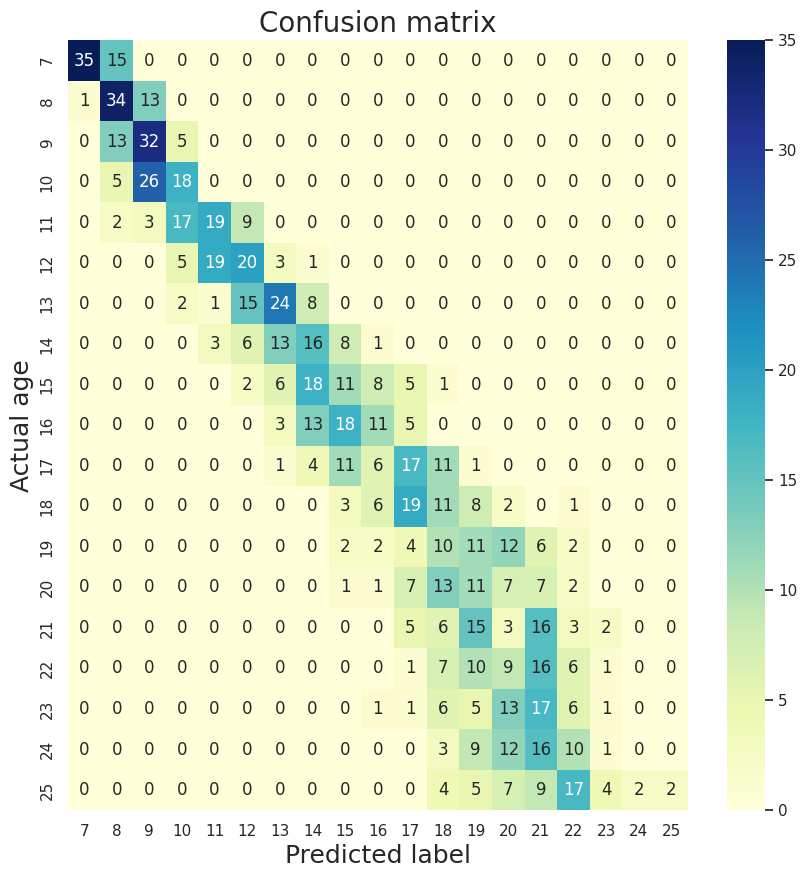

In [ ]:
#create CF
data = {'Actual': act_age,'Predicted' : age_predict}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_age, age_predict)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('Actual age',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_age,age_predict)
mse = mean_squared_error(act_age,age_predict)
rmse = mean_squared_error(act_age,age_predict,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.3637327677624602
MSE: 3.83457051961824
RMSE: 1.958205944128002


### R-squared (coefficient of determination)

In [ ]:
from sklearn.metrics import r2_score
 # Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average
print("R-squared:", r2_score(act_age, age_predict, multioutput= 'uniform_average'))
# Returns a full set of scores in case of multioutput input.
print("R-squared:", r2_score(act_age, age_predict, multioutput= 'raw_values'))
# Scores of all outputs are averaged, weighted by the variances of each individual output
print("R-squared:", r2_score(act_age, age_predict, multioutput= 'variance_weighted'))

R-squared: 0.8723684294250963
R-squared: [0.87236843]
R-squared: 0.8723684294250963


### correlation coefficient

In [ ]:
from scipy.stats import pearsonr

# Assuming act_age and age_predict are your arrays
# Calculate Pearson's correlation coefficient
correlation_coefficient, p_value = pearsonr(act_age, age_predict)

print("Pearson's correlation coefficient (R):", correlation_coefficient)
print("p-value:", p_value)

Pearson's correlation coefficient (R): 0.9565050612813515
p-value: 0.0


## Age (7-25)(separate)

### Evaluate (7-14)

In [ ]:
test

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 14 columns]

In [ ]:
Under = test[(test['Age(year)'] >= 7) & (test['Age(year)'] <= 14)]
Under

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
920         920         12      M    Abnormal          Lt   
921         921         12      M    Abnormal          Rt   
922         922         14      F    Abnormal          Lt   
923         923         14      F    Abnormal          Lt   
924         924         14      F    Abnormal          Rt   

                                             Path_Name       Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V74.jpg   
..                                                 ...            ...   
920  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipOO101.jpg   
921  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       OO98.jpg   
922  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipY95.jpg   
923  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipY187.jpg   
924  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       Y100.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
920             1           Male    11.618885             12.0   
921             1           Male    12.105593             12.0   
922             0         Female    14.101776             14.0   
923             0         Female    13.616200             14.0   
924             0         Female    14.041607             14.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0          0.005142             Female                 0.0  
1          0.046188             Female                 0.0  
2          0.006406             Female                 0.0  
3          0.000020             Female                 0.0  
4          0.020910             Female                 0.0  
..              ...                ...                 ...  
920        0.000028             Female                 0.0  
921        0.044166             Female                 0.0  
922        0.000650             Female                 0.0  
923        0.978944               Male                 1.0  
924        0.000008             Female                 0.0  

[392 rows x 14 columns]

#### confusion_matrix

In [ ]:
pred_under = np.array(Under['Age_predict_int'].astype(int).tolist())
act_under = np.array( Under['Age(year)'].tolist())

In [ ]:
pred_under

array([ 7,  7,  8,  7,  7,  7,  7,  7,  8,  8,  7,  7,  7,  7,  8,  8,  8,
        8,  7,  7,  7,  7,  7,  7,  7,  8,  8,  7,  7,  7,  7,  7,  7,  7,
        8,  7,  8,  8,  7,  7,  7,  7,  7,  8,  8,  8,  7,  7,  7,  8,  9,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  8,  9,
        9,  8,  8,  9,  8,  8,  8,  9,  9,  8,  7,  9,  9,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  8,  8,  8, 10, 10,  9,  8, 10, 10, 10,  9,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  8,  9,  9,  9,  9,  8,  8,  9,
        9,  9,  9,  8,  8,  9,  9,  9,  9,  9,  8,  8,  9,  8,  8,  8,  9,
        9,  9,  9,  9,  9, 10, 10,  9,  9,  9,  9, 10, 10, 10,  9, 10,  9,
        9,  8, 10,  9,  9,  8,  9,  9, 10, 10,  9,  9, 10, 10, 10,  9,  9,
        8,  8,  8,  9, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,  9,
       10, 10, 10, 11, 11, 10,  9, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12,
       12, 12, 11, 11, 11, 11, 10, 10, 10, 11, 11,  8,  8, 11, 11, 10, 10,
       11, 11, 11, 11, 12

In [ ]:
act_under

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_under, pred_under )
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_under, pred_under))#performance

classifier accuracy = 50.51020408163265%
              precision    recall  f1-score   support

           7       0.97      0.70      0.81        50
           8       0.49      0.71      0.58        48
           9       0.43      0.64      0.52        50
          10       0.38      0.37      0.37        49
          11       0.45      0.38      0.41        50
          12       0.40      0.42      0.41        48
          13       0.60      0.48      0.53        50
          14       0.64      0.34      0.44        47
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0

    accuracy                           0.51       392
   macro avg       0.44      0.40      0.41       392
weighted avg       0.55      0.51      0.51       392



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

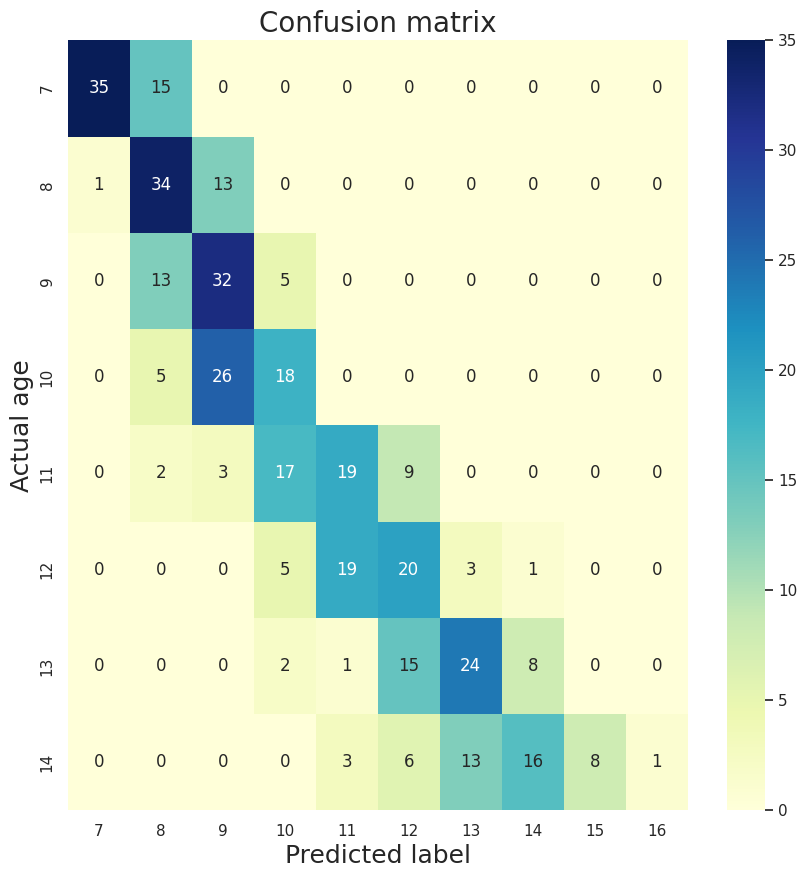

In [ ]:
#create CF
data = {'Actual': act_under,'Predicted' : pred_under }
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_under, pred_under )

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('Actual age',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

#### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_under,pred_under)
mse = mean_squared_error(act_under,pred_under)
rmse = mean_squared_error(act_under,pred_under,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.5867346938775511
MSE: 0.8061224489795918
RMSE: 0.8978432207126096


#### R-squared (coefficient of determination)

In [ ]:
from sklearn.metrics import r2_score
 # Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average
print("R-squared:", r2_score(act_under, pred_under, multioutput= 'uniform_average'))
# Returns a full set of scores in case of multioutput input.
print("R-squared:", r2_score(act_under, pred_under, multioutput= 'raw_values'))
# Scores of all outputs are averaged, weighted by the variances of each individual output
print("R-squared:", r2_score(act_under, pred_under, multioutput= 'variance_weighted'))

R-squared: 0.8455399716696925
R-squared: [0.84553997]
R-squared: 0.8455399716696925


#### correlation coefficient

In [ ]:
from scipy.stats import pearsonr

# Assuming act_age and age_predict are your arrays
# Calculate Pearson's correlation coefficient
correlation_coefficient, p_value = pearsonr(act_under, pred_under)

print("Pearson's correlation coefficient (R):", correlation_coefficient)
print("p-value:", p_value)

Pearson's correlation coefficient (R): 0.9269409779098877
p-value: 4.023815483643096e-168


### Evaluate (15-23)

In [ ]:
Upper = test[(test['Age(year)'] >= 15) & (test['Age(year)'] <= 23)]
Upper

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
375         375         15      F      Normal        Both   
376         376         15      F      Normal        Both   
377         377         15      F      Normal        Both   
378         378         15      F      Normal        Both   
379         379         15      F      Normal        Both   
..          ...        ...    ...         ...         ...   
930         930         20      F    Abnormal          Rt   
931         931         20      M    Abnormal          Lt   
932         932         21      M    Abnormal          Lt   
933         933         22      F    Abnormal          Rt   
934         934         23      M    Abnormal          Rt   

                                             Path_Name      Filename  \
375  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B148.jpg   
376  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB148.jpg   
377  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B153.jpg   
378  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB153.jpg   
379  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B157.jpg   
..                                                 ...           ...   
930  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       Q49.jpg   
931  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ412.jpg   
932  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN379.jpg   
933  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U136.jpg   
934  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       E38.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
375             0         Female    14.368689             14.0   
376             0         Female    13.935123             14.0   
377             0         Female    15.182503             15.0   
378             0         Female    15.731332             16.0   
379             0         Female    15.056389             15.0   
..            ...            ...          ...              ...   
930             0         Female    20.701864             21.0   
931             1           Male    19.867065             20.0   
932             1           Male    19.349910             19.0   
933             0         Female    20.846346             21.0   
934             1           Male    18.476170             18.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
375        0.003458             Female                 0.0  
376        0.001270             Female                 0.0  
377        0.672907               Male                 1.0  
378        0.509306               Male                 1.0  
379        0.000009             Female                 0.0  
..              ...                ...                 ...  
930        0.000186             Female                 0.0  
931        0.999999               Male                 1.0  
932        1.000000               Male                 1.0  
933        0.001581             Female                 0.0  
934        1.000000               Male                 1.0  

[450 rows x 14 columns]

#### confusion_matrix

In [ ]:
pred_upper = np.array(Upper['Age_predict_int'].astype(int).tolist())
act_upper = np.array( Upper['Age(year)'].tolist())

In [ ]:
pred_upper

array([14, 14, 15, 16, 15, 15, 15, 14, 15, 15, 17, 17, 16, 14, 18, 17, 14,
       14, 16, 16, 14, 14, 17, 16, 15, 14, 16, 16, 12, 12, 16, 15, 14, 14,
       14, 13, 13, 13, 14, 14, 13, 14, 14, 14, 13, 15, 13, 15, 15, 14, 17,
       15, 15, 16, 15, 15, 16, 16, 15, 14, 13, 15, 16, 14, 14, 17, 17, 14,
       15, 15, 15, 17, 16, 13, 16, 15, 15, 15, 15, 14, 15, 16, 16, 16, 14,
       15, 17, 17, 16, 16, 14, 15, 14, 14, 15, 15, 13, 15, 15, 18, 18, 17,
       16, 15, 15, 17, 16, 17, 18, 17, 17, 17, 17, 15, 14, 18, 18, 15, 15,
       14, 17, 18, 17, 16, 16, 17, 17, 17, 18, 18, 17, 18, 19, 17, 17, 18,
       17, 16, 16, 15, 14, 18, 17, 15, 15, 13, 14, 17, 16, 18, 16, 17, 16,
       17, 18, 17, 17, 22, 18, 19, 17, 19, 17, 19, 18, 18, 17, 17, 18, 20,
       18, 18, 15, 15, 16, 17, 19, 19, 17, 17, 17, 15, 18, 17, 16, 16, 17,
       17, 17, 17, 18, 19, 20, 19, 17, 18, 19, 18, 17, 20, 18, 21, 20, 20,
       20, 19, 18, 20, 20, 20, 19, 19, 20, 21, 21, 22, 19, 17, 15, 18, 15,
       18, 18, 22, 21, 18

In [ ]:
act_upper

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_upper, pred_upper)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_upper, pred_upper))#performance

classifier accuracy = 20.22222222222222%
              precision    recall  f1-score   support

          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.24      0.22      0.23        51
          16       0.31      0.22      0.26        50
          17       0.27      0.33      0.30        51
          18       0.17      0.22      0.19        50
          19       0.18      0.22      0.20        49
          20       0.15      0.14      0.15        49
          21       0.26      0.32      0.29        50
          22       0.30      0.12      0.17        50
          23       0.25      0.02      0.04        50

    accuracy                           0.20       450
   macro avg       0.18      0.15      0.15       450
weighted avg       0.24      0.20      0.20       450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

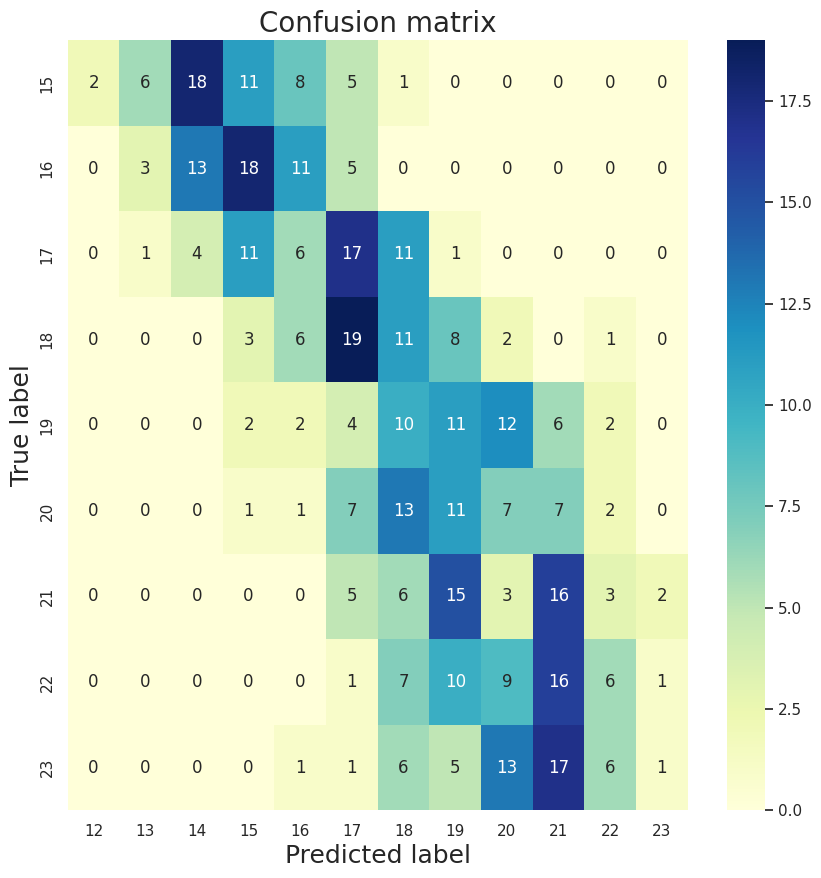

In [ ]:
#create CF
data = {'Actual': act_upper,'Predicted' : pred_upper}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_upper, pred_upper)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

#### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_upper,pred_upper)
mse = mean_squared_error(act_upper,pred_upper)
rmse = mean_squared_error(act_upper,pred_upper,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.5244444444444445
MSE: 3.831111111111111
RMSE: 1.9573224341204265


####R-squared (coefficient of determination)

In [ ]:
from sklearn.metrics import r2_score
 # Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average
print("R-squared:", r2_score(act_upper, pred_upper, multioutput= 'uniform_average'))
# Returns a full set of scores in case of multioutput input.
print("R-squared:", r2_score(act_upper, pred_upper, multioutput= 'raw_values'))
# Scores of all outputs are averaged, weighted by the variances of each individual output
print("R-squared:", r2_score(act_upper, pred_upper, multioutput= 'variance_weighted'))

R-squared: 0.428929386139576
R-squared: [0.42892939]
R-squared: 0.428929386139576


#### correlation coefficient

When you use np.corrcoef(act_age, age_predict), it returns a 2x2 correlation matrix. To access the correlation coefficient between act_age and age_predict, you need to retrieve the element at row 0, column 1 (or row 1, column 0, since correlation matrices are symmetric)

In [ ]:
from scipy.stats import pearsonr

# Assuming act_age and age_predict are your arrays
# Calculate Pearson's correlation coefficient
correlation_coefficient, p_value = pearsonr(act_upper, pred_upper)

print("Pearson's correlation coefficient (R):", correlation_coefficient)
print("p-value:", p_value)

Pearson's correlation coefficient (R): 0.7891466291514605
p-value: 6.960660864980652e-97


### Evaluate (7-23)

In [ ]:
all = test[(test['Age(year)'] >= 7) & (test['Age(year)'] <= 23)]
all

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
930         930         20      F    Abnormal          Rt   
931         931         20      M    Abnormal          Lt   
932         932         21      M    Abnormal          Lt   
933         933         22      F    Abnormal          Rt   
934         934         23      M    Abnormal          Rt   

                                             Path_Name      Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V74.jpg   
..                                                 ...           ...   
930  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       Q49.jpg   
931  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ412.jpg   
932  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN379.jpg   
933  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U136.jpg   
934  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       E38.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
930             0         Female    20.701864             21.0   
931             1           Male    19.867065             20.0   
932             1           Male    19.349910             19.0   
933             0         Female    20.846346             21.0   
934             1           Male    18.476170             18.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0          0.005142             Female                 0.0  
1          0.046188             Female                 0.0  
2          0.006406             Female                 0.0  
3          0.000020             Female                 0.0  
4          0.020910             Female                 0.0  
..              ...                ...                 ...  
930        0.000186             Female                 0.0  
931        0.999999               Male                 1.0  
932        1.000000               Male                 1.0  
933        0.001581             Female                 0.0  
934        1.000000               Male                 1.0  

[842 rows x 14 columns]

#### confusion_matrix

In [ ]:
pred_all = np.array(all['Age_predict_int'].astype(int).tolist())
act_all = np.array( all['Age(year)'].tolist())

In [ ]:
pred_all

array([ 7,  7,  8,  7,  7,  7,  7,  7,  8,  8,  7,  7,  7,  7,  8,  8,  8,
        8,  7,  7,  7,  7,  7,  7,  7,  8,  8,  7,  7,  7,  7,  7,  7,  7,
        8,  7,  8,  8,  7,  7,  7,  7,  7,  8,  8,  8,  7,  7,  7,  8,  9,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  8,  9,
        9,  8,  8,  9,  8,  8,  8,  9,  9,  8,  7,  9,  9,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  8,  8,  8, 10, 10,  9,  8, 10, 10, 10,  9,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  8,  9,  9,  9,  9,  8,  8,  9,
        9,  9,  9,  8,  8,  9,  9,  9,  9,  9,  8,  8,  9,  8,  8,  8,  9,
        9,  9,  9,  9,  9, 10, 10,  9,  9,  9,  9, 10, 10, 10,  9, 10,  9,
        9,  8, 10,  9,  9,  8,  9,  9, 10, 10,  9,  9, 10, 10, 10,  9,  9,
        8,  8,  8,  9, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,  9,
       10, 10, 10, 11, 11, 10,  9, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12,
       12, 12, 11, 11, 11, 11, 10, 10, 10, 11, 11,  8,  8, 11, 11, 10, 10,
       11, 11, 11, 11, 12

In [ ]:
act_all

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_all, pred_all)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_all, pred_all))#performance

classifier accuracy = 34.32304038004751%
              precision    recall  f1-score   support

           7       0.97      0.70      0.81        50
           8       0.49      0.71      0.58        48
           9       0.43      0.64      0.52        50
          10       0.38      0.37      0.37        49
          11       0.45      0.38      0.41        50
          12       0.38      0.42      0.40        48
          13       0.48      0.48      0.48        50
          14       0.27      0.34      0.30        47
          15       0.20      0.22      0.21        51
          16       0.31      0.22      0.26        50
          17       0.27      0.33      0.30        51
          18       0.17      0.22      0.19        50
          19       0.18      0.22      0.20        49
          20       0.15      0.14      0.15        49
          21       0.26      0.32      0.29        50
          22       0.30      0.12      0.17        50
          23       0.25      0.02      0

Text(0.5, 76.24999999999999, 'Predicted label')

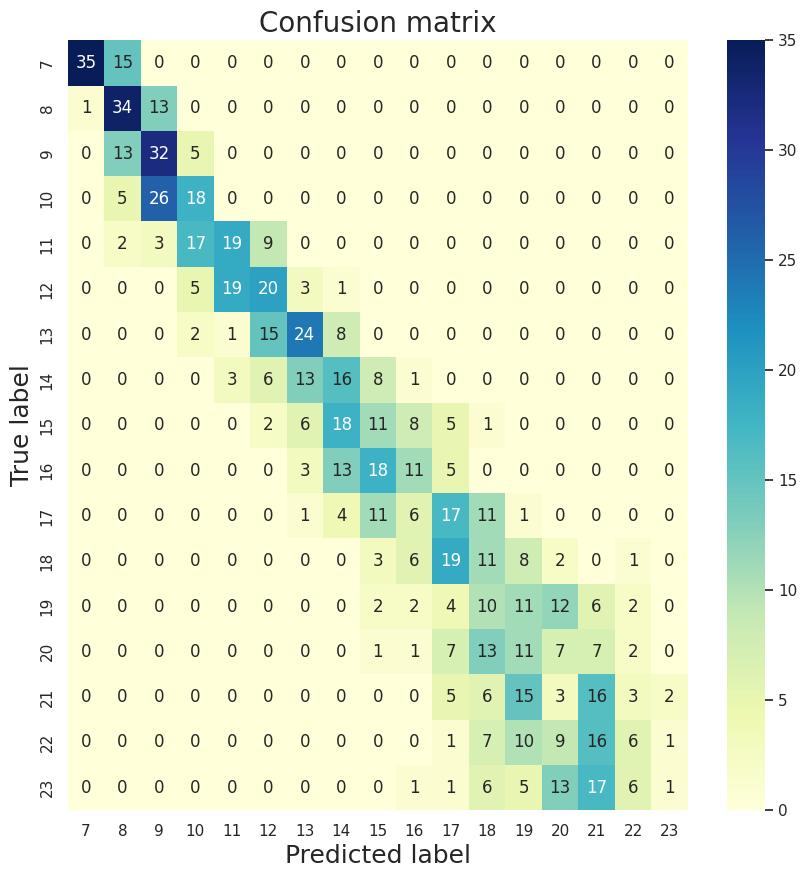

In [ ]:
#create CF
data = {'Actual': act_all,'Predicted' : pred_all}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_all, pred_all)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

#### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_all,pred_all)
mse = mean_squared_error(act_all,pred_all)
rmse = mean_squared_error(act_all,pred_all,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.0878859857482186
MSE: 2.4228028503562946
RMSE: 1.5565355281381452


#### R-squared (coefficient of determination)

In [ ]:
from sklearn.metrics import r2_score
 # Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average
print("R-squared:", r2_score(act_all, pred_all, multioutput= 'uniform_average'))
# Returns a full set of scores in case of multioutput input.
print("R-squared:", r2_score(act_all, pred_all, multioutput= 'raw_values'))
# Scores of all outputs are averaged, weighted by the variances of each individual output
print("R-squared:", r2_score(act_all, pred_all, multioutput= 'variance_weighted'))

R-squared: 0.8991021887567032
R-squared: [0.89910219]
R-squared: 0.8991021887567032


#### correlation coefficient

In [ ]:
from scipy.stats import pearsonr

# Assuming act_age and age_predict are your arrays
# Calculate Pearson's correlation coefficient
correlation_coefficient, p_value = pearsonr(act_all, pred_all)

print("Pearson's correlation coefficient (R):", correlation_coefficient)
print("p-value:", p_value)

Pearson's correlation coefficient (R): 0.9594104330906861
p-value: 0.0


# Gender

## Evaluate 7-25 Years

In [ ]:
test

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 14 columns]

In [ ]:
test7_25Y = test[(test['Age(year)'] >= 7) & (test['Age(year)'] <= 25)]
test7_25Y

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 14 columns]

In [ ]:
pred_str = np.array(test7_25Y['Gender_predict_str'].tolist()) #แปลงเป็น array
act_str = np.array(test7_25Y['Gender_Predict'].tolist())

pred_int = np.array(test7_25Y['Gender_predict_int'].tolist()) #แปลงเป็น array
act_int = np.array(test7_25Y['Gender_Class'].tolist()) #ค่าจริง

### confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 87.38069989395547%
              precision    recall  f1-score   support

      Female       0.88      0.87      0.87       475
        Male       0.87      0.88      0.87       468

    accuracy                           0.87       943
   macro avg       0.87      0.87      0.87       943
weighted avg       0.87      0.87      0.87       943



Text(0.5, 76.24999999999999, 'Predicted label')

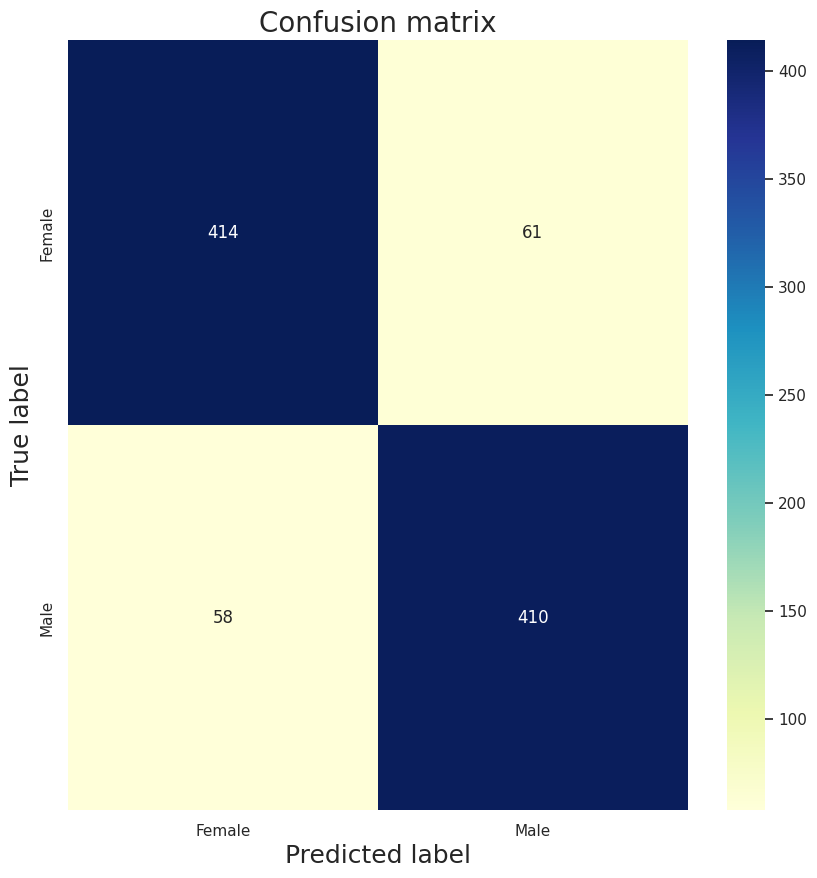

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### ROC

In [ ]:
test7_25Y['Gender_predict'].tolist()

[0.0051419446,
 0.04618836,
 0.0064064977,
 2.021052e-05,
 0.02091009,
 0.003454922,
 0.015389305,
 0.3851671,
 0.0152719375,
 0.0022832726,
 3.0007966e-05,
 0.000440542,
 0.02788532,
 0.0079063,
 1.5700072e-05,
 5.7759785e-06,
 5.2831227e-05,
 0.00045017607,
 0.69832766,
 0.008684845,
 0.07440577,
 0.43028036,
 0.0003508991,
 0.0036199328,
 0.0256369,
 0.99733114,
 0.7685144,
 0.98760545,
 0.98859286,
 0.88157,
 0.9936551,
 0.9999943,
 0.98829424,
 0.3899878,
 0.9365203,
 0.58580166,
 0.5524538,
 0.8373314,
 0.9781376,
 0.0029114098,
 0.37590548,
 0.032842718,
 0.0012772566,
 0.9557221,
 0.9924396,
 0.99999785,
 0.99999726,
 5.1613413e-05,
 0.0014946216,
 3.5068256e-06,
 2.6111438e-06,
 0.2856237,
 0.008646245,
 0.9134681,
 0.008040387,
 0.88236225,
 0.009853866,
 0.3112304,
 0.6932378,
 0.12553206,
 0.99796224,
 3.863405e-05,
 2.0540617e-07,
 1.5578222e-05,
 1.3192065e-06,
 0.9988493,
 0.9734886,
 0.002964834,
 0.00047244332,
 0.9990268,
 0.02018398,
 0.0001832182,
 0.07717843,
 0.02

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = test7_25Y['Gender_Class'].tolist()
predicted_probabilities = test7_25Y['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

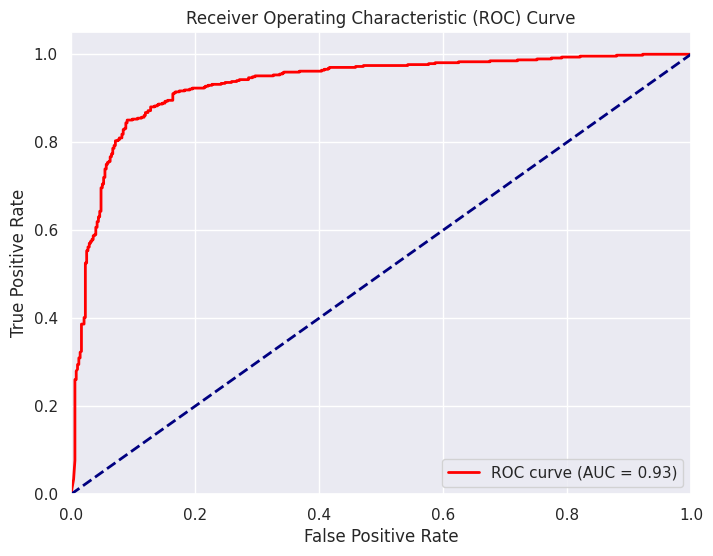

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.1261930010604454
MSE: 0.1261930010604454
RMSE: 0.35523654240582486


## Evaluate 7-14 Years

In [ ]:
test

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 14 columns]

In [ ]:
test7_14Y = test[(test['Age(year)'] >= 7) & (test['Age(year)'] <= 14)]
test7_14Y

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
920         920         12      M    Abnormal          Lt   
921         921         12      M    Abnormal          Rt   
922         922         14      F    Abnormal          Lt   
923         923         14      F    Abnormal          Lt   
924         924         14      F    Abnormal          Rt   

                                             Path_Name       Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V74.jpg   
..                                                 ...            ...   
920  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipOO101.jpg   
921  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       OO98.jpg   
922  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipY95.jpg   
923  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipY187.jpg   
924  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       Y100.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
920             1           Male    11.618885             12.0   
921             1           Male    12.105593             12.0   
922             0         Female    14.101776             14.0   
923             0         Female    13.616200             14.0   
924             0         Female    14.041607             14.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0          0.005142             Female                 0.0  
1          0.046188             Female                 0.0  
2          0.006406             Female                 0.0  
3          0.000020             Female                 0.0  
4          0.020910             Female                 0.0  
..              ...                ...                 ...  
920        0.000028             Female                 0.0  
921        0.044166             Female                 0.0  
922        0.000650             Female                 0.0  
923        0.978944               Male                 1.0  
924        0.000008             Female                 0.0  

[392 rows x 14 columns]

In [ ]:
# test['Predict_float'] = pred_list
# test['Predict_int'] = int_pred
# test['Predict_str'] = list_pred
# # แสดง DataFrame
# test

In [ ]:
pred_str = np.array(test7_14Y['Gender_predict_str'].tolist()) #แปลงเป็น array
act_str = np.array(test7_14Y['Gender_Predict'].tolist())

pred_int = np.array(test7_14Y['Gender_predict_int'].tolist()) #แปลงเป็น array
act_int = np.array(test7_14Y['Gender_Class'].tolist()) #ค่าจริง

### confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 80.61224489795919%
              precision    recall  f1-score   support

      Female       0.81      0.81      0.81       199
        Male       0.80      0.80      0.80       193

    accuracy                           0.81       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.81      0.81      0.81       392



Text(0.5, 76.24999999999999, 'Predicted label')

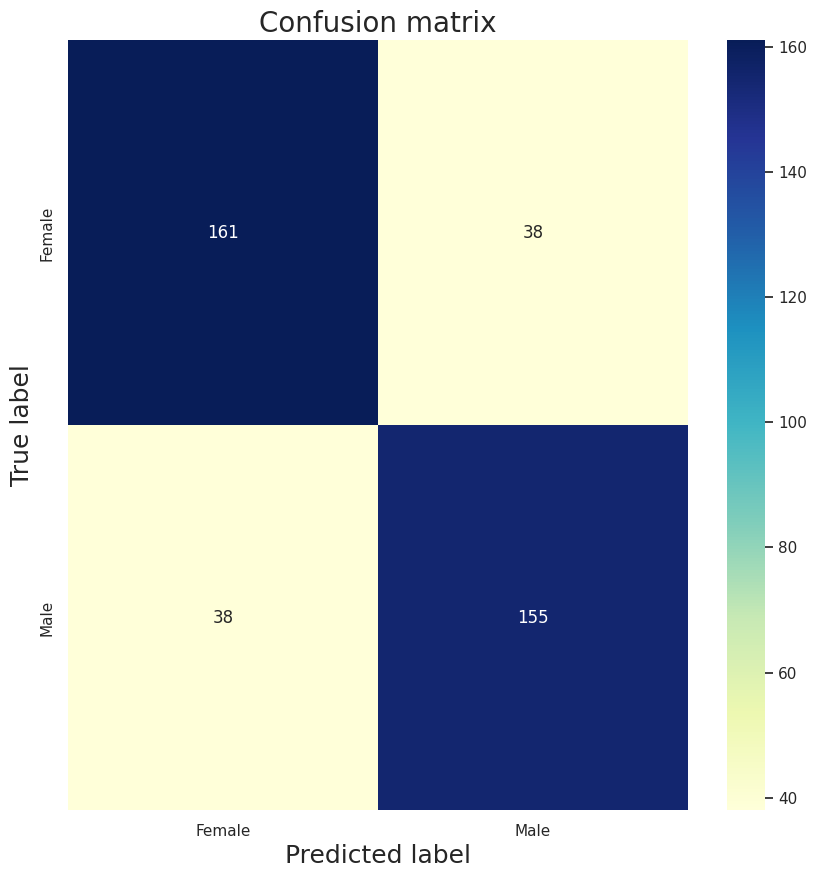

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### ROC

In [ ]:
test7_14Y['Gender_predict'].tolist()

[0.0051419446,
 0.04618836,
 0.0064064977,
 2.021052e-05,
 0.02091009,
 0.003454922,
 0.015389305,
 0.3851671,
 0.0152719375,
 0.0022832726,
 3.0007966e-05,
 0.000440542,
 0.02788532,
 0.0079063,
 1.5700072e-05,
 5.7759785e-06,
 5.2831227e-05,
 0.00045017607,
 0.69832766,
 0.008684845,
 0.07440577,
 0.43028036,
 0.0003508991,
 0.0036199328,
 0.0256369,
 0.99733114,
 0.7685144,
 0.98760545,
 0.98859286,
 0.88157,
 0.9936551,
 0.9999943,
 0.98829424,
 0.3899878,
 0.9365203,
 0.58580166,
 0.5524538,
 0.8373314,
 0.9781376,
 0.0029114098,
 0.37590548,
 0.032842718,
 0.0012772566,
 0.9557221,
 0.9924396,
 0.99999785,
 0.99999726,
 5.1613413e-05,
 0.0014946216,
 3.5068256e-06,
 2.6111438e-06,
 0.2856237,
 0.008646245,
 0.9134681,
 0.008040387,
 0.88236225,
 0.009853866,
 0.3112304,
 0.6932378,
 0.12553206,
 0.99796224,
 3.863405e-05,
 2.0540617e-07,
 1.5578222e-05,
 1.3192065e-06,
 0.9988493,
 0.9734886,
 0.002964834,
 0.00047244332,
 0.9990268,
 0.02018398,
 0.0001832182,
 0.07717843,
 0.02

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = test7_14Y['Gender_Class'].tolist()
predicted_probabilities = test7_14Y['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

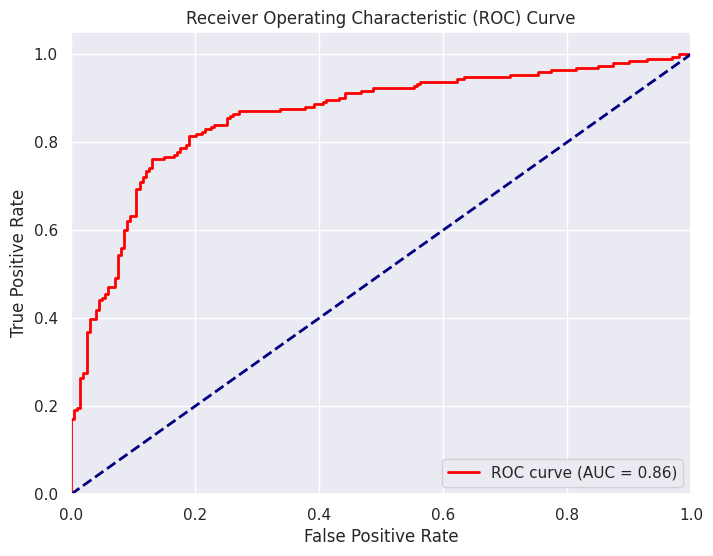

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.19387755102040816
MSE: 0.19387755102040816
RMSE: 0.44031528592635544


## Evaluate 15-24 Years

In [ ]:
test

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 14 columns]

In [ ]:
test15_24Y = test[(test['Age(year)'] >= 15) & (test['Age(year)'] <= 24)]
test15_24Y

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
375         375         15      F      Normal        Both   
376         376         15      F      Normal        Both   
377         377         15      F      Normal        Both   
378         378         15      F      Normal        Both   
379         379         15      F      Normal        Both   
..          ...        ...    ...         ...         ...   
932         932         21      M    Abnormal          Lt   
933         933         22      F    Abnormal          Rt   
934         934         23      M    Abnormal          Rt   
935         935         24      M    Abnormal          Rt   
936         936         24      M    Abnormal          Rt   

                                             Path_Name      Filename  \
375  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B148.jpg   
376  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB148.jpg   
377  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B153.jpg   
378  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB153.jpg   
379  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B157.jpg   
..                                                 ...           ...   
932  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN379.jpg   
933  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U136.jpg   
934  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       E38.jpg   
935  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       Z36.jpg   
936  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       Z92.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
375             0         Female    14.368689             14.0   
376             0         Female    13.935123             14.0   
377             0         Female    15.182503             15.0   
378             0         Female    15.731332             16.0   
379             0         Female    15.056389             15.0   
..            ...            ...          ...              ...   
932             1           Male    19.349910             19.0   
933             0         Female    20.846346             21.0   
934             1           Male    18.476170             18.0   
935             1           Male    21.892431             22.0   
936             1           Male    20.768534             21.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
375        0.003458             Female                 0.0  
376        0.001270             Female                 0.0  
377        0.672907               Male                 1.0  
378        0.509306               Male                 1.0  
379        0.000009             Female                 0.0  
..              ...                ...                 ...  
932        1.000000               Male                 1.0  
933        0.001581             Female                 0.0  
934        1.000000               Male                 1.0  
935        0.999999               Male                 1.0  
936        1.000000               Male                 1.0  

[501 rows x 14 columns]

In [ ]:
pred_str = np.array(test15_24Y['Gender_predict_str'].tolist()) #แปลงเป็น array
act_str = np.array(test15_24Y['Gender_Predict'].tolist())

pred_int = np.array(test15_24Y['Gender_predict_int'].tolist()) #แปลงเป็น array
act_int = np.array(test15_24Y['Gender_Class'].tolist()) #ค่าจริง

### confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 93.41317365269461%
              precision    recall  f1-score   support

      Female       0.93      0.94      0.93       251
        Male       0.94      0.92      0.93       250

    accuracy                           0.93       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.93      0.93      0.93       501



Text(0.5, 76.24999999999999, 'Predicted label')

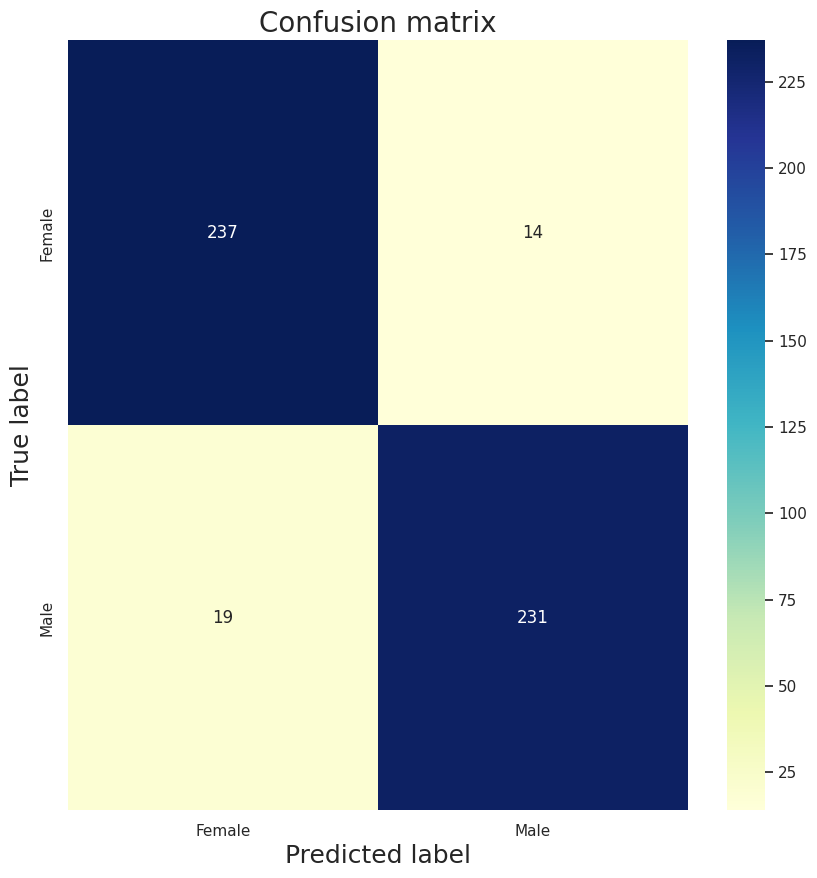

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### ROC

In [ ]:
test15_24Y['Gender_predict'].tolist()

[0.0034578126,
 0.0012702232,
 0.67290705,
 0.5093056,
 8.892038e-06,
 2.9480609e-05,
 0.042212225,
 0.0156036215,
 1.6495691e-05,
 0.00021421675,
 2.5366759e-05,
 0.007028648,
 8.06935e-09,
 2.9704397e-09,
 1.3902727e-08,
 1.644113e-06,
 0.017183125,
 0.6184418,
 0.001527493,
 1.4095249e-05,
 2.124603e-07,
 2.754353e-07,
 0.017210366,
 0.04520786,
 2.3878014e-05,
 5.0664476e-05,
 0.9999919,
 0.99995315,
 0.097133495,
 0.057306092,
 0.9989673,
 0.9998685,
 0.99999523,
 0.9999981,
 0.9999696,
 0.99880636,
 0.82849413,
 0.8503436,
 0.9378561,
 0.8882066,
 0.9917631,
 0.94986165,
 0.9999999,
 0.010760867,
 0.89237833,
 0.9581469,
 0.2707862,
 0.99995387,
 0.99815303,
 0.25988138,
 0.00019698263,
 0.0034936005,
 0.012254145,
 0.0012809846,
 0.028919058,
 3.752907e-05,
 5.2189876e-05,
 8.160347e-05,
 3.5693913e-05,
 0.0025891128,
 0.012062567,
 0.013502905,
 0.007285762,
 7.2656906e-07,
 3.257711e-05,
 1.6820133e-05,
 1.6076521e-05,
 0.9571504,
 0.4199316,
 0.13314931,
 0.008753655,
 0.9232

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = test15_24Y['Gender_Class'].tolist()
predicted_probabilities = test15_24Y['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

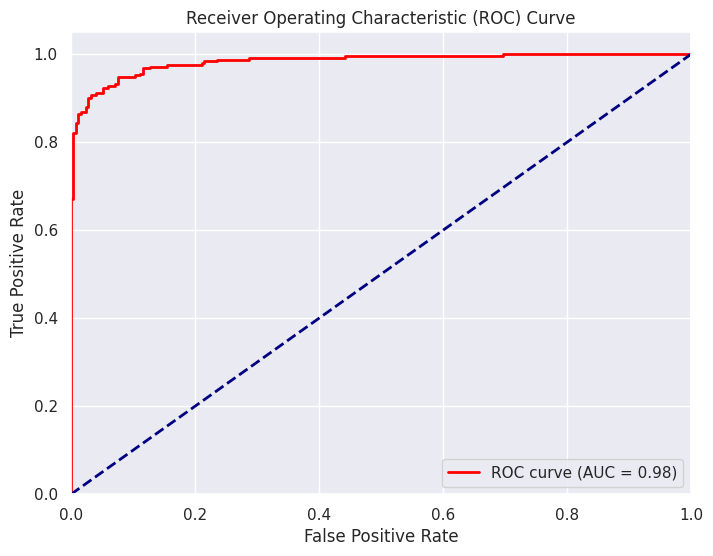

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.0658682634730539
MSE: 0.0658682634730539
RMSE: 0.25664813163756695


## Evaluate 15-23 Years

In [ ]:
test

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 14 columns]

In [ ]:
test15_23Y = test[(test['Age(year)'] >= 15) & (test['Age(year)'] <= 23)]
test15_23Y

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
375         375         15      F      Normal        Both   
376         376         15      F      Normal        Both   
377         377         15      F      Normal        Both   
378         378         15      F      Normal        Both   
379         379         15      F      Normal        Both   
..          ...        ...    ...         ...         ...   
930         930         20      F    Abnormal          Rt   
931         931         20      M    Abnormal          Lt   
932         932         21      M    Abnormal          Lt   
933         933         22      F    Abnormal          Rt   
934         934         23      M    Abnormal          Rt   

                                             Path_Name      Filename  \
375  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B148.jpg   
376  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB148.jpg   
377  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B153.jpg   
378  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB153.jpg   
379  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B157.jpg   
..                                                 ...           ...   
930  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       Q49.jpg   
931  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ412.jpg   
932  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN379.jpg   
933  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U136.jpg   
934  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       E38.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
375             0         Female    14.368689             14.0   
376             0         Female    13.935123             14.0   
377             0         Female    15.182503             15.0   
378             0         Female    15.731332             16.0   
379             0         Female    15.056389             15.0   
..            ...            ...          ...              ...   
930             0         Female    20.701864             21.0   
931             1           Male    19.867065             20.0   
932             1           Male    19.349910             19.0   
933             0         Female    20.846346             21.0   
934             1           Male    18.476170             18.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
375        0.003458             Female                 0.0  
376        0.001270             Female                 0.0  
377        0.672907               Male                 1.0  
378        0.509306               Male                 1.0  
379        0.000009             Female                 0.0  
..              ...                ...                 ...  
930        0.000186             Female                 0.0  
931        0.999999               Male                 1.0  
932        1.000000               Male                 1.0  
933        0.001581             Female                 0.0  
934        1.000000               Male                 1.0  

[450 rows x 14 columns]

In [ ]:
pred_str = np.array(test15_23Y['Gender_predict_str'].tolist()) #แปลงเป็น array
act_str = np.array(test15_23Y['Gender_Predict'].tolist())

pred_int = np.array(test15_23Y['Gender_predict_int'].tolist()) #แปลงเป็น array
act_int = np.array(test15_23Y['Gender_Class'].tolist()) #ค่าจริง

### confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 93.33333333333333%
              precision    recall  f1-score   support

      Female       0.92      0.95      0.93       225
        Male       0.95      0.92      0.93       225

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450



Text(0.5, 76.24999999999999, 'Predicted label')

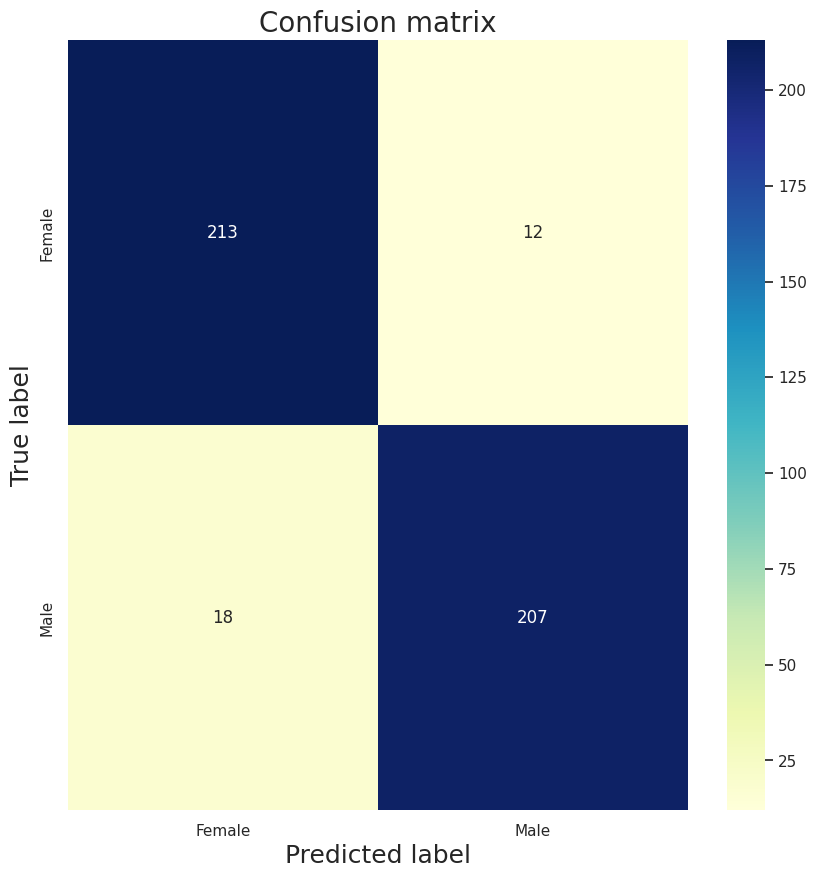

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### ROC

In [ ]:
test15_23Y['Gender_predict'].tolist()

[0.0034578126,
 0.0012702232,
 0.67290705,
 0.5093056,
 8.892038e-06,
 2.9480609e-05,
 0.042212225,
 0.0156036215,
 1.6495691e-05,
 0.00021421675,
 2.5366759e-05,
 0.007028648,
 8.06935e-09,
 2.9704397e-09,
 1.3902727e-08,
 1.644113e-06,
 0.017183125,
 0.6184418,
 0.001527493,
 1.4095249e-05,
 2.124603e-07,
 2.754353e-07,
 0.017210366,
 0.04520786,
 2.3878014e-05,
 5.0664476e-05,
 0.9999919,
 0.99995315,
 0.097133495,
 0.057306092,
 0.9989673,
 0.9998685,
 0.99999523,
 0.9999981,
 0.9999696,
 0.99880636,
 0.82849413,
 0.8503436,
 0.9378561,
 0.8882066,
 0.9917631,
 0.94986165,
 0.9999999,
 0.010760867,
 0.89237833,
 0.9581469,
 0.2707862,
 0.99995387,
 0.99815303,
 0.25988138,
 0.00019698263,
 0.0034936005,
 0.012254145,
 0.0012809846,
 0.028919058,
 3.752907e-05,
 5.2189876e-05,
 8.160347e-05,
 3.5693913e-05,
 0.0025891128,
 0.012062567,
 0.013502905,
 0.007285762,
 7.2656906e-07,
 3.257711e-05,
 1.6820133e-05,
 1.6076521e-05,
 0.9571504,
 0.4199316,
 0.13314931,
 0.008753655,
 0.9232

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = test15_23Y['Gender_Class'].tolist()
predicted_probabilities = test15_23Y['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

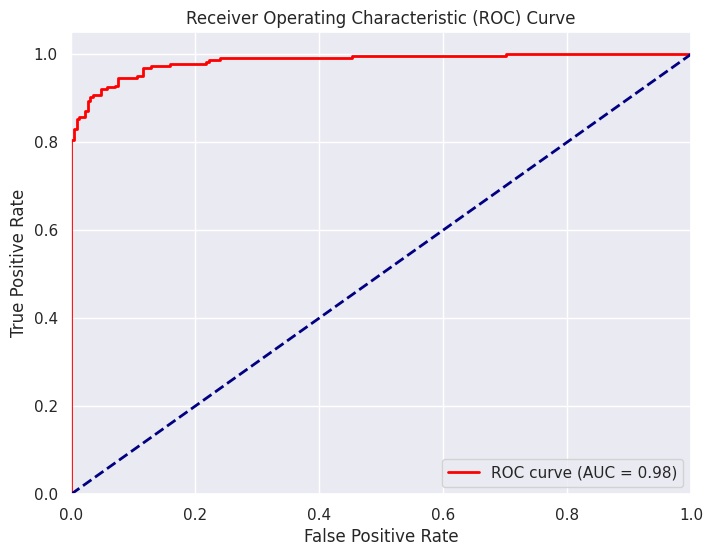

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.06666666666666667
MSE: 0.06666666666666667
RMSE: 0.2581988897471611


## Evaluate 7-23 Years

In [ ]:
test

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 14 columns]

In [ ]:
test7_23Y = test[(test['Age(year)'] >= 7) & (test['Age(year)'] <= 23)]
test7_23Y

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
930         930         20      F    Abnormal          Rt   
931         931         20      M    Abnormal          Lt   
932         932         21      M    Abnormal          Lt   
933         933         22      F    Abnormal          Rt   
934         934         23      M    Abnormal          Rt   

                                             Path_Name      Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V74.jpg   
..                                                 ...           ...   
930  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       Q49.jpg   
931  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ412.jpg   
932  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN379.jpg   
933  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U136.jpg   
934  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       E38.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
930             0         Female    20.701864             21.0   
931             1           Male    19.867065             20.0   
932             1           Male    19.349910             19.0   
933             0         Female    20.846346             21.0   
934             1           Male    18.476170             18.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0          0.005142             Female                 0.0  
1          0.046188             Female                 0.0  
2          0.006406             Female                 0.0  
3          0.000020             Female                 0.0  
4          0.020910             Female                 0.0  
..              ...                ...                 ...  
930        0.000186             Female                 0.0  
931        0.999999               Male                 1.0  
932        1.000000               Male                 1.0  
933        0.001581             Female                 0.0  
934        1.000000               Male                 1.0  

[842 rows x 14 columns]

In [ ]:
# test['Predict_float'] = pred_list
# test['Predict_int'] = int_pred
# test['Predict_str'] = list_pred
# # แสดง DataFrame
# test

In [ ]:
pred_str = np.array(test7_23Y['Gender_predict_str'].tolist()) #แปลงเป็น array
act_str = np.array(test7_23Y['Gender_Predict'].tolist())

pred_int = np.array(test7_23Y['Gender_predict_int'].tolist()) #แปลงเป็น array
act_int = np.array(test7_23Y['Gender_Class'].tolist()) #ค่าจริง

### confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 87.41092636579573%
              precision    recall  f1-score   support

      Female       0.87      0.88      0.88       424
        Male       0.88      0.87      0.87       418

    accuracy                           0.87       842
   macro avg       0.87      0.87      0.87       842
weighted avg       0.87      0.87      0.87       842



Text(0.5, 76.24999999999999, 'Predicted label')

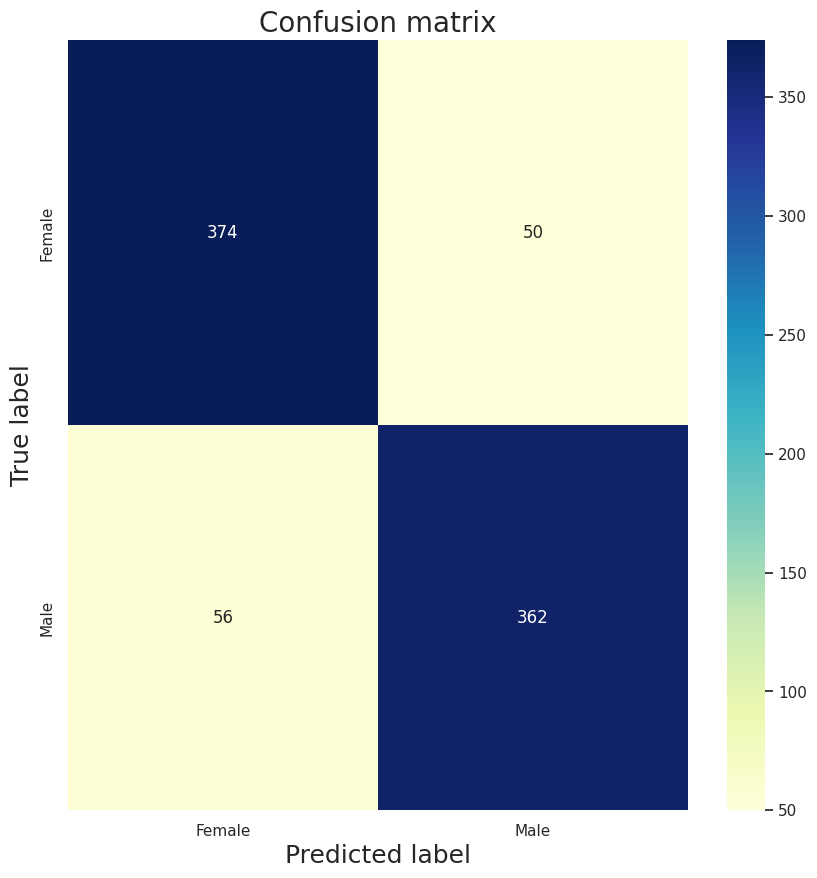

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### ROC

In [ ]:
test7_23Y['Gender_predict'].tolist()

[0.0051419446,
 0.04618836,
 0.0064064977,
 2.021052e-05,
 0.02091009,
 0.003454922,
 0.015389305,
 0.3851671,
 0.0152719375,
 0.0022832726,
 3.0007966e-05,
 0.000440542,
 0.02788532,
 0.0079063,
 1.5700072e-05,
 5.7759785e-06,
 5.2831227e-05,
 0.00045017607,
 0.69832766,
 0.008684845,
 0.07440577,
 0.43028036,
 0.0003508991,
 0.0036199328,
 0.0256369,
 0.99733114,
 0.7685144,
 0.98760545,
 0.98859286,
 0.88157,
 0.9936551,
 0.9999943,
 0.98829424,
 0.3899878,
 0.9365203,
 0.58580166,
 0.5524538,
 0.8373314,
 0.9781376,
 0.0029114098,
 0.37590548,
 0.032842718,
 0.0012772566,
 0.9557221,
 0.9924396,
 0.99999785,
 0.99999726,
 5.1613413e-05,
 0.0014946216,
 3.5068256e-06,
 2.6111438e-06,
 0.2856237,
 0.008646245,
 0.9134681,
 0.008040387,
 0.88236225,
 0.009853866,
 0.3112304,
 0.6932378,
 0.12553206,
 0.99796224,
 3.863405e-05,
 2.0540617e-07,
 1.5578222e-05,
 1.3192065e-06,
 0.9988493,
 0.9734886,
 0.002964834,
 0.00047244332,
 0.9990268,
 0.02018398,
 0.0001832182,
 0.07717843,
 0.02

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = test7_23Y['Gender_Class'].tolist()
predicted_probabilities = test7_23Y['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

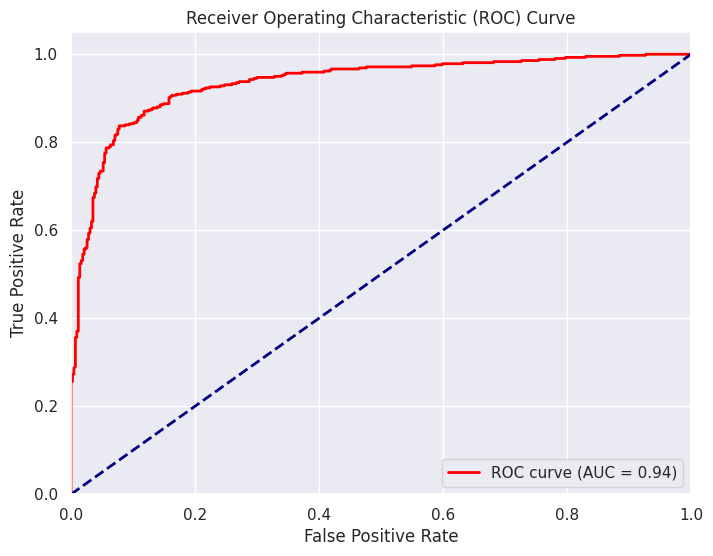

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.12589073634204276
MSE: 0.12589073634204276
RMSE: 0.3548108458630355


# ทายเพศถูก ทายอายุเป็นอย่างไร

In [ ]:
test

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 14 columns]

Gender = เพศจริงๆ แบบย่อ  , Gender_Predict = เพศจริงๆ แบบชื่อเต็ม  
Gender_predict_str = เพศที่ predict

In [ ]:
# เลือกเฉพาะ row ที่ทายถูก
Test_gender_True  = test[((test['Gender_predict_str'] == 'Female') & (test['Gender_Predict'] == 'Female')) | ((test['Gender_predict_str'] == 'Male') & (test['Gender_Predict'] == 'Male'))]
Test_gender_True

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[824 rows x 14 columns]

In [ ]:
age_predict_True = np.array(Test_gender_True['Age_predict_int'].astype(int).tolist())
act_age_True = np.array(Test_gender_True['Age(year)'].tolist())

In [ ]:
age_predict_True

array([ 7,  7,  8,  7,  7,  7,  7,  7,  8,  8,  7,  7,  7,  7,  8,  8,  8,
        8,  7,  7,  7,  7,  7,  7,  8,  8,  7,  7,  7,  7,  7,  7,  8,  7,
        8,  8,  7,  8,  8,  8,  7,  8,  9,  8,  8,  8,  8,  8,  8,  8,  8,
        9,  9,  9,  9,  8,  9,  8,  8,  8,  9,  9,  8,  7,  9,  9,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  8,  8,  8, 10, 10,  8, 10, 10, 10,
        9,  8,  8,  9,  9,  9,  9,  8,  9,  9,  9,  9,  9,  9,  9,  8,  8,
        9,  9,  9,  9,  9,  8,  8,  9,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9,  9, 10, 10,  9, 10,  9,  9,  8, 10,  9,  9,  8,  9, 10, 10,
        9,  9, 10, 10, 10,  9,  9,  8,  8,  8,  9, 10,  9,  9,  9,  9,  9,
        9,  9, 10, 10, 10, 10, 10, 11, 11, 10, 10, 11, 11, 12, 12, 12, 12,
       12, 12, 11, 11, 11, 11, 10, 10, 10, 11, 11,  8,  8, 11, 10, 10, 11,
       11, 11, 12, 12, 10, 10, 10, 10, 10, 11, 12, 11, 12, 12, 12, 12, 14,
       12, 12, 11, 11, 12, 11, 11, 10, 11, 11, 11, 11, 11, 12, 13, 11, 11,
       13, 12, 11, 11, 11

In [ ]:
act_age_True

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12

### confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_age_True, age_predict_True)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_age_True, age_predict_True))#performance

classifier accuracy = 29.00485436893204%
              precision    recall  f1-score   support

           7       0.96      0.64      0.77        42
           8       0.46      0.68      0.55        41
           9       0.42      0.61      0.50        41
          10       0.37      0.34      0.35        41
          11       0.44      0.39      0.42        41
          12       0.35      0.34      0.35        38
          13       0.44      0.42      0.43        40
          14       0.25      0.41      0.31        32
          15       0.21      0.24      0.22        42
          16       0.32      0.22      0.26        45
          17       0.29      0.35      0.31        49
          18       0.16      0.23      0.19        48
          19       0.14      0.21      0.17        47
          20       0.08      0.11      0.09        47
          21       0.19      0.33      0.24        46
          22       0.14      0.13      0.13        47
          23       0.12      0.02      0

Text(0.5, 76.24999999999999, 'Predicted label')

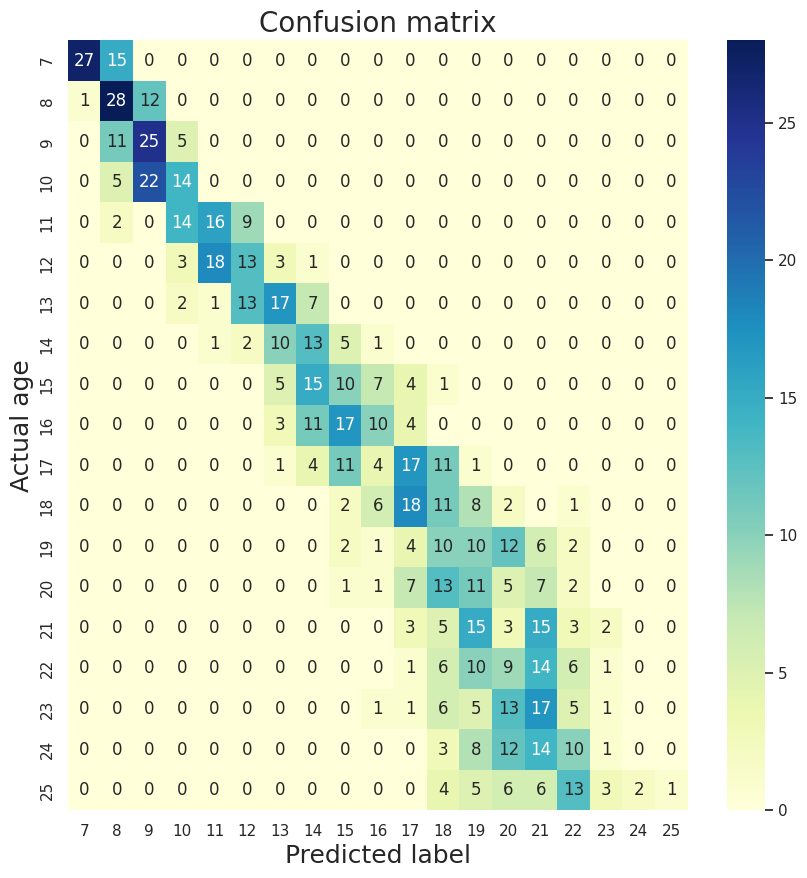

In [ ]:
#create CF
data = {'Actual': act_age_True,'Predicted' : age_predict_True}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_age_True, age_predict_True)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('Actual age',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_age_True,age_predict_True)
mse = mean_squared_error(act_age_True,age_predict_True)
rmse = mean_squared_error(act_age_True,age_predict_True,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.3992718446601942
MSE: 3.962378640776699
RMSE: 1.990572440474523


### R-squared (coefficient of determination)

In [ ]:
from sklearn.metrics import r2_score
 # Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average
print("R-squared:", r2_score(act_age_True, age_predict_True, multioutput= 'uniform_average'))
# Returns a full set of scores in case of multioutput input.
print("R-squared:", r2_score(act_age_True, age_predict_True, multioutput= 'raw_values'))
# Scores of all outputs are averaged, weighted by the variances of each individual output
print("R-squared:", r2_score(act_age_True, age_predict_True, multioutput= 'variance_weighted'))

R-squared: 0.8671064836985926
R-squared: [0.86710648]
R-squared: 0.8671064836985926


### correlation coefficient

In [ ]:
from scipy.stats import pearsonr

# Assuming act_age and age_predict are your arrays
# Calculate Pearson's correlation coefficient
correlation_coefficient, p_value = pearsonr(act_age_True, age_predict_True)

print("Pearson's correlation coefficient (R):", correlation_coefficient)
print("p-value:", p_value)

Pearson's correlation coefficient (R): 0.9540075982714696
p-value: 0.0


# ทายเพศผิด ทายอายุเป็นอย่างไร

Gender = เพศจริงๆ แบบย่อ  , Gender_Predict = เพศจริงๆ แบบชื่อเต็ม  
Gender_predict_str = เพศที่ predict

In [ ]:
test.shape

(943, 14)

In [ ]:
Test_gender_True.shape

(824, 14)

In [ ]:
Test_gender_False = test[~test['Filename'].isin(Test_gender_True['Filename'])]
Test_gender_False

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
18           18          7      F      Normal        Both   
33           33          7      M      Normal        Both   
39           39          7      M      Normal        Both   
40           40          7      M      Normal        Both   
41           41          7      M      Normal        Both   
..          ...        ...    ...         ...         ...   
912         912          9      F    Abnormal          Lt   
913         913          9      M    Abnormal          Lt   
920         920         12      M    Abnormal          Lt   
921         921         12      M    Abnormal          Rt   
923         923         14      F    Abnormal          Lt   

                                             Path_Name       Filename  \
18   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V85.jpg   
33   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       VV91.jpg   
39   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      VV100.jpg   
40   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipVV100.jpg   
41   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      VV104.jpg   
..                                                 ...            ...   
912  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipW96.jpg   
913  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipWW84.jpg   
920  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipOO101.jpg   
921  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       OO98.jpg   
923  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipY187.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
18              0         Female     6.914167              7.0   
33              1           Male     7.258642              7.0   
39              1           Male     7.453667              7.0   
40              1           Male     7.431997              7.0   
41              1           Male     6.958539              7.0   
..            ...            ...          ...              ...   
912             0         Female     9.180503              9.0   
913             1           Male     8.753443              9.0   
920             1           Male    11.618885             12.0   
921             1           Male    12.105593             12.0   
923             0         Female    13.616200             14.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
18         0.698328               Male                 1.0  
33         0.389988             Female                 0.0  
39         0.002911             Female                 0.0  
40         0.375905             Female                 0.0  
41         0.032843             Female                 0.0  
..              ...                ...                 ...  
912        0.512138               Male                 1.0  
913        0.013321             Female                 0.0  
920        0.000028             Female                 0.0  
921        0.044166             Female                 0.0  
923        0.978944               Male                 1.0  

[119 rows x 14 columns]

In [ ]:
age_predict_False = np.array(Test_gender_False['Age_predict_int'].astype(int).tolist())
act_age_False = np.array(Test_gender_False['Age(year)'].tolist())

In [ ]:
age_predict_False

array([ 7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  9,  8,  8,  9,  9,
        9,  9,  9,  8,  8, 10, 10,  9, 10,  9, 10,  9,  9, 10,  9, 10, 10,
       11, 11,  9,  9, 11, 12, 12, 12, 12, 12, 11, 10, 10, 13, 13, 12, 13,
       14, 13, 13, 13, 13, 12, 15, 14, 14, 15, 15, 13, 13, 12, 13, 12, 12,
       11, 11, 12, 15, 16, 14, 12, 12, 14, 13, 14, 17, 14, 17, 16, 14, 15,
       16, 16, 17, 15, 16, 19, 20, 20, 21, 17, 18, 17, 21, 21, 18, 22, 21,
       19, 21, 21, 23, 21, 22, 22, 22, 22, 21, 25, 20,  9,  9, 12, 12, 14])

In [ ]:
act_age_False

array([ 7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 21, 21, 22, 22, 22, 23, 24,
       24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,  9,  9, 12, 12, 14])

### confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_age_False, age_predict_False)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_age_False, age_predict_False))#performance

classifier accuracy = 43.69747899159664%
              precision    recall  f1-score   support

           7       1.00      1.00      1.00         8
           8       0.75      0.86      0.80         7
           9       0.47      0.78      0.58         9
          10       0.44      0.50      0.47         8
          11       0.50      0.33      0.40         9
          12       0.47      0.70      0.56        10
          13       0.64      0.70      0.67        10
          14       0.33      0.20      0.25        15
          15       0.17      0.11      0.13         9
          16       0.20      0.20      0.20         5
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         2
          19       0.50      0.50      0.50         2
          20       0.67      1.00      0.80         2
          21       0.12      0.25      0.17         4
          22       0.00      0.00      0.00         3
          23       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

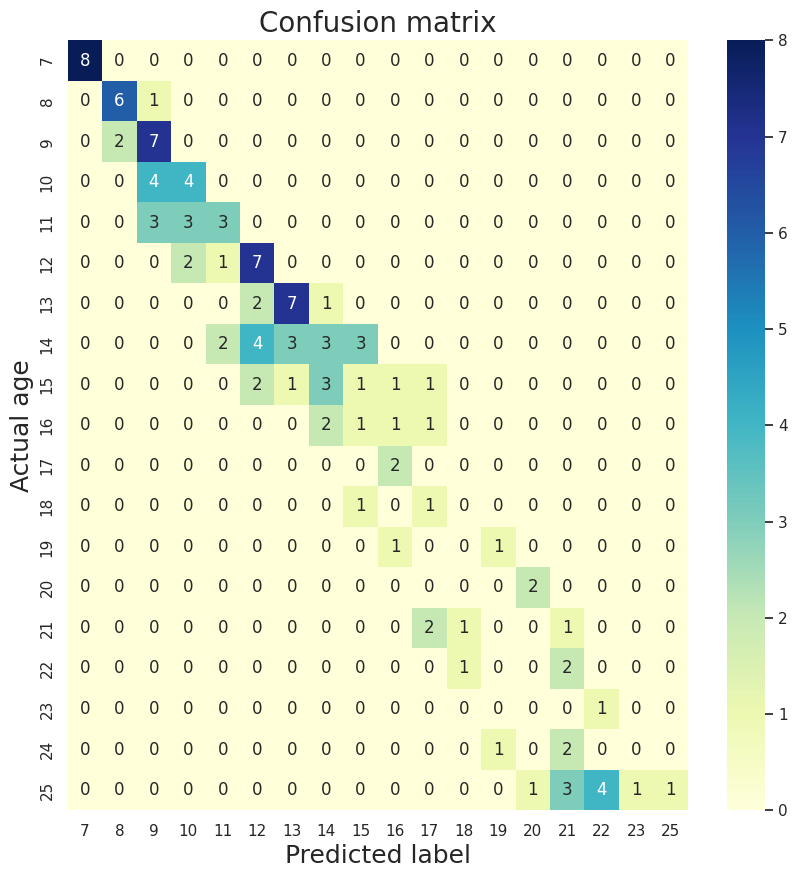

In [ ]:
#create CF
data = {'Actual': act_age_False,'Predicted' : age_predict_False}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_age_False, age_predict_False)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('Actual age',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_age_False,age_predict_False)
mse = mean_squared_error(act_age_False,age_predict_False)
rmse = mean_squared_error(act_age_False,age_predict_False,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.1176470588235294
MSE: 2.9495798319327733
RMSE: 1.7174340837228


### R-squared (coefficient of determination)

In [ ]:
from sklearn.metrics import r2_score
 # Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average
print("R-squared:", r2_score(act_age_False, age_predict_False, multioutput= 'uniform_average'))
# Returns a full set of scores in case of multioutput input.
print("R-squared:", r2_score(act_age_False, age_predict_False, multioutput= 'raw_values'))
# Scores of all outputs are averaged, weighted by the variances of each individual output
print("R-squared:", r2_score(act_age_False, age_predict_False, multioutput= 'variance_weighted'))

R-squared: 0.8937381066256906
R-squared: [0.89373811]
R-squared: 0.8937381066256908


### correlation coefficient

In [ ]:
from scipy.stats import pearsonr

# Assuming act_age and age_predict are your arrays
# Calculate Pearson's correlation coefficient
correlation_coefficient, p_value = pearsonr(act_age_False, age_predict_False)

print("Pearson's correlation coefficient (R):", correlation_coefficient)
print("p-value:", p_value)

Pearson's correlation coefficient (R): 0.9694847910740249
p-value: 2.779587759188527e-73


# ทายอายุถูก ทายเพศเป็นอย่างไร

In [ ]:
test

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
2             2          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399                7   
1               0         Female     7.415316                7   
2               0         Female     7.548301                8   
3               0         Female     7.492433                7   
4               0         Female     7.343049                7   
..            ...            ...          ...              ...   
938             0         Female    21.686228               22   
939             0         Female    21.118502               21   
940             0         Female    19.639433               20   
941             0         Female    21.359797               21   
942             0         Female    19.068132               19   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 14 columns]

In [ ]:
test['Age_predict_int'] = test['Age_predict_int'].astype(int)

In [ ]:
Test_age_True = test[((test['Age(year)'] == 7) & (test['Age_predict_int'] == 7))
    | ((test['Age(year)'] == 8) & (test['Age_predict_int'] == 8))
    | ((test['Age(year)'] == 9) & (test['Age_predict_int'] == 9))
    | ((test['Age(year)'] == 10) & (test['Age_predict_int'] == 10))
    | ((test['Age(year)'] == 11) & (test['Age_predict_int'] == 11))
    | ((test['Age(year)'] == 12) & (test['Age_predict_int'] == 12))
    | ((test['Age(year)'] == 13) & (test['Age_predict_int'] == 13))
    | ((test['Age(year)'] == 14) & (test['Age_predict_int'] == 14))
    | ((test['Age(year)'] == 15) & (test['Age_predict_int'] == 15))
    | ((test['Age(year)'] == 16) & (test['Age_predict_int'] == 16))
    | ((test['Age(year)'] == 17) & (test['Age_predict_int'] == 17))
    | ((test['Age(year)'] == 18) & (test['Age_predict_int'] == 18))
    | ((test['Age(year)'] == 19) & (test['Age_predict_int'] == 19))
    | ((test['Age(year)'] == 20) & (test['Age_predict_int'] == 20))
    | ((test['Age(year)'] == 21) & (test['Age_predict_int'] == 21))
    | ((test['Age(year)'] == 22) & (test['Age_predict_int'] == 22))
    | ((test['Age(year)'] == 23) & (test['Age_predict_int'] == 23))
    | ((test['Age(year)'] == 24) & (test['Age_predict_int'] == 24))
    | ((test['Age(year)'] == 25) & (test['Age_predict_int'] == 25))]

In [ ]:
Test_age_True

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0             0          7      F      Normal        Both   
1             1          7      F      Normal        Both   
3             3          7      F      Normal        Both   
4             4          7      F      Normal        Both   
5             5          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
921         921         12      M    Abnormal          Rt   
922         922         14      F    Abnormal          Lt   
923         923         14      F    Abnormal          Lt   
924         924         14      F    Abnormal          Rt   
931         931         20      M    Abnormal          Lt   

                                             Path_Name      Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV69.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       V74.jpg   
5    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipV74.jpg   
..                                                 ...           ...   
921  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      OO98.jpg   
922  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipY95.jpg   
923  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipY187.jpg   
924  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Y100.jpg   
931  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ412.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399                7   
1               0         Female     7.415316                7   
3               0         Female     7.492433                7   
4               0         Female     7.343049                7   
5               0         Female     7.095627                7   
..            ...            ...          ...              ...   
921             1           Male    12.105593               12   
922             0         Female    14.101776               14   
923             0         Female    13.616200               14   
924             0         Female    14.041607               14   
931             1           Male    19.867065               20   

     Gender_predict Gender_predict_str  Gender_predict_int  
0          0.005142             Female                 0.0  
1          0.046188             Female                 0.0  
3          0.000020             Female                 0.0  
4          0.020910             Female                 0.0  
5          0.003455             Female                 0.0  
..              ...                ...                 ...  
921        0.044166             Female                 0.0  
922        0.000650             Female                 0.0  
923        0.978944               Male                 1.0  
924        0.000008             Female                 0.0  
931        0.999999               Male                 1.0  

[291 rows x 14 columns]

In [ ]:
pred_str = np.array(Test_age_True['Gender_predict_str'].tolist()) #แปลงเป็น array
act_str = np.array(Test_age_True['Gender_Predict'].tolist())

pred_int = np.array(Test_age_True['Gender_predict_int'].tolist()) #แปลงเป็น array
act_int = np.array(Test_age_True['Gender_Class'].tolist()) #ค่าจริง

### confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 82.13058419243987%
              precision    recall  f1-score   support

      Female       0.84      0.81      0.82       150
        Male       0.80      0.84      0.82       141

    accuracy                           0.82       291
   macro avg       0.82      0.82      0.82       291
weighted avg       0.82      0.82      0.82       291



Text(0.5, 76.24999999999999, 'Predicted label')

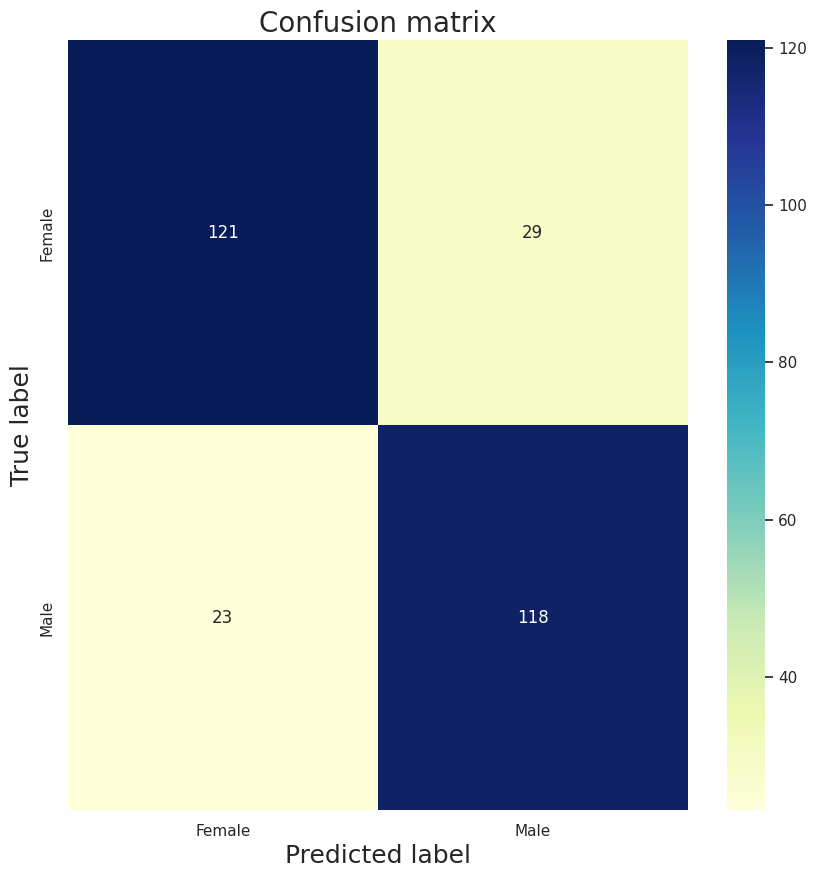

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### ROC

In [ ]:
Test_age_True['Gender_predict'].tolist()

[0.0051419446,
 0.04618836,
 2.021052e-05,
 0.02091009,
 0.003454922,
 0.015389305,
 0.3851671,
 3.0007966e-05,
 0.000440542,
 0.02788532,
 0.0079063,
 0.69832766,
 0.008684845,
 0.07440577,
 0.43028036,
 0.0003508991,
 0.0036199328,
 0.0256369,
 0.98760545,
 0.98859286,
 0.88157,
 0.9936551,
 0.9999943,
 0.98829424,
 0.3899878,
 0.58580166,
 0.9781376,
 0.0029114098,
 0.37590548,
 0.032842718,
 0.0012772566,
 0.99999726,
 5.1613413e-05,
 0.0014946216,
 3.5068256e-06,
 0.2856237,
 0.008646245,
 0.9134681,
 0.008040387,
 0.88236225,
 0.009853866,
 0.3112304,
 0.6932378,
 0.12553206,
 0.99796224,
 3.863405e-05,
 2.0540617e-07,
 0.9734886,
 0.9990268,
 0.02018398,
 0.07717843,
 0.026439685,
 0.0022629707,
 0.951595,
 0.9999987,
 0.9998869,
 0.9579288,
 0.98003423,
 0.9999957,
 0.97244376,
 0.99978644,
 0.99999976,
 0.99997544,
 0.9995739,
 0.99993956,
 0.87988913,
 0.35666645,
 0.99996614,
 0.99997103,
 0.0002429515,
 3.7650876e-05,
 0.92595565,
 0.1453175,
 0.100753486,
 0.55144125,
 0.1

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Test_age_True['Gender_Class'].tolist()
predicted_probabilities = Test_age_True['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

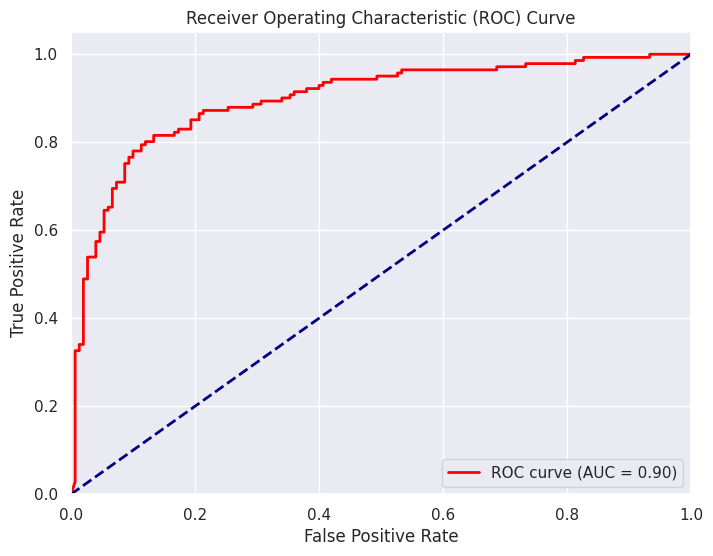

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.17869415807560138
MSE: 0.17869415807560138
RMSE: 0.422722317929396


# ทายอายุผิด ทายเพศเป็นอย่างไร

In [ ]:
Test_age_False = test[~test['Filename'].isin(Test_age_True['Filename'])]
Test_age_False

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
2             2          7      F      Normal        Both   
8             8          7      F      Normal        Both   
9             9          7      F      Normal        Both   
14           14          7      F      Normal        Both   
15           15          7      F      Normal        Both   
..          ...        ...    ...         ...         ...   
938         938         25      F    Abnormal          Rt   
939         939         25      F    Abnormal          Rt   
940         940         25      F    Abnormal          Rt   
941         941         25      F    Abnormal          Rt   
942         942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
8    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V76.jpg   
9    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV76.jpg   
14   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V81.jpg   
15   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV81.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
2               0         Female     7.548301                8   
8               0         Female     7.759045                8   
9               0         Female     7.508920                8   
14              0         Female     7.921116                8   
15              0         Female     8.004609                8   
..            ...            ...          ...              ...   
938             0         Female    21.686228               22   
939             0         Female    21.118502               21   
940             0         Female    19.639433               20   
941             0         Female    21.359797               21   
942             0         Female    19.068132               19   

     Gender_predict Gender_predict_str  Gender_predict_int  
2      6.406498e-03             Female                 0.0  
8      1.527194e-02             Female                 0.0  
9      2.283273e-03             Female                 0.0  
14     1.570007e-05             Female                 0.0  
15     5.775978e-06             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[652 rows x 14 columns]

In [ ]:
pred_str = np.array(Test_age_False['Gender_predict_str'].tolist()) #แปลงเป็น array
act_str = np.array(Test_age_False['Gender_Predict'].tolist())

pred_int = np.array(Test_age_False['Gender_predict_int'].tolist()) #แปลงเป็น array
act_int = np.array(Test_age_False['Gender_Class'].tolist()) #ค่าจริง

### confusion_matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 89.7239263803681%
              precision    recall  f1-score   support

      Female       0.89      0.90      0.90       325
        Male       0.90      0.89      0.90       327

    accuracy                           0.90       652
   macro avg       0.90      0.90      0.90       652
weighted avg       0.90      0.90      0.90       652



Text(0.5, 76.24999999999999, 'Predicted label')

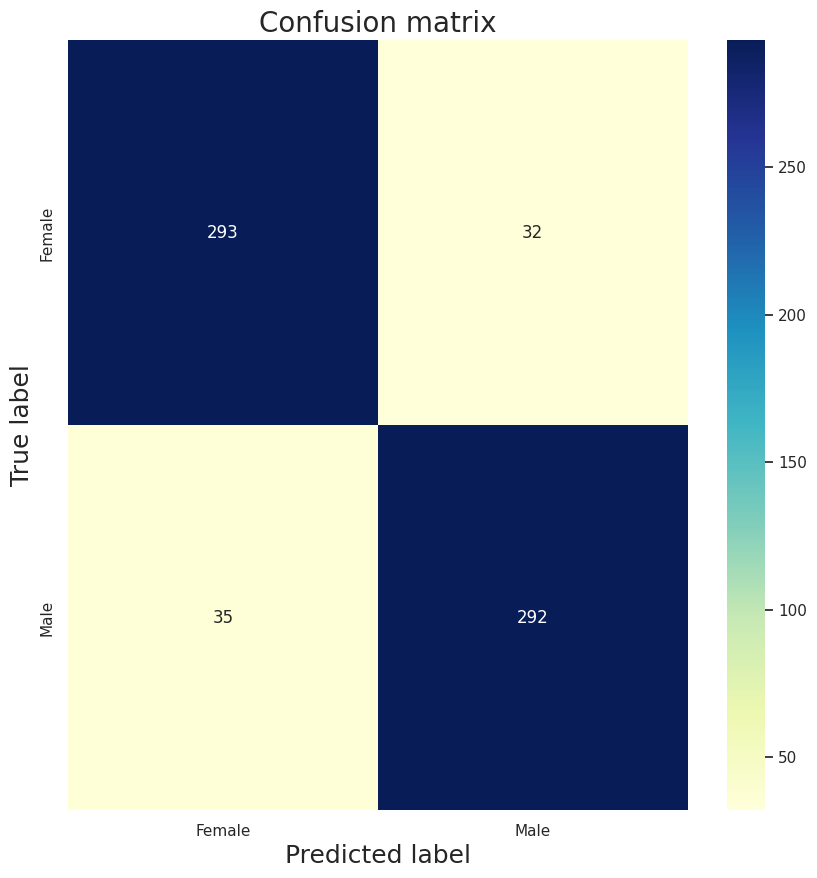

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### ROC

In [ ]:
Test_age_False['Gender_predict'].tolist()

[0.0064064977,
 0.0152719375,
 0.0022832726,
 1.5700072e-05,
 5.7759785e-06,
 5.2831227e-05,
 0.00045017607,
 0.99733114,
 0.7685144,
 0.9365203,
 0.5524538,
 0.8373314,
 0.9557221,
 0.9924396,
 0.99999785,
 2.6111438e-06,
 1.5578222e-05,
 1.3192065e-06,
 0.9988493,
 0.002964834,
 0.00047244332,
 0.0001832182,
 0.99999917,
 0.99998677,
 0.95340616,
 0.99999917,
 0.99998677,
 0.9960918,
 0.87922126,
 6.4143683e-06,
 0.49068502,
 0.44504982,
 0.0017748415,
 0.14402787,
 0.009049019,
 0.0010119549,
 2.0484136e-05,
 0.041701775,
 0.99927586,
 0.99965775,
 0.9998956,
 0.9543244,
 0.99999774,
 0.9999989,
 0.9995628,
 0.9999913,
 0.99999964,
 0.380102,
 0.9994417,
 0.09271816,
 0.0013487346,
 0.48295036,
 0.13299386,
 0.0007824431,
 0.0028442943,
 0.13299386,
 0.0007824431,
 0.0028442943,
 0.012145214,
 0.77245533,
 0.316039,
 0.11279617,
 0.9999982,
 0.9999672,
 0.999998,
 0.9999919,
 0.9999316,
 0.99995697,
 0.9999908,
 0.9999999,
 0.9999548,
 0.9999964,
 0.4356902,
 0.98306817,
 0.99951124

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Test_age_False['Gender_Class'].tolist()
predicted_probabilities = Test_age_False['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

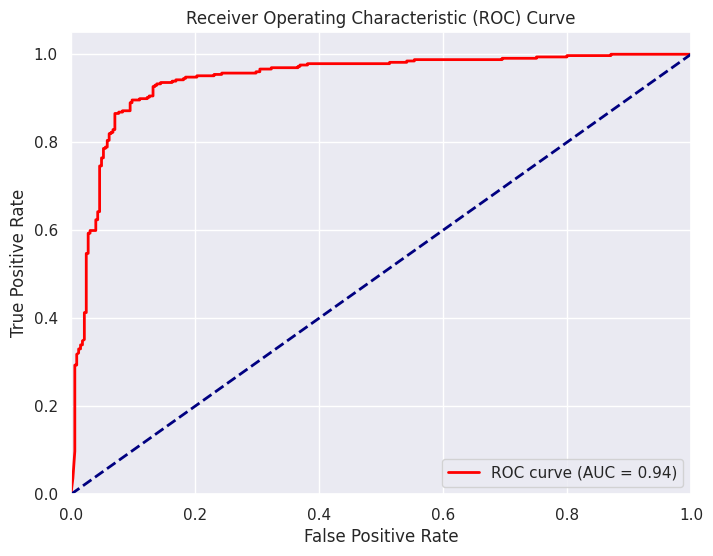

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.10276073619631902
MSE: 0.10276073619631902
RMSE: 0.32056315477034947


# 7 year

In [ ]:
test

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
938         25      F    Abnormal          Rt   
939         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423394              7.0   
1               0         Female     7.415317              7.0   
2               0         Female     7.548305              8.0   
3               0         Female     7.492437              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686237             22.0   
939             0         Female    21.118515             21.0   
940             0         Female    19.639421             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068129             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141523e-03             Female                 0.0  
1      4.619073e-02             Female                 0.0  
2      6.406425e-03             Female                 0.0  
3      2.021181e-05             Female                 0.0  
4      2.090983e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800772e-05             Female                 0.0  
939    1.193717e-01             Female                 0.0  
940    1.212690e-03             Female                 0.0  
941    3.044486e-09             Female                 0.0  
942    9.307751e-06             Female                 0.0  

[943 rows x 13 columns]

In [ ]:
Y7 = test[test['Age(year)'] == 7]
Y7

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
5            7      F      Normal        Both   
6            7      F      Normal        Both   
7            7      F      Normal        Both   
8            7      F      Normal        Both   
9            7      F      Normal        Both   
10           7      F      Normal        Both   
11           7      F      Normal        Both   
12           7      F      Normal        Both   
13           7      F      Normal        Both   
14           7      F      Normal        Both   
15           7      F      Normal        Both   
16           7      F      Normal        Both   
17           7      F      Normal        Both   
18           7      F      Normal        Both   
19           7      F      Normal        Both   
20           7      F      Normal        Both   
21           7      F      Normal        Both   
22           7      F      Normal        Both   
23           7      F      Normal        Both   
24           7      F      Normal          Rt   
25           7      M      Normal        Both   
26           7      M      Normal        Both   
27           7      M      Normal        Both   
28           7      M      Normal        Both   
29           7      M      Normal        Both   
30           7      M      Normal        Both   
31           7      M      Normal        Both   
32           7      M      Normal        Both   
33           7      M      Normal        Both   
34           7      M      Normal        Both   
35           7      M      Normal        Both   
36           7      M      Normal        Both   
37           7      M      Normal        Both   
38           7      M      Normal        Both   
39           7      M      Normal        Both   
40           7      M      Normal        Both   
41           7      M      Normal        Both   
42           7      M      Normal        Both   
43           7      M      Normal        Both   
44           7      M      Normal        Both   
45           7      M      Normal        Both   
46           7      M      Normal        Both   
47           7      M      Normal        Both   
48           7      M      Normal        Both   
908          7      M    Abnormal          Rt   

                                             Path_Name       Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V74.jpg   
5    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV74.jpg   
6    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V75.jpg   
7    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV75.jpg   
8    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V76.jpg   
9    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV76.jpg   
10   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V78.jpg   
11   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV78.jpg   
12   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V79.jpg   
13   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV79.jpg   
14   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V81.jpg   
15   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV81.jpg   
16   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V84.jpg   
17   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipV84.jpg   
18   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        V85.jpg   
19   /content/gdrive/MyDrive/Tooth_Shap_GPT/D

## confusion_matrix

In [ ]:
pred_str = np.array(Y7['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y7['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y7['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y7['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 84.0%
              precision    recall  f1-score   support

      Female       0.77      0.96      0.86        25
        Male       0.95      0.72      0.82        25

    accuracy                           0.84        50
   macro avg       0.86      0.84      0.84        50
weighted avg       0.86      0.84      0.84        50



Text(0.5, 76.24999999999999, 'Predicted label')

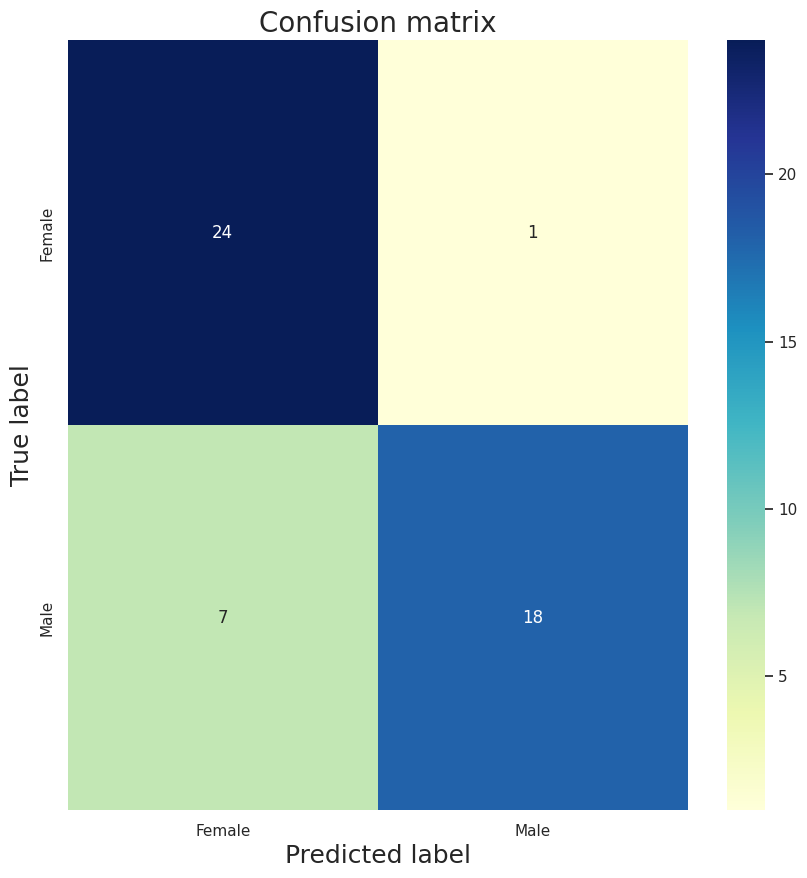

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y7['Gender_predict']

0      0.005142
1      0.046191
2      0.006406
3      0.000020
4      0.020910
5      0.003455
6      0.015392
7      0.385166
8      0.015272
9      0.002283
10     0.000030
11     0.000441
12     0.027885
13     0.007906
14     0.000016
15     0.000006
16     0.000053
17     0.000450
18     0.698327
19     0.008685
20     0.074404
21     0.430288
22     0.000351
23     0.003620
24     0.025638
25     0.997331
26     0.768514
27     0.987606
28     0.988592
29     0.881567
30     0.993656
31     0.999994
32     0.988295
33     0.389991
34     0.936523
35     0.585778
36     0.552467
37     0.837334
38     0.978137
39     0.002911
40     0.375902
41     0.032842
42     0.001277
43     0.955722
44     0.992440
45     0.999998
46     0.999997
47     0.000052
48     0.001495
908    0.999282
Name: Gender_predict, dtype: float32

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y7['Gender_Class'].tolist()
predicted_probabilities = Y7['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

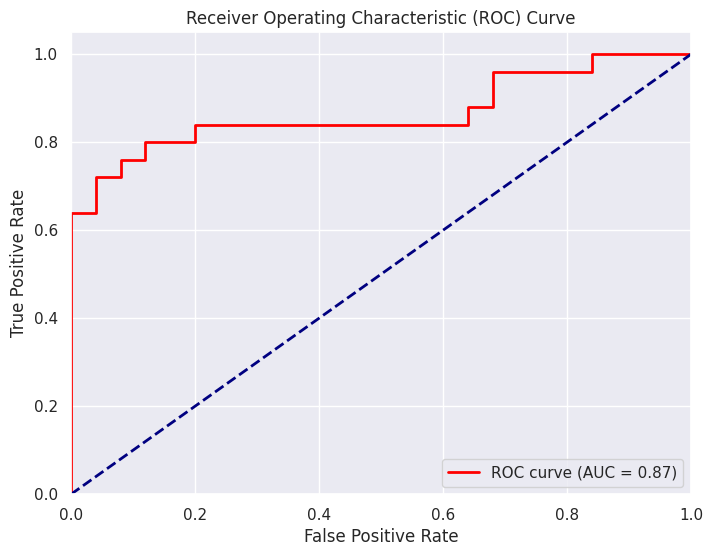

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.16
MSE: 0.16
RMSE: 0.4


# 8 year

In [ ]:
Y8 = test[test['Age(year)'] == 8]
Y8

Age(year) Gender Folder_type Folder_name  \
49           8      F      Normal        Both   
50           8      F      Normal        Both   
51           8      F      Normal        Both   
52           8      F      Normal        Both   
53           8      F      Normal        Both   
54           8      F      Normal        Both   
55           8      F      Normal        Both   
56           8      F      Normal        Both   
57           8      F      Normal        Both   
58           8      F      Normal        Both   
59           8      F      Normal        Both   
60           8      F      Normal        Both   
61           8      F      Normal        Both   
62           8      F      Normal        Both   
63           8      F      Normal        Both   
64           8      F      Normal        Both   
65           8      F      Normal        Both   
66           8      F      Normal        Both   
67           8      F      Normal        Both   
68           8      F      Normal        Both   
69           8      F      Normal        Both   
70           8      F      Normal        Both   
71           8      F      Normal        Both   
72           8      F      Normal        Both   
73           8      F      Normal        Both   
74           8      F      Normal        Both   
75           8      M      Normal        Both   
76           8      M      Normal        Both   
77           8      M      Normal        Both   
78           8      M      Normal        Both   
79           8      M      Normal        Both   
80           8      M      Normal        Both   
81           8      M      Normal        Both   
82           8      M      Normal        Both   
83           8      M      Normal        Both   
84           8      M      Normal        Both   
85           8      M      Normal        Both   
86           8      M      Normal        Both   
87           8      M      Normal        Both   
88           8      M      Normal        Both   
89           8      M      Normal        Both   
90           8      M      Normal        Both   
91           8      M      Normal        Both   
92           8      M      Normal        Both   
93           8      M      Normal          Lt   
909          8      M    Abnormal        Both   
910          8      M    Abnormal        Both   
911          8      M    Abnormal          Rt   

                                             Path_Name      Filename  \
49   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       P70.jpg   
50   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipP70.jpg   
51   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       P72.jpg   
52   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipP72.jpg   
53   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       P74.jpg   
54   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipP74.jpg   
55   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       P75.jpg   
56   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipP75.jpg   
57   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       P76.jpg   
58   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipP76.jpg   
59   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       P78.jpg   
60   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipP78.jpg   
61   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       P79.jpg   
62   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipP79.jpg   
63   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       P80.jpg   
64   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipP80.jpg   
65   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       P81.jpg   
66   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipP81.jpg   
67   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       P84.jpg   
68   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipP84.jpg   
69   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       P73.jpg   
70   /content/gdriv

## confusion_matrix

In [ ]:
pred_str = np.array(Y8['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y8['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y8['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y8['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 85.41666666666667%
              precision    recall  f1-score   support

      Female       1.00      0.73      0.84        26
        Male       0.76      1.00      0.86        22

    accuracy                           0.85        48
   macro avg       0.88      0.87      0.85        48
weighted avg       0.89      0.85      0.85        48



Text(0.5, 76.24999999999999, 'Predicted label')

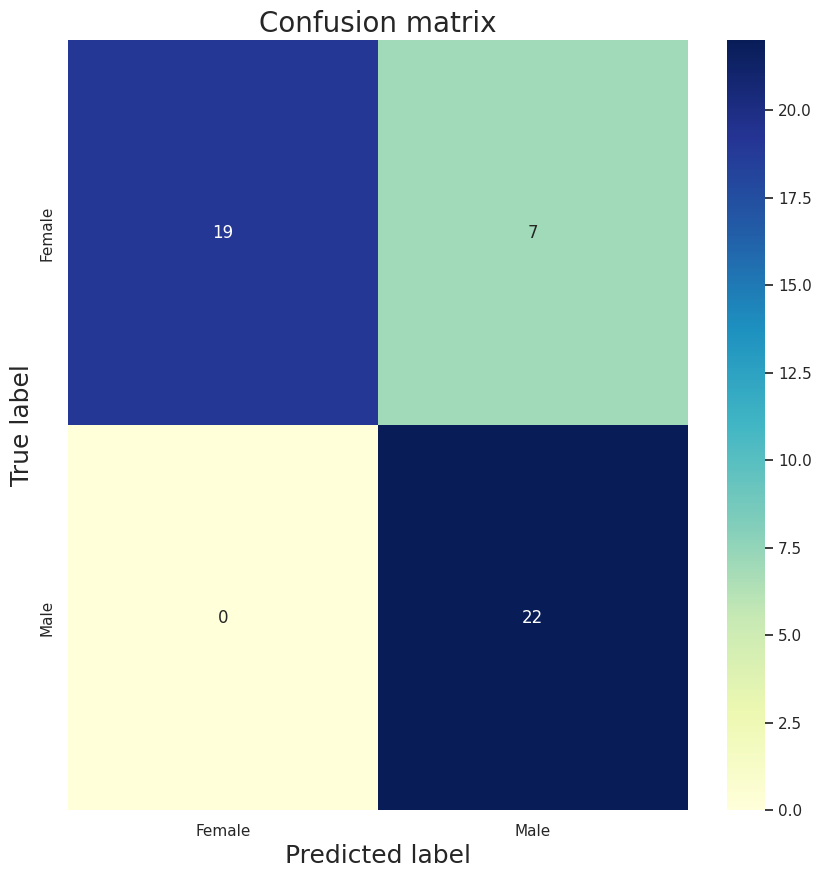

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y8['Gender_predict']

49     3.506682e-06
50     2.611099e-06
51     2.855707e-01
52     8.645972e-03
53     9.134671e-01
54     8.040763e-03
55     8.823744e-01
56     9.854536e-03
57     3.112195e-01
58     6.932376e-01
59     1.255278e-01
60     9.979619e-01
61     3.863405e-05
62     2.054073e-07
63     1.557874e-05
64     1.319320e-06
65     9.988489e-01
66     9.734887e-01
67     2.964634e-03
68     4.724535e-04
69     9.990267e-01
70     2.017913e-02
71     1.832011e-04
72     7.717943e-02
73     2.644109e-02
74     2.262871e-03
75     9.999992e-01
76     9.999868e-01
77     9.515953e-01
78     9.534094e-01
79     9.999992e-01
80     9.999868e-01
81     9.999987e-01
82     9.998869e-01
83     9.579260e-01
84     9.800317e-01
85     9.999957e-01
86     9.724404e-01
87     9.997865e-01
88     9.999998e-01
89     9.960922e-01
90     8.792307e-01
91     9.999755e-01
92     9.995738e-01
93     9.999396e-01
909    9.999998e-01
910    9.957045e-01
911    1.000000e+00
Name: Gender_predict, dtype: float32

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y8['Gender_Class'].tolist()
predicted_probabilities = Y8['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

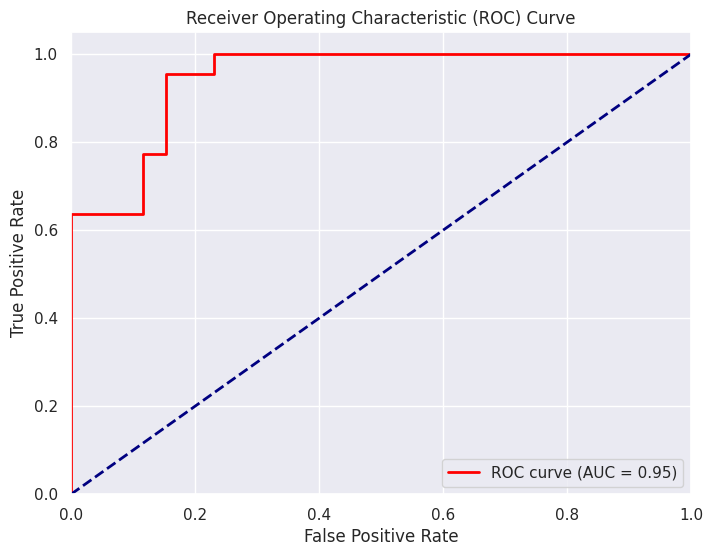

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.14583333333333334
MSE: 0.14583333333333334
RMSE: 0.3818813079129867


# 9 year

In [ ]:
Y9 = test[test['Age(year)'] == 9]
Y9

Age(year) Gender Folder_type Folder_name  \
94           9      F      Normal        Both   
95           9      F      Normal        Both   
96           9      F      Normal        Both   
97           9      F      Normal        Both   
98           9      F      Normal        Both   
99           9      F      Normal        Both   
100          9      F      Normal        Both   
101          9      F      Normal        Both   
102          9      F      Normal        Both   
103          9      F      Normal        Both   
104          9      F      Normal        Both   
105          9      F      Normal        Both   
106          9      F      Normal        Both   
107          9      F      Normal        Both   
108          9      F      Normal        Both   
109          9      F      Normal        Both   
110          9      F      Normal        Both   
111          9      F      Normal        Both   
112          9      F      Normal        Both   
113          9      F      Normal        Both   
114          9      F      Normal        Both   
115          9      F      Normal        Both   
116          9      F      Normal        Both   
117          9      F      Normal        Both   
118          9      F      Normal          Lt   
119          9      M      Normal        Both   
120          9      M      Normal        Both   
121          9      M      Normal        Both   
122          9      M      Normal        Both   
123          9      M      Normal        Both   
124          9      M      Normal        Both   
125          9      M      Normal        Both   
126          9      M      Normal        Both   
127          9      M      Normal        Both   
128          9      M      Normal        Both   
129          9      M      Normal        Both   
130          9      M      Normal        Both   
131          9      M      Normal        Both   
132          9      M      Normal        Both   
133          9      M      Normal        Both   
134          9      M      Normal        Both   
135          9      M      Normal        Both   
136          9      M      Normal        Both   
137          9      M      Normal        Both   
138          9      M      Normal        Both   
139          9      M      Normal        Both   
140          9      M      Normal        Both   
912          9      F    Abnormal          Lt   
913          9      M    Abnormal          Lt   
914          9      M    Abnormal          Lt   

                                             Path_Name      Filename  \
94   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       W81.jpg   
95   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipW81.jpg   
96   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       W84.jpg   
97   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipW84.jpg   
98   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       W85.jpg   
99   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipW85.jpg   
100  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       W87.jpg   
101  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipW87.jpg   
102  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       W89.jpg   
103  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipW89.jpg   
104  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       W91.jpg   
105  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipW91.jpg   
106  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       W92.jpg   
107  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipW92.jpg   
108  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       W95.jpg   
109  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipW95.jpg   
110  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       W88.jpg   
111  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipW88.jpg   
112  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       W86.jpg   
113  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipW86.

## confusion_matrix

In [ ]:
pred_str = np.array(Y9['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y9['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y9['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y9['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 82.0%
              precision    recall  f1-score   support

      Female       0.95      0.69      0.80        26
        Male       0.74      0.96      0.84        24

    accuracy                           0.82        50
   macro avg       0.84      0.83      0.82        50
weighted avg       0.85      0.82      0.82        50



Text(0.5, 76.24999999999999, 'Predicted label')

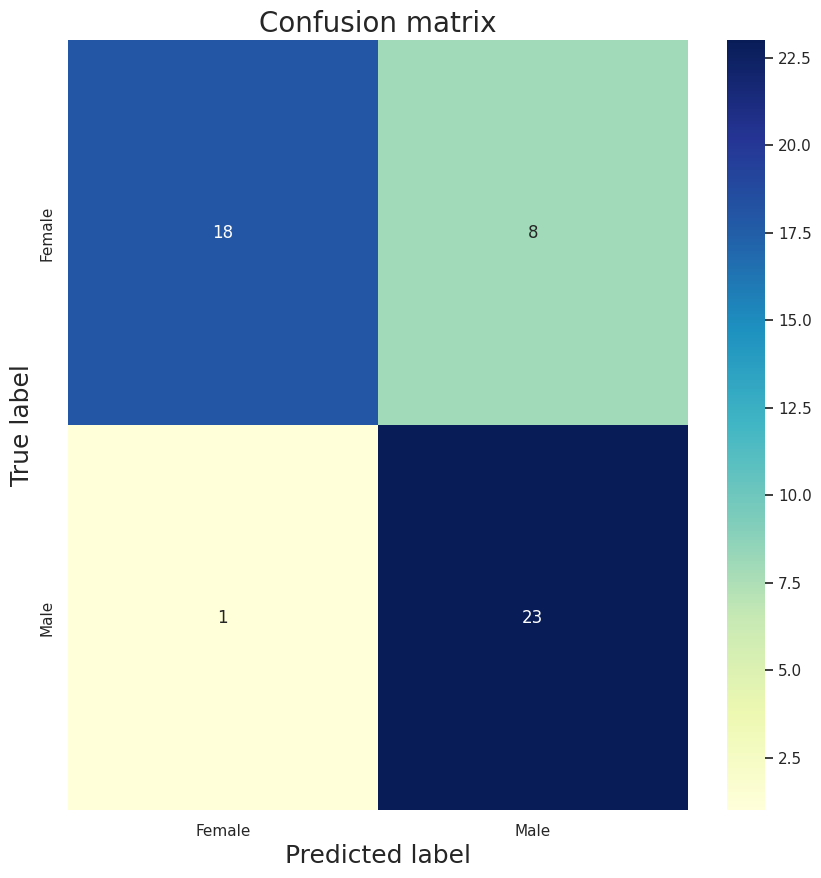

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y9['Gender_predict']

94     0.000006
95     0.490695
96     0.879890
97     0.445059
98     0.001775
99     0.144005
100    0.009049
101    0.356662
102    0.001012
103    0.000020
104    0.999966
105    0.999971
106    0.000243
107    0.000038
108    0.925954
109    0.145332
110    0.100751
111    0.041705
112    0.551486
113    0.115454
114    0.015393
115    0.123778
116    0.999276
117    0.999658
118    0.000002
119    0.999999
120    0.999999
121    0.999994
122    0.999896
123    0.954325
124    0.999859
125    0.975185
126    0.999985
127    0.999999
128    0.999995
129    0.999998
130    0.999999
131    0.997254
132    0.999563
133    0.999991
134    1.000000
135    0.999999
136    1.000000
137    0.999983
138    0.999744
139    0.999999
140    0.999956
912    0.512149
913    0.013322
914    0.662691
Name: Gender_predict, dtype: float32

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y9['Gender_Class'].tolist()
predicted_probabilities = Y9['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

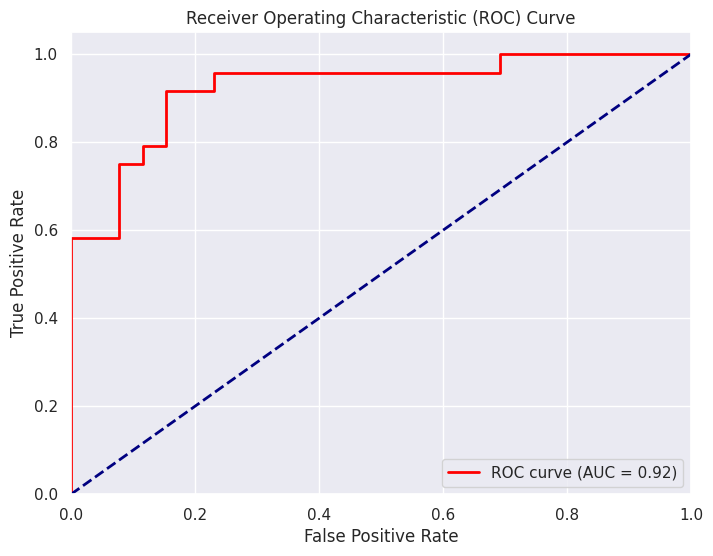

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.18
MSE: 0.18
RMSE: 0.4242640687119285


# 10 year

In [ ]:
Y10 = test[test['Age(year)'] == 10]
Y10

Age(year) Gender Folder_type Folder_name  \
141         10      F      Normal        Both   
142         10      F      Normal        Both   
143         10      F      Normal        Both   
144         10      F      Normal        Both   
145         10      F      Normal        Both   
146         10      F      Normal        Both   
147         10      F      Normal        Both   
148         10      F      Normal        Both   
149         10      F      Normal        Both   
150         10      F      Normal        Both   
151         10      F      Normal        Both   
152         10      F      Normal        Both   
153         10      F      Normal        Both   
154         10      F      Normal        Both   
155         10      F      Normal        Both   
156         10      F      Normal        Both   
157         10      F      Normal        Both   
158         10      F      Normal        Both   
159         10      F      Normal        Both   
160         10      F      Normal        Both   
161         10      F      Normal        Both   
162         10      F      Normal        Both   
163         10      F      Normal        Both   
164         10      F      Normal        Both   
165         10      F      Normal          Lt   
166         10      M      Normal        Both   
167         10      M      Normal        Both   
168         10      M      Normal        Both   
169         10      M      Normal        Both   
170         10      M      Normal        Both   
171         10      M      Normal        Both   
172         10      M      Normal        Both   
173         10      M      Normal        Both   
174         10      M      Normal        Both   
175         10      M      Normal        Both   
176         10      M      Normal        Both   
177         10      M      Normal        Both   
178         10      M      Normal        Both   
179         10      M      Normal        Both   
180         10      M      Normal        Both   
181         10      M      Normal        Both   
182         10      M      Normal        Both   
183         10      M      Normal        Both   
184         10      M      Normal        Both   
185         10      M      Normal        Both   
186         10      M      Normal        Both   
187         10      M      Normal        Both   
915         10      M    Abnormal          Lt   
916         10      M    Abnormal          Rt   

                                             Path_Name      Filename  \
141  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       H79.jpg   
142  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipH79.jpg   
143  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       H81.jpg   
144  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipH81.jpg   
145  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       H82.jpg   
146  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipH82.jpg   
147  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       H83.jpg   
148  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipH83.jpg   
149  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       H84.jpg   
150  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipH84.jpg   
151  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       H86.jpg   
152  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipH86.jpg   
153  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       H87.jpg   
154  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipH87.jpg   
155  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       H88.jpg   
156  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipH88.jpg   
157  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       H89.jpg   
158  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipH89.jpg   
159  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       H93.jpg   
160  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipH93.jpg   
161  /content/gdrive/MyDrive/Tooth_Shap_GP

## confusion_matrix

In [ ]:
pred_str = np.array(Y10['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y10['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y10['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y10['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 83.6734693877551%
              precision    recall  f1-score   support

      Female       0.87      0.80      0.83        25
        Male       0.81      0.88      0.84        24

    accuracy                           0.84        49
   macro avg       0.84      0.84      0.84        49
weighted avg       0.84      0.84      0.84        49



Text(0.5, 76.24999999999999, 'Predicted label')

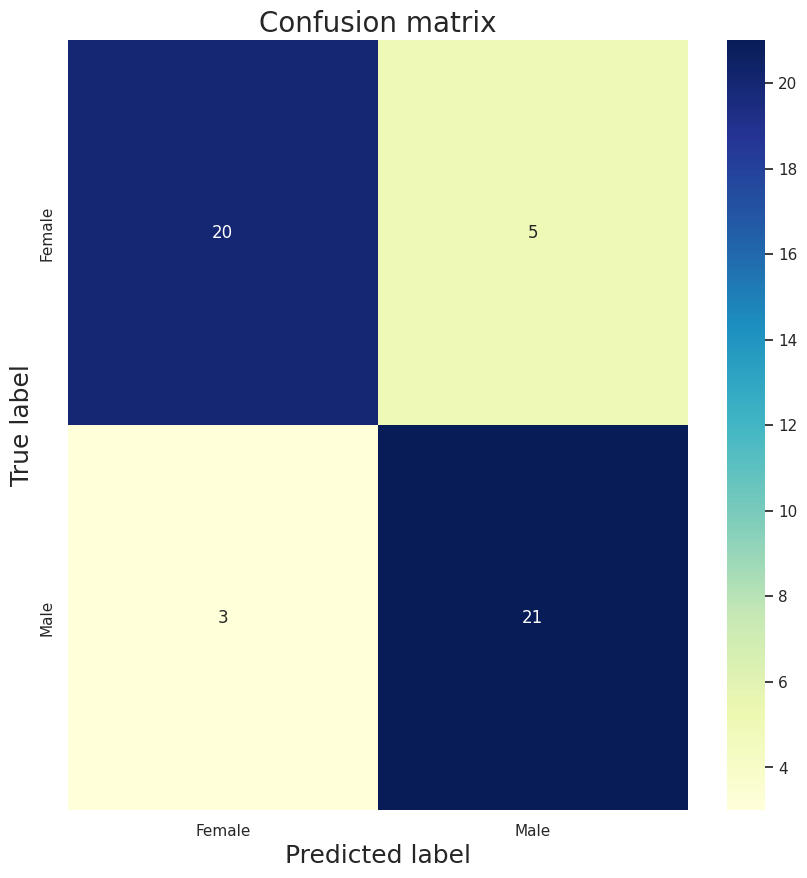

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y10['Gender_predict']

141    0.974701
142    0.993094
143    0.380081
144    0.999442
145    0.092724
146    0.001349
147    0.444672
148    0.544913
149    0.043006
150    0.482960
151    0.115271
152    0.132992
153    0.000782
154    0.002844
155    0.115271
156    0.132992
157    0.000782
158    0.002844
159    0.012146
160    0.772478
161    0.000633
162    0.000614
163    0.316050
164    0.112795
165    0.000011
166    0.999993
167    0.999994
168    0.999998
169    0.999967
170    0.999998
171    0.999992
172    0.999932
173    0.999957
174    0.018378
175    0.921787
176    0.999991
177    1.000000
178    0.999955
179    0.999996
180    0.435699
181    0.983066
182    0.999511
183    0.984850
184    0.999995
185    0.999998
186    0.198178
187    0.505029
915    0.954685
916    0.992403
Name: Gender_predict, dtype: float32

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y10['Gender_Class'].tolist()
predicted_probabilities = Y10['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

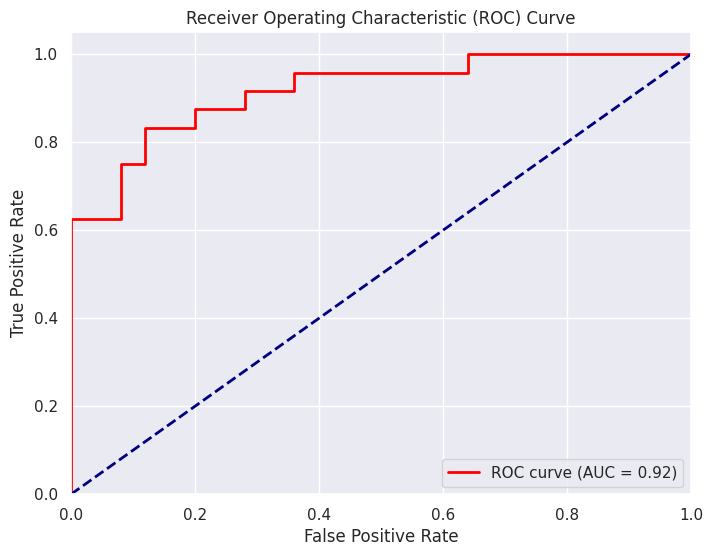

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.16326530612244897
MSE: 0.16326530612244897
RMSE: 0.40406101782088427


# 11 year

In [ ]:
Y11 = test[test['Age(year)'] == 11]
Y11

Age(year) Gender Folder_type Folder_name  \
188         11      F      Normal        Both   
189         11      F      Normal        Both   
190         11      F      Normal        Both   
191         11      F      Normal        Both   
192         11      F      Normal        Both   
193         11      F      Normal        Both   
194         11      F      Normal        Both   
195         11      F      Normal        Both   
196         11      F      Normal        Both   
197         11      F      Normal        Both   
198         11      F      Normal        Both   
199         11      F      Normal        Both   
200         11      F      Normal        Both   
201         11      F      Normal        Both   
202         11      F      Normal        Both   
203         11      F      Normal        Both   
204         11      F      Normal        Both   
205         11      F      Normal        Both   
206         11      F      Normal        Both   
207         11      F      Normal        Both   
208         11      F      Normal          Lt   
209         11      F      Normal          Lt   
210         11      F      Normal          Lt   
211         11      M      Normal        Both   
212         11      M      Normal        Both   
213         11      M      Normal        Both   
214         11      M      Normal        Both   
215         11      M      Normal        Both   
216         11      M      Normal        Both   
217         11      M      Normal        Both   
218         11      M      Normal        Both   
219         11      M      Normal        Both   
220         11      M      Normal        Both   
221         11      M      Normal        Both   
222         11      M      Normal        Both   
223         11      M      Normal        Both   
224         11      M      Normal        Both   
225         11      M      Normal        Both   
226         11      M      Normal        Both   
227         11      M      Normal        Both   
228         11      M      Normal        Both   
229         11      M      Normal        Both   
230         11      M      Normal        Both   
231         11      M      Normal        Both   
232         11      M      Normal        Both   
233         11      M      Normal          Lt   
234         11      M      Normal          Rt   
235         11      M      Normal          Rt   
236         11      M      Normal          Rt   
917         11      F    Abnormal          Rt   

                                             Path_Name       Filename  \
188  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        D78.jpg   
189  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipD78.jpg   
190  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        D79.jpg   
191  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipD79.jpg   
192  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        D83.jpg   
193  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipD83.jpg   
194  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        D85.jpg   
195  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipD85.jpg   
196  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        D88.jpg   
197  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipD88.jpg   
198  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        D89.jpg   
199  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipD89.jpg   
200  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        D90.jpg   
201  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipD90.jpg   
202  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        D91.jpg   
203  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipD91.jpg   
204  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        D92.jpg   
205  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipD92.jpg   
206  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        D87.jpg   
207  /content/gdrive/MyDrive/Tooth_Shap_GPT/D

## confusion_matrix

In [ ]:
pred_str = np.array(Y11['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y11['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y11['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y11['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 82.0%
              precision    recall  f1-score   support

      Female       0.80      0.83      0.82        24
        Male       0.84      0.81      0.82        26

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50



Text(0.5, 76.24999999999999, 'Predicted label')

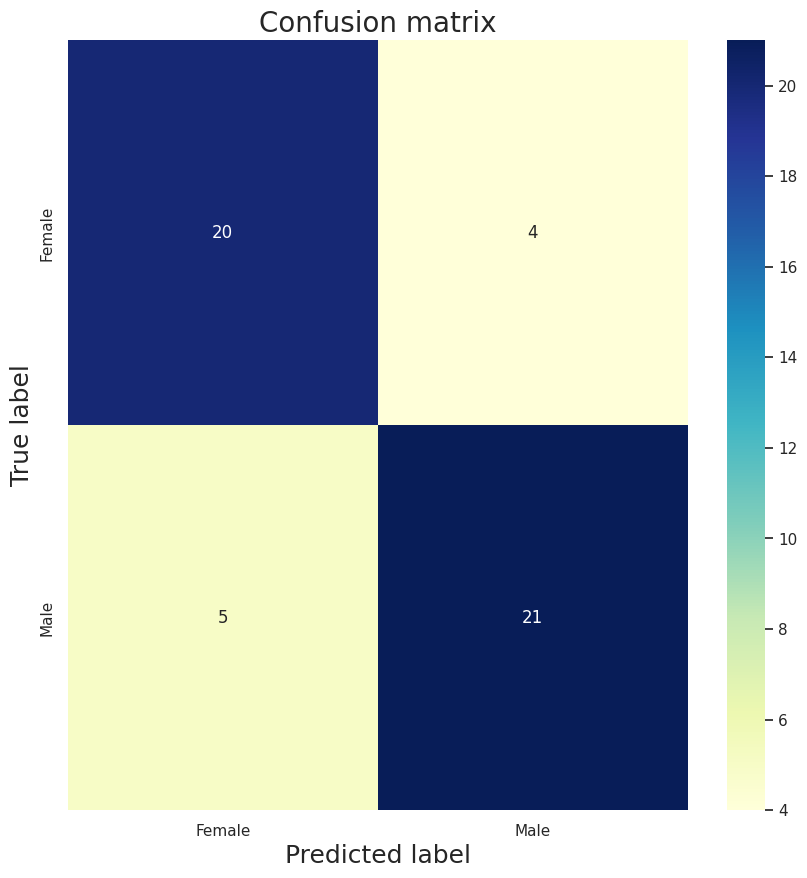

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y11['Gender_predict']

188    4.832099e-03
189    6.250604e-06
190    1.073197e-05
191    1.050203e-05
192    9.999934e-01
193    9.999921e-01
194    1.977560e-01
195    6.335345e-02
196    9.999947e-01
197    9.982451e-01
198    1.607807e-04
199    2.708893e-05
200    2.873584e-03
201    1.630233e-02
202    5.629805e-03
203    3.662007e-02
204    2.689333e-02
205    1.126196e-01
206    8.125870e-05
207    9.653903e-06
208    2.416458e-04
209    4.136265e-05
210    9.489584e-07
211    9.999999e-01
212    9.999996e-01
213    9.999985e-01
214    9.963360e-01
215    5.001981e-01
216    9.614788e-01
217    2.000532e-02
218    9.195902e-01
219    1.000000e+00
220    9.999999e-01
221    9.991666e-01
222    9.938238e-01
223    9.433962e-01
224    4.930025e-01
225    9.998984e-01
226    9.999729e-01
227    9.999845e-01
228    9.998770e-01
229    9.999989e-01
230    9.999977e-01
231    5.795002e-06
232    6.971298e-07
233    9.711882e-01
234    1.345163e-01
235    9.998984e-01
236    9.999943e-01
917    3.191462e-06


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y11['Gender_Class'].tolist()
predicted_probabilities = Y11['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

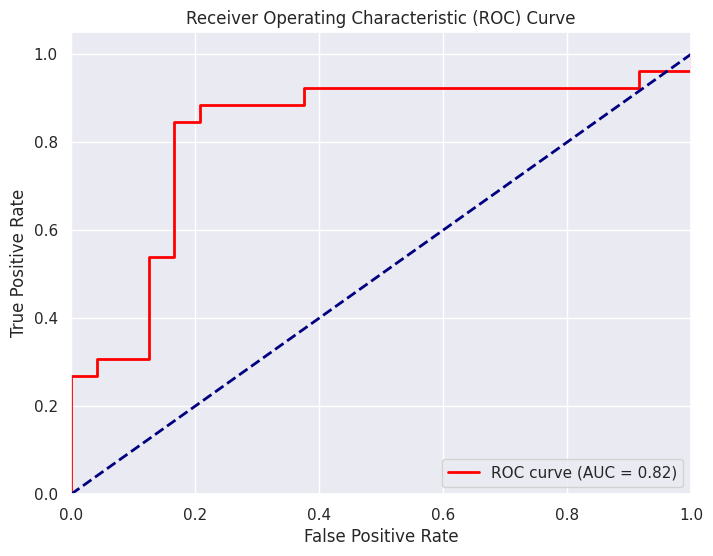

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.18
MSE: 0.18
RMSE: 0.4242640687119285


# 12 year

In [ ]:
Y12 = test[test['Age(year)'] == 12]
Y12

Age(year) Gender Folder_type Folder_name  \
237         12      F      Normal        Both   
238         12      F      Normal        Both   
239         12      F      Normal        Both   
240         12      F      Normal        Both   
241         12      F      Normal        Both   
242         12      F      Normal        Both   
243         12      F      Normal        Both   
244         12      F      Normal        Both   
245         12      F      Normal        Both   
246         12      F      Normal        Both   
247         12      F      Normal        Both   
248         12      F      Normal        Both   
249         12      F      Normal        Both   
250         12      F      Normal        Both   
251         12      F      Normal        Both   
252         12      F      Normal        Both   
253         12      F      Normal          Lt   
254         12      F      Normal          Lt   
255         12      F      Normal          Lt   
256         12      F      Normal          Rt   
257         12      F      Normal          Rt   
258         12      M      Normal        Both   
259         12      M      Normal        Both   
260         12      M      Normal        Both   
261         12      M      Normal        Both   
262         12      M      Normal        Both   
263         12      M      Normal        Both   
264         12      M      Normal        Both   
265         12      M      Normal        Both   
266         12      M      Normal        Both   
267         12      M      Normal        Both   
268         12      M      Normal        Both   
269         12      M      Normal        Both   
270         12      M      Normal        Both   
271         12      M      Normal        Both   
272         12      M      Normal        Both   
273         12      M      Normal        Both   
274         12      M      Normal        Both   
275         12      M      Normal        Both   
276         12      M      Normal        Both   
277         12      M      Normal        Both   
278         12      M      Normal          Lt   
279         12      M      Normal          Lt   
280         12      M      Normal          Rt   
918         12      F    Abnormal        Both   
919         12      F    Abnormal        Both   
920         12      M    Abnormal          Lt   
921         12      M    Abnormal          Rt   

                                             Path_Name       Filename  \
237  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        O85.jpg   
238  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipO85.jpg   
239  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        O89.jpg   
240  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipO89.jpg   
241  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        O90.jpg   
242  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipO90.jpg   
243  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        O93.jpg   
244  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipO93.jpg   
245  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        O94.jpg   
246  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipO94.jpg   
247  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        O95.jpg   
248  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipO95.jpg   
249  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        O97.jpg   
250  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipO97.jpg   
251  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        O98.jpg   
252  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipO98.jpg   
253  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipO86.jpg   
254  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipO91.jpg   
255  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipO99.jpg   
256  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        O92.jpg   
257  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        O87.jpg 

## confusion_matrix

In [ ]:
pred_str = np.array(Y12['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y12['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y12['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y12['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 79.16666666666667%
              precision    recall  f1-score   support

      Female       0.74      0.87      0.80        23
        Male       0.86      0.72      0.78        25

    accuracy                           0.79        48
   macro avg       0.80      0.79      0.79        48
weighted avg       0.80      0.79      0.79        48



Text(0.5, 76.24999999999999, 'Predicted label')

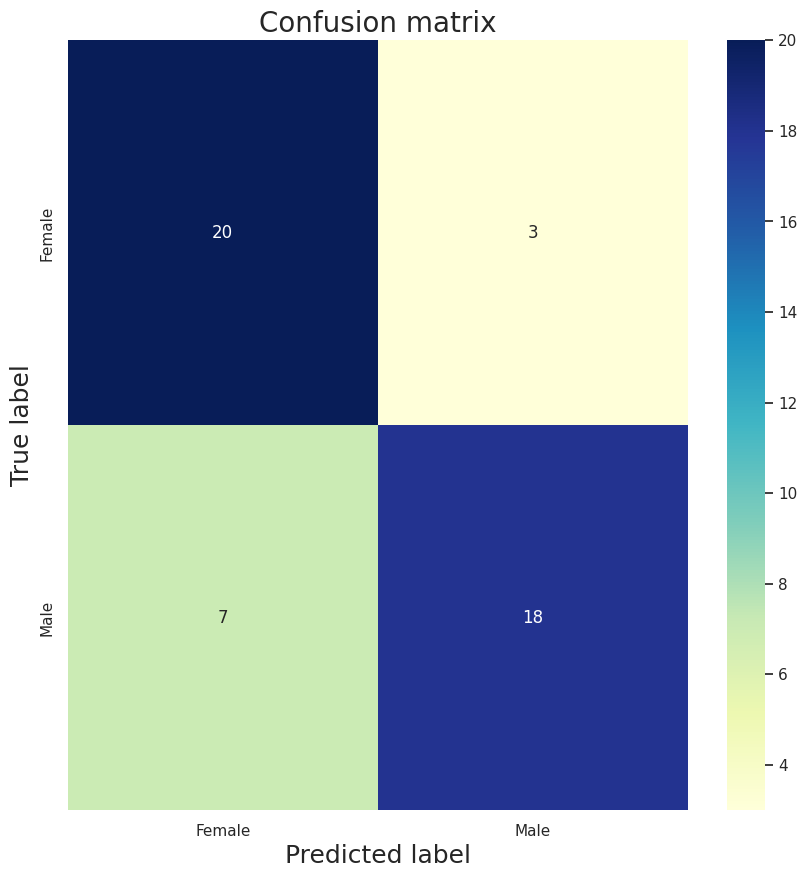

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y12['Gender_predict']

237    9.938142e-01
238    9.439442e-01
239    3.201187e-02
240    1.095451e-01
241    5.249588e-04
242    7.996857e-05
243    6.228785e-07
244    1.475229e-04
245    2.039922e-03
246    4.073390e-02
247    6.000417e-02
248    1.009671e-02
249    4.498501e-06
250    1.382747e-06
251    1.493076e-03
252    1.374884e-02
253    3.526789e-04
254    2.600084e-04
255    9.990966e-01
256    2.353603e-04
257    2.519738e-04
258    4.578246e-01
259    9.828558e-01
260    9.999737e-01
261    9.996548e-01
262    8.910833e-06
263    3.078844e-06
264    9.995820e-01
265    9.988229e-01
266    8.830261e-01
267    9.992796e-01
268    9.659649e-01
269    9.840263e-01
270    9.991412e-01
271    9.961723e-01
272    9.679879e-01
273    9.990486e-01
274    9.756952e-03
275    3.397503e-01
276    9.932008e-01
277    9.962044e-01
278    8.007606e-01
279    9.998552e-01
280    9.999680e-01
918    1.676234e-03
919    4.185234e-02
920    2.830938e-05
921    4.416466e-02
Name: Gender_predict, dtype: float32

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y12['Gender_Class'].tolist()
predicted_probabilities = Y12['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

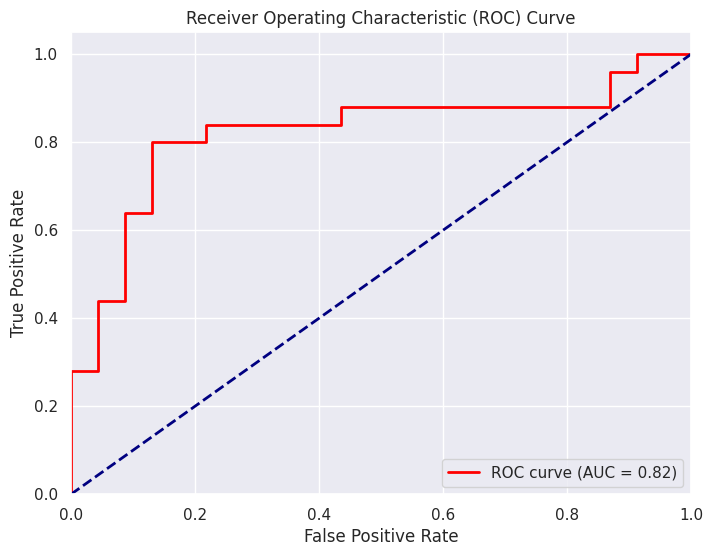

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.20833333333333334
MSE: 0.20833333333333334
RMSE: 0.45643546458763845


# 13 year

In [ ]:
Y13 = test[test['Age(year)'] == 13]
Y13

Age(year) Gender Folder_type Folder_name  \
281         13      F      Normal        Both   
282         13      F      Normal        Both   
283         13      F      Normal        Both   
284         13      F      Normal        Both   
285         13      F      Normal        Both   
286         13      F      Normal        Both   
287         13      F      Normal        Both   
288         13      F      Normal        Both   
289         13      F      Normal        Both   
290         13      F      Normal        Both   
291         13      F      Normal        Both   
292         13      F      Normal        Both   
293         13      F      Normal        Both   
294         13      F      Normal        Both   
295         13      F      Normal        Both   
296         13      F      Normal        Both   
297         13      F      Normal        Both   
298         13      F      Normal        Both   
299         13      F      Normal        Both   
300         13      F      Normal        Both   
301         13      F      Normal        Both   
302         13      F      Normal        Both   
303         13      F      Normal        Both   
304         13      F      Normal        Both   
305         13      F      Normal          Rt   
306         13      M      Normal        Both   
307         13      M      Normal        Both   
308         13      M      Normal        Both   
309         13      M      Normal        Both   
310         13      M      Normal        Both   
311         13      M      Normal        Both   
312         13      M      Normal        Both   
313         13      M      Normal        Both   
314         13      M      Normal        Both   
315         13      M      Normal        Both   
316         13      M      Normal        Both   
317         13      M      Normal        Both   
318         13      M      Normal        Both   
319         13      M      Normal        Both   
320         13      M      Normal        Both   
321         13      M      Normal        Both   
322         13      M      Normal        Both   
323         13      M      Normal        Both   
324         13      M      Normal        Both   
325         13      M      Normal        Both   
326         13      M      Normal        Both   
327         13      M      Normal        Both   
328         13      M      Normal        Both   
329         13      M      Normal        Both   
330         13      M      Normal          Lt   

                                             Path_Name       Filename  \
281  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        G84.jpg   
282  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipG84.jpg   
283  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        G92.jpg   
284  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipG92.jpg   
285  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        G93.jpg   
286  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipG93.jpg   
287  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        G94.jpg   
288  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipG94.jpg   
289  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        G98.jpg   
290  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipG98.jpg   
291  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       G101.jpg   
292  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipG101.jpg   
293  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       G109.jpg   
294  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipG109.jpg   
295  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       G111.jpg   
296  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipG111.jpg   
297  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...        G83.jpg   
298  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipG83.jpg   
299  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       G105.jpg   
300  /content/gdrive/MyDrive/Tooth_Shap_GPT/D

## confusion_matrix

In [ ]:
pred_str = np.array(Y13['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y13['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y13['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y13['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 80.0%
              precision    recall  f1-score   support

      Female       0.78      0.84      0.81        25
        Male       0.83      0.76      0.79        25

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



Text(0.5, 76.24999999999999, 'Predicted label')

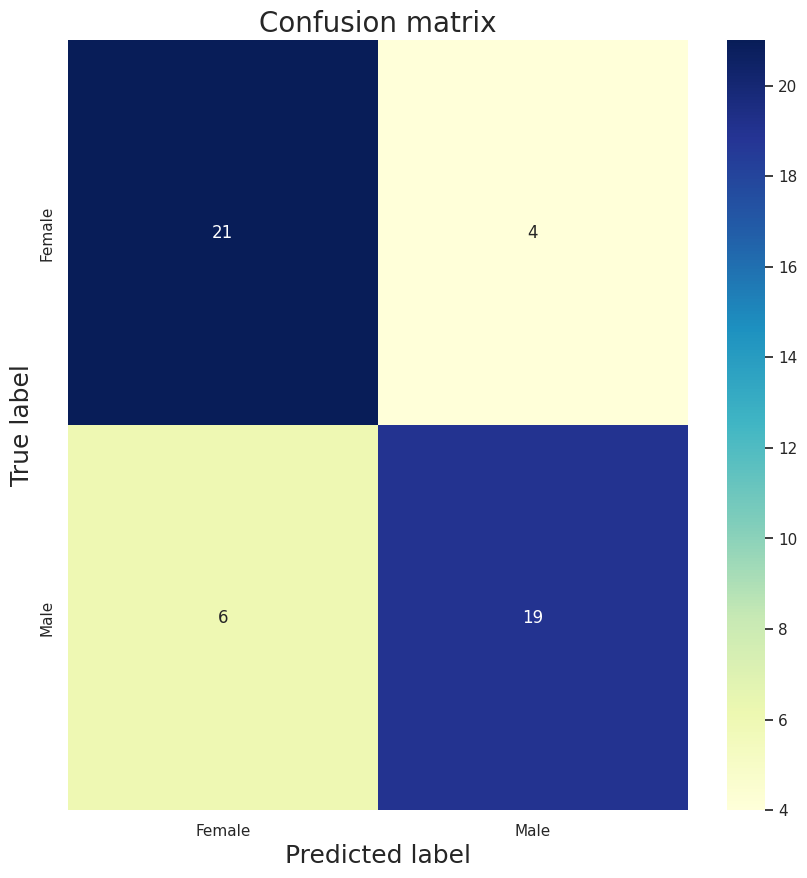

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y13['Gender_predict']

281    2.051012e-05
282    1.403988e-08
283    1.126082e-05
284    4.816314e-05
285    6.426320e-06
286    4.528466e-07
287    4.614856e-02
288    8.467376e-02
289    7.635884e-03
290    9.619307e-04
291    2.967968e-05
292    2.789008e-03
293    5.842364e-06
294    1.531619e-03
295    7.891294e-01
296    1.867798e-01
297    1.452314e-06
298    9.727148e-07
299    1.717645e-03
300    2.447110e-03
301    9.994997e-01
302    9.836691e-01
303    4.179160e-06
304    3.550275e-05
305    9.971520e-01
306    9.992537e-01
307    9.966254e-01
308    9.998725e-01
309    9.992380e-01
310    9.972691e-01
311    9.990178e-01
312    9.993254e-01
313    9.999743e-01
314    1.400774e-05
315    2.101802e-07
316    4.082332e-02
317    2.402238e-02
318    8.747046e-02
319    9.008615e-01
320    9.999856e-01
321    9.998512e-01
322    9.993478e-01
323    9.978765e-01
324    9.969323e-01
325    9.989878e-01
326    1.564192e-01
327    9.999257e-01
328    9.322692e-01
329    9.939249e-01
330    9.995657e-01


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y13['Gender_Class'].tolist()
predicted_probabilities = Y13['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

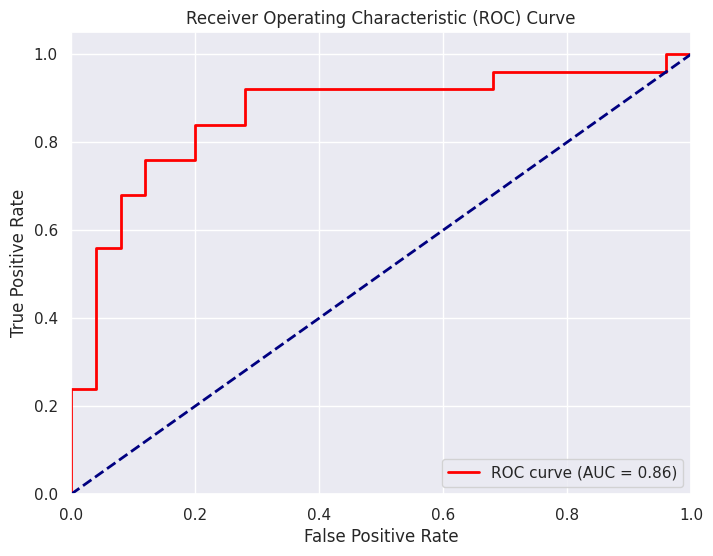

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.2
MSE: 0.2
RMSE: 0.4472135954999579


# 14 year

In [ ]:
Y14 = test[test['Age(year)'] == 14]
Y14

Age(year) Gender Folder_type Folder_name  \
331         14      F      Normal        Both   
332         14      F      Normal        Both   
333         14      F      Normal        Both   
334         14      F      Normal        Both   
335         14      F      Normal        Both   
336         14      F      Normal        Both   
337         14      F      Normal        Both   
338         14      F      Normal        Both   
339         14      F      Normal        Both   
340         14      F      Normal        Both   
341         14      F      Normal        Both   
342         14      F      Normal        Both   
343         14      F      Normal        Both   
344         14      F      Normal        Both   
345         14      F      Normal        Both   
346         14      F      Normal        Both   
347         14      F      Normal        Both   
348         14      F      Normal        Both   
349         14      F      Normal        Both   
350         14      F      Normal        Both   
351         14      F      Normal        Both   
352         14      F      Normal        Both   
353         14      M      Normal        Both   
354         14      M      Normal        Both   
355         14      M      Normal        Both   
356         14      M      Normal        Both   
357         14      M      Normal        Both   
358         14      M      Normal        Both   
359         14      M      Normal        Both   
360         14      M      Normal        Both   
361         14      M      Normal        Both   
362         14      M      Normal        Both   
363         14      M      Normal        Both   
364         14      M      Normal        Both   
365         14      M      Normal        Both   
366         14      M      Normal        Both   
367         14      M      Normal        Both   
368         14      M      Normal        Both   
369         14      M      Normal          Lt   
370         14      M      Normal          Lt   
371         14      M      Normal          Lt   
372         14      M      Normal          Rt   
373         14      M      Normal          Rt   
374         14      M      Normal          Rt   
922         14      F    Abnormal          Lt   
923         14      F    Abnormal          Lt   
924         14      F    Abnormal          Rt   

                                             Path_Name      Filename  \
331  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       Y96.jpg   
332  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipY96.jpg   
333  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       Y98.jpg   
334  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipY98.jpg   
335  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       Y99.jpg   
336  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipY99.jpg   
337  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Y101.jpg   
338  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipY101.jpg   
339  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Y104.jpg   
340  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipY104.jpg   
341  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Y188.jpg   
342  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipY188.jpg   
343  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Y190.jpg   
344  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipY190.jpg   
345  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Y193.jpg   
346  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipY193.jpg   
347  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Y198.jpg   
348  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipY198.jpg   
349  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Y202.jpg   
350  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipY202.jpg   
351  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Y204.jpg   
352  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipY204.jpg

## confusion_matrix

In [ ]:
pred_str = np.array(Y14['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y14['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y14['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y14['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 68.08510638297872%
              precision    recall  f1-score   support

      Female       0.68      0.76      0.72        25
        Male       0.68      0.59      0.63        22

    accuracy                           0.68        47
   macro avg       0.68      0.68      0.68        47
weighted avg       0.68      0.68      0.68        47



Text(0.5, 76.24999999999999, 'Predicted label')

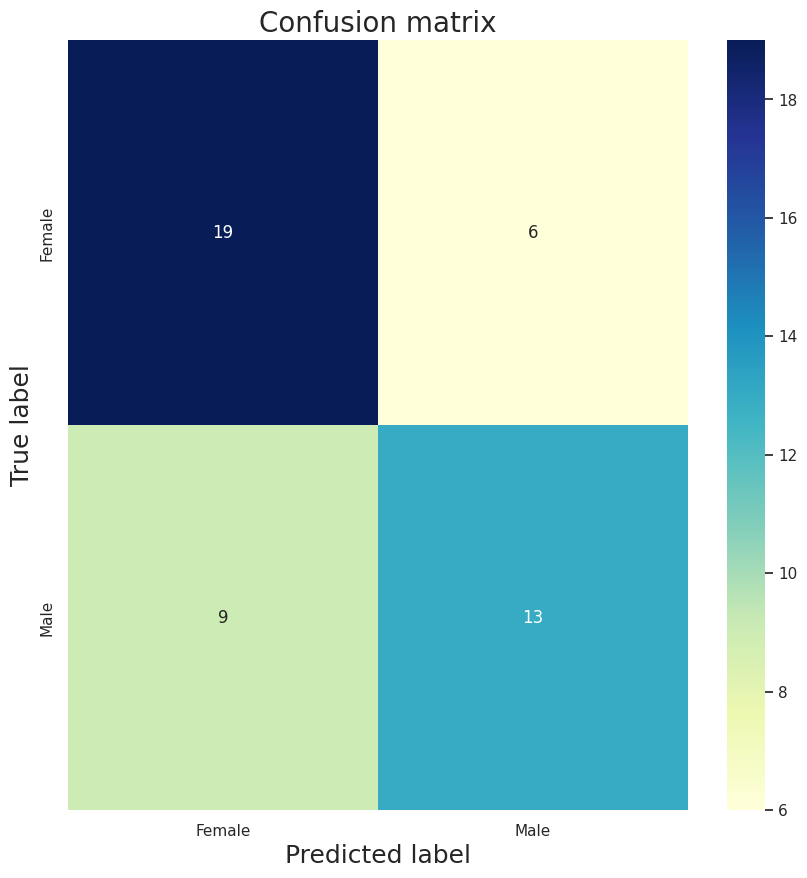

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y14['Gender_predict']

331    3.884304e-06
332    1.967809e-06
333    3.581738e-05
334    2.762264e-05
335    7.738255e-01
336    5.985802e-01
337    9.141839e-08
338    7.839112e-08
339    3.193895e-01
340    1.005946e-01
341    2.427880e-04
342    5.355147e-04
343    7.955489e-01
344    8.460053e-03
345    3.525095e-02
346    6.685662e-01
347    5.885412e-02
348    5.333064e-04
349    1.218563e-02
350    6.558827e-01
351    5.728136e-05
352    2.298768e-03
353    9.962214e-01
354    9.985448e-01
355    2.034935e-01
356    2.473327e-01
357    5.996525e-01
358    8.882859e-01
359    3.173796e-03
360    2.845414e-03
361    9.983012e-01
362    9.925379e-01
363    9.562204e-01
364    9.997201e-01
365    3.296212e-04
366    1.242866e-04
367    4.973359e-01
368    1.877492e-01
369    9.817983e-01
370    2.869121e-02
371    5.258689e-01
372    9.931402e-01
373    9.999961e-01
374    8.664578e-01
922    6.496162e-04
923    9.789441e-01
924    7.590499e-06
Name: Gender_predict, dtype: float32

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y14['Gender_Class'].tolist()
predicted_probabilities = Y14['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

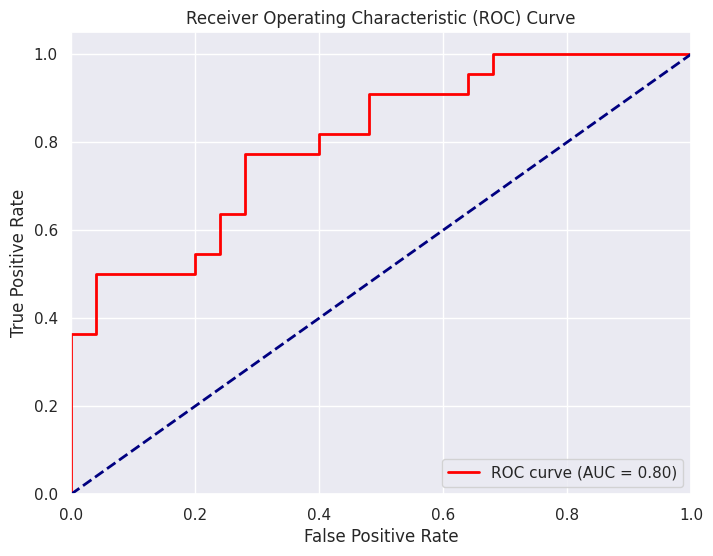

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.3191489361702128
MSE: 0.3191489361702128
RMSE: 0.564932682866032


# 15 year

In [ ]:
Y15 = test[test['Age(year)'] == 15]
Y15

Age(year) Gender Folder_type Folder_name  \
375         15      F      Normal        Both   
376         15      F      Normal        Both   
377         15      F      Normal        Both   
378         15      F      Normal        Both   
379         15      F      Normal        Both   
380         15      F      Normal        Both   
381         15      F      Normal        Both   
382         15      F      Normal        Both   
383         15      F      Normal        Both   
384         15      F      Normal        Both   
385         15      F      Normal        Both   
386         15      F      Normal        Both   
387         15      F      Normal        Both   
388         15      F      Normal        Both   
389         15      F      Normal        Both   
390         15      F      Normal        Both   
391         15      F      Normal        Both   
392         15      F      Normal        Both   
393         15      F      Normal        Both   
394         15      F      Normal        Both   
395         15      F      Normal        Both   
396         15      F      Normal        Both   
397         15      F      Normal        Both   
398         15      F      Normal        Both   
399         15      F      Normal        Both   
400         15      F      Normal        Both   
401         15      M      Normal        Both   
402         15      M      Normal        Both   
403         15      M      Normal        Both   
404         15      M      Normal        Both   
405         15      M      Normal        Both   
406         15      M      Normal        Both   
407         15      M      Normal        Both   
408         15      M      Normal        Both   
409         15      M      Normal        Both   
410         15      M      Normal        Both   
411         15      M      Normal        Both   
412         15      M      Normal        Both   
413         15      M      Normal        Both   
414         15      M      Normal        Both   
415         15      M      Normal          Lt   
416         15      M      Normal          Lt   
417         15      M      Normal          Lt   
418         15      M      Normal          Lt   
419         15      M      Normal          Lt   
420         15      M      Normal          Lt   
421         15      M      Normal          Lt   
422         15      M      Normal          Lt   
423         15      M      Normal          Rt   
424         15      M      Normal          Rt   
425         15      M      Normal          Rt   

                                             Path_Name      Filename  \
375  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B148.jpg   
376  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB148.jpg   
377  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B153.jpg   
378  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB153.jpg   
379  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B157.jpg   
380  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB157.jpg   
381  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B162.jpg   
382  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB162.jpg   
383  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B166.jpg   
384  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB166.jpg   
385  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B176.jpg   
386  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB176.jpg   
387  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B179.jpg   
388  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB179.jpg   
389  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B181.jpg   
390  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB181.jpg   
391  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B183.jpg   
392  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipB183.jpg   
393  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      B158.jpg   
394  /content/gd

## confusion_matrix

In [ ]:
pred_str = np.array(Y15['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y15['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y15['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y15['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 82.3529411764706%
              precision    recall  f1-score   support

      Female       0.79      0.88      0.84        26
        Male       0.86      0.76      0.81        25

    accuracy                           0.82        51
   macro avg       0.83      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51



Text(0.5, 76.24999999999999, 'Predicted label')

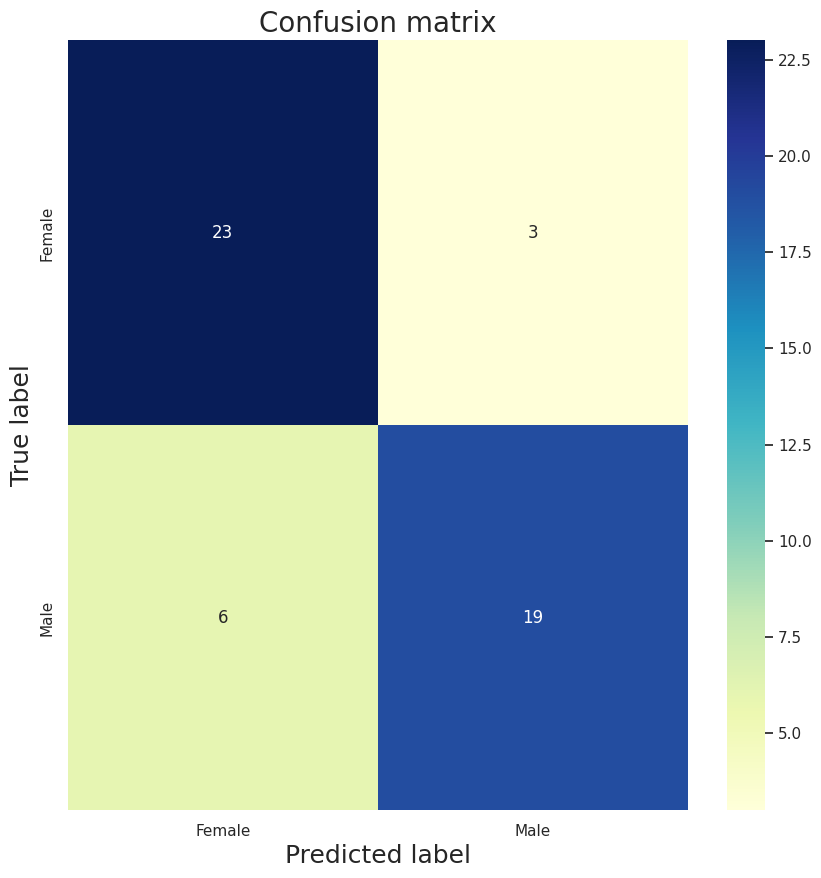

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y15['Gender_predict']

375    3.457977e-03
376    1.270172e-03
377    6.729124e-01
378    5.093019e-01
379    8.891937e-06
380    2.947991e-05
381    4.221040e-02
382    1.560264e-02
383    1.649560e-05
384    2.142166e-04
385    2.536523e-05
386    7.028818e-03
387    8.069120e-09
388    2.970276e-09
389    1.390305e-08
390    1.644141e-06
391    1.718317e-02
392    6.184255e-01
393    1.527435e-03
394    1.409568e-05
395    2.124607e-07
396    2.754448e-07
397    1.721032e-02
398    4.520642e-02
399    2.387884e-05
400    5.066621e-05
401    9.999920e-01
402    9.999531e-01
403    9.713149e-02
404    5.730187e-02
405    9.989673e-01
406    9.998685e-01
407    9.999952e-01
408    9.999980e-01
409    9.999697e-01
410    9.988063e-01
411    8.285056e-01
412    8.503439e-01
413    9.378569e-01
414    8.882099e-01
415    9.917637e-01
416    9.498579e-01
417    9.999999e-01
418    1.076162e-02
419    8.923795e-01
420    9.581475e-01
421    2.707954e-01
422    9.999539e-01
423    9.981531e-01
424    2.598889e-01


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y15['Gender_Class'].tolist()
predicted_probabilities = Y15['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

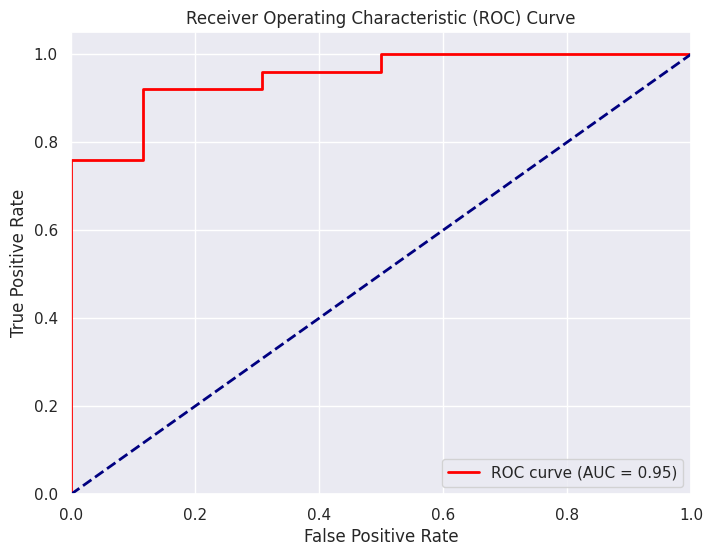

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.17647058823529413
MSE: 0.17647058823529413
RMSE: 0.42008402520840293


# 16 year

In [ ]:
Y16 = test[test['Age(year)'] == 16]
Y16

Age(year) Gender Folder_type Folder_name  \
426         16      F      Normal        Both   
427         16      F      Normal        Both   
428         16      F      Normal        Both   
429         16      F      Normal        Both   
430         16      F      Normal        Both   
431         16      F      Normal        Both   
432         16      F      Normal        Both   
433         16      F      Normal        Both   
434         16      F      Normal        Both   
435         16      F      Normal        Both   
436         16      F      Normal        Both   
437         16      F      Normal        Both   
438         16      F      Normal        Both   
439         16      F      Normal        Both   
440         16      F      Normal        Both   
441         16      F      Normal        Both   
442         16      F      Normal        Both   
443         16      F      Normal        Both   
444         16      F      Normal        Both   
445         16      F      Normal        Both   
446         16      F      Normal        Both   
447         16      F      Normal        Both   
448         16      F      Normal          Lt   
449         16      F      Normal          Lt   
450         16      F      Normal          Lt   
451         16      M      Normal        Both   
452         16      M      Normal        Both   
453         16      M      Normal        Both   
454         16      M      Normal        Both   
455         16      M      Normal        Both   
456         16      M      Normal        Both   
457         16      M      Normal        Both   
458         16      M      Normal        Both   
459         16      M      Normal        Both   
460         16      M      Normal        Both   
461         16      M      Normal        Both   
462         16      M      Normal        Both   
463         16      M      Normal        Both   
464         16      M      Normal        Both   
465         16      M      Normal        Both   
466         16      M      Normal        Both   
467         16      M      Normal        Both   
468         16      M      Normal        Both   
469         16      M      Normal        Both   
470         16      M      Normal        Both   
471         16      M      Normal          Lt   
925         16      M    Abnormal        Both   
926         16      M    Abnormal        Both   
927         16      M    Abnormal        Both   
928         16      M    Abnormal        Both   

                                             Path_Name      Filename  \
426  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      T159.jpg   
427  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipT159.jpg   
428  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      T177.jpg   
429  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipT177.jpg   
430  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      T178.jpg   
431  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipT178.jpg   
432  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      T181.jpg   
433  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipT181.jpg   
434  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      T183.jpg   
435  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipT183.jpg   
436  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      T192.jpg   
437  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipT192.jpg   
438  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      T195.jpg   
439  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipT195.jpg   
440  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      T197.jpg   
441  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipT197.jpg   
442  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      T160.jpg   
443  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipT160.jpg   
444  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      T179.jpg   
445  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipT179.

## confusion_matrix

In [ ]:
pred_str = np.array(Y16['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y16['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y16['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y16['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 90.0%
              precision    recall  f1-score   support

      Female       0.88      0.92      0.90        25
        Male       0.92      0.88      0.90        25

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



Text(0.5, 76.24999999999999, 'Predicted label')

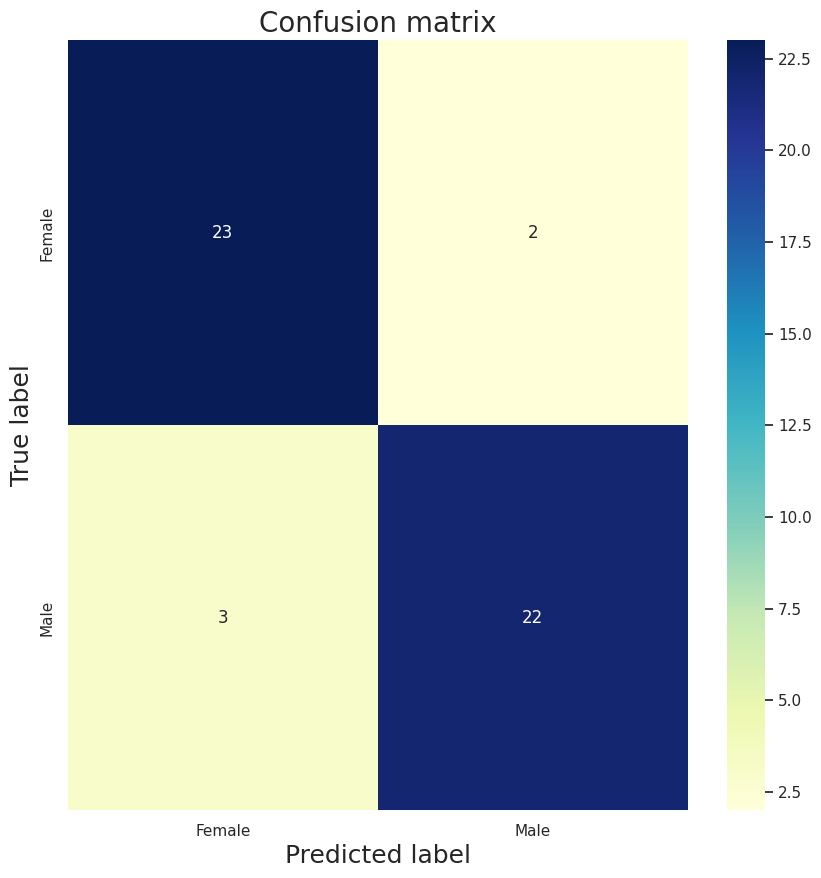

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y16['Gender_predict']

426    3.493530e-03
427    1.225348e-02
428    1.280973e-03
429    2.892060e-02
430    3.752749e-05
431    5.218350e-05
432    8.159764e-05
433    3.569381e-05
434    2.588958e-03
435    1.206255e-02
436    1.350329e-02
437    7.285383e-03
438    7.266239e-07
439    3.257537e-05
440    1.682015e-05
441    1.607732e-05
442    9.571518e-01
443    4.199404e-01
444    1.331518e-01
445    8.753635e-03
446    9.232405e-01
447    1.144831e-03
448    1.283458e-03
449    2.874097e-07
450    1.464493e-09
451    9.999932e-01
452    9.999931e-01
453    1.000000e+00
454    9.999990e-01
455    9.925274e-01
456    9.999902e-01
457    1.053877e-01
458    9.087464e-01
459    9.998752e-01
460    9.981016e-01
461    9.972141e-01
462    9.994448e-01
463    8.077948e-01
464    9.999631e-01
465    9.999954e-01
466    9.953542e-01
467    3.671226e-01
468    9.953959e-01
469    1.313867e-01
470    9.109387e-01
471    9.945404e-01
925    9.979855e-01
926    9.963882e-01
927    9.989685e-01
928    8.935152e-01


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y16['Gender_Class'].tolist()
predicted_probabilities = Y16['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

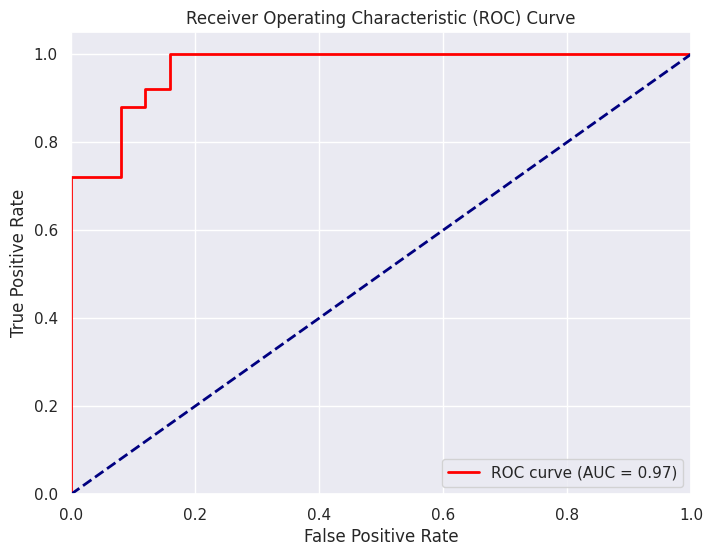

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.1
MSE: 0.1
RMSE: 0.31622776601683794


# 17 year

In [ ]:
Y17 = test[test['Age(year)'] == 17]
Y17

Age(year) Gender Folder_type Folder_name  \
472         17      F      Normal        Both   
473         17      F      Normal        Both   
474         17      F      Normal        Both   
475         17      F      Normal        Both   
476         17      F      Normal        Both   
477         17      F      Normal        Both   
478         17      F      Normal        Both   
479         17      F      Normal        Both   
480         17      F      Normal        Both   
481         17      F      Normal        Both   
482         17      F      Normal        Both   
483         17      F      Normal        Both   
484         17      F      Normal        Both   
485         17      F      Normal        Both   
486         17      F      Normal        Both   
487         17      F      Normal        Both   
488         17      F      Normal        Both   
489         17      F      Normal        Both   
490         17      F      Normal        Both   
491         17      F      Normal        Both   
492         17      F      Normal        Both   
493         17      F      Normal        Both   
494         17      F      Normal          Lt   
495         17      F      Normal          Lt   
496         17      M      Normal        Both   
497         17      M      Normal        Both   
498         17      M      Normal        Both   
499         17      M      Normal        Both   
500         17      M      Normal        Both   
501         17      M      Normal        Both   
502         17      M      Normal        Both   
503         17      M      Normal        Both   
504         17      M      Normal        Both   
505         17      M      Normal        Both   
506         17      M      Normal        Both   
507         17      M      Normal        Both   
508         17      M      Normal        Both   
509         17      M      Normal        Both   
510         17      M      Normal        Both   
511         17      M      Normal        Both   
512         17      M      Normal        Both   
513         17      M      Normal        Both   
514         17      M      Normal        Both   
515         17      M      Normal        Both   
516         17      M      Normal        Both   
517         17      M      Normal        Both   
518         17      M      Normal        Both   
519         17      M      Normal        Both   
520         17      M      Normal          Rt   
521         17      M      Normal          Rt   
929         17      F    Abnormal          Rt   

                                             Path_Name      Filename  \
472  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      K141.jpg   
473  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipK141.jpg   
474  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      K155.jpg   
475  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipK155.jpg   
476  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      K157.jpg   
477  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipK157.jpg   
478  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      K167.jpg   
479  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipK167.jpg   
480  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      K176.jpg   
481  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipK176.jpg   
482  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      K177.jpg   
483  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipK177.jpg   
484  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      K183.jpg   
485  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipK183.jpg   
486  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      K186.jpg   
487  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipK186.jpg   
488  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      K145.jpg   
489  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipK145.jpg   
490  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      K162.jpg   
491  /content/gd

## confusion_matrix

In [ ]:
pred_str = np.array(Y17['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y17['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y17['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y17['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 96.07843137254902%
              precision    recall  f1-score   support

      Female       0.93      1.00      0.96        25
        Male       1.00      0.92      0.96        26

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



Text(0.5, 76.24999999999999, 'Predicted label')

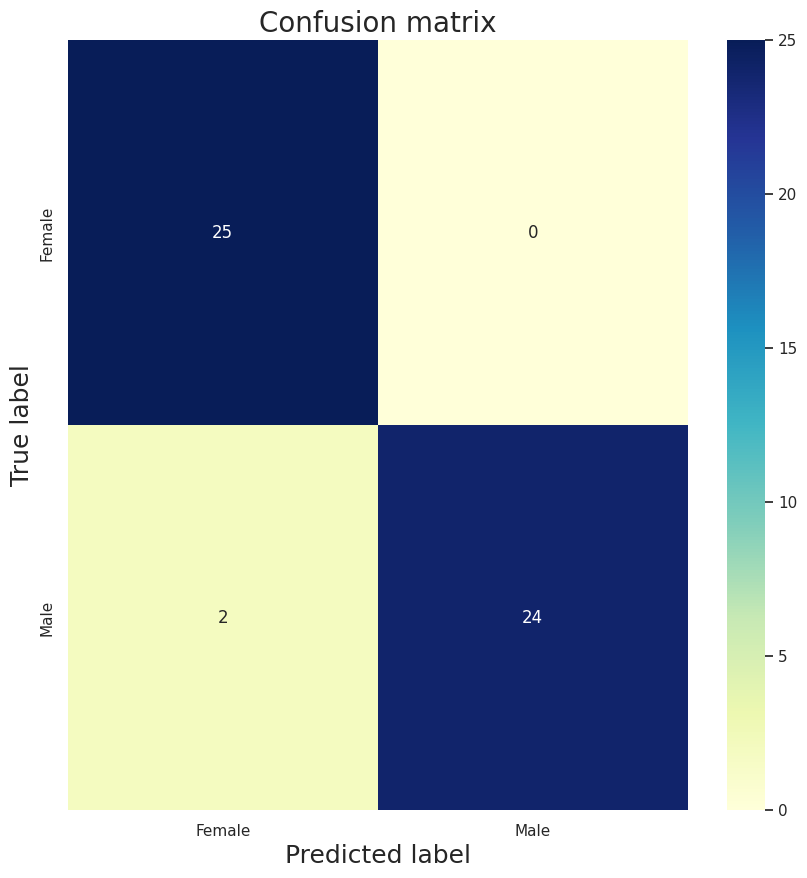

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y17['Gender_predict']

472    1.306056e-02
473    6.705106e-05
474    8.947800e-05
475    8.113737e-05
476    2.013730e-02
477    1.629300e-03
478    2.663342e-07
479    9.549730e-09
480    1.939962e-02
481    3.144459e-03
482    7.482016e-04
483    1.344767e-04
484    5.075387e-07
485    1.772263e-06
486    3.101716e-03
487    8.364505e-02
488    1.461690e-06
489    6.384961e-07
490    2.500909e-04
491    5.025309e-03
492    5.533152e-05
493    1.407124e-01
494    3.501937e-03
495    1.020849e-05
496    9.999995e-01
497    9.999694e-01
498    9.999994e-01
499    1.000000e+00
500    1.000000e+00
501    9.999996e-01
502    9.999939e-01
503    9.999999e-01
504    9.236782e-01
505    9.989538e-01
506    9.999992e-01
507    9.999999e-01
508    9.999839e-01
509    9.999996e-01
510    9.999920e-01
511    9.999401e-01
512    7.160202e-03
513    2.262235e-02
514    9.990175e-01
515    9.901756e-01
516    9.999821e-01
517    9.818330e-01
518    9.980103e-01
519    9.985865e-01
520    9.989282e-01
521    9.687412e-01


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y17['Gender_Class'].tolist()
predicted_probabilities = Y17['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

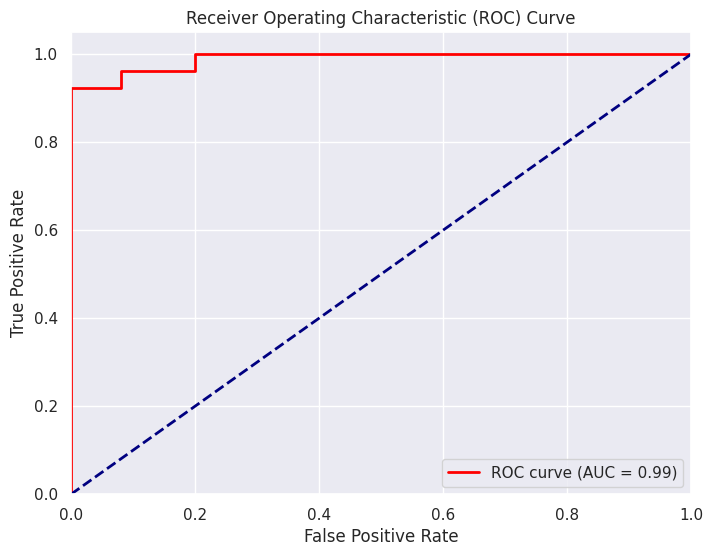

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.0392156862745098
MSE: 0.0392156862745098
RMSE: 0.19802950859533486


# 18 year

In [ ]:
Y18 = test[test['Age(year)'] == 18]
Y18

Age(year) Gender Folder_type Folder_name  \
522         18      F      Normal        Both   
523         18      F      Normal        Both   
524         18      F      Normal        Both   
525         18      F      Normal        Both   
526         18      F      Normal        Both   
527         18      F      Normal        Both   
528         18      F      Normal        Both   
529         18      F      Normal        Both   
530         18      F      Normal        Both   
531         18      F      Normal        Both   
532         18      F      Normal        Both   
533         18      F      Normal        Both   
534         18      F      Normal        Both   
535         18      F      Normal        Both   
536         18      F      Normal        Both   
537         18      F      Normal        Both   
538         18      F      Normal        Both   
539         18      F      Normal        Both   
540         18      F      Normal        Both   
541         18      F      Normal        Both   
542         18      F      Normal        Both   
543         18      F      Normal        Both   
544         18      F      Normal        Both   
545         18      F      Normal        Both   
546         18      F      Normal          Lt   
547         18      M      Normal        Both   
548         18      M      Normal        Both   
549         18      M      Normal        Both   
550         18      M      Normal        Both   
551         18      M      Normal        Both   
552         18      M      Normal        Both   
553         18      M      Normal        Both   
554         18      M      Normal        Both   
555         18      M      Normal        Both   
556         18      M      Normal        Both   
557         18      M      Normal        Both   
558         18      M      Normal        Both   
559         18      M      Normal        Both   
560         18      M      Normal        Both   
561         18      M      Normal        Both   
562         18      M      Normal        Both   
563         18      M      Normal        Both   
564         18      M      Normal        Both   
565         18      M      Normal        Both   
566         18      M      Normal        Both   
567         18      M      Normal        Both   
568         18      M      Normal        Both   
569         18      M      Normal        Both   
570         18      M      Normal        Both   
571         18      M      Normal          Lt   

                                             Path_Name      Filename  \
522  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      S153.jpg   
523  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipS153.jpg   
524  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      S159.jpg   
525  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipS159.jpg   
526  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      S167.jpg   
527  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipS167.jpg   
528  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      S158.jpg   
529  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipS158.jpg   
530  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      S155.jpg   
531  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipS155.jpg   
532  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      S160.jpg   
533  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipS160.jpg   
534  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      S186.jpg   
535  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipS186.jpg   
536  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      S169.jpg   
537  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipS169.jpg   
538  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      S165.jpg   
539  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipS165.jpg   
540  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      S195.jpg   
541  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipS195.

## confusion_matrix

In [ ]:
pred_str = np.array(Y18['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y18['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y18['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y18['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 96.0%
              precision    recall  f1-score   support

      Female       0.93      1.00      0.96        25
        Male       1.00      0.92      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Text(0.5, 76.24999999999999, 'Predicted label')

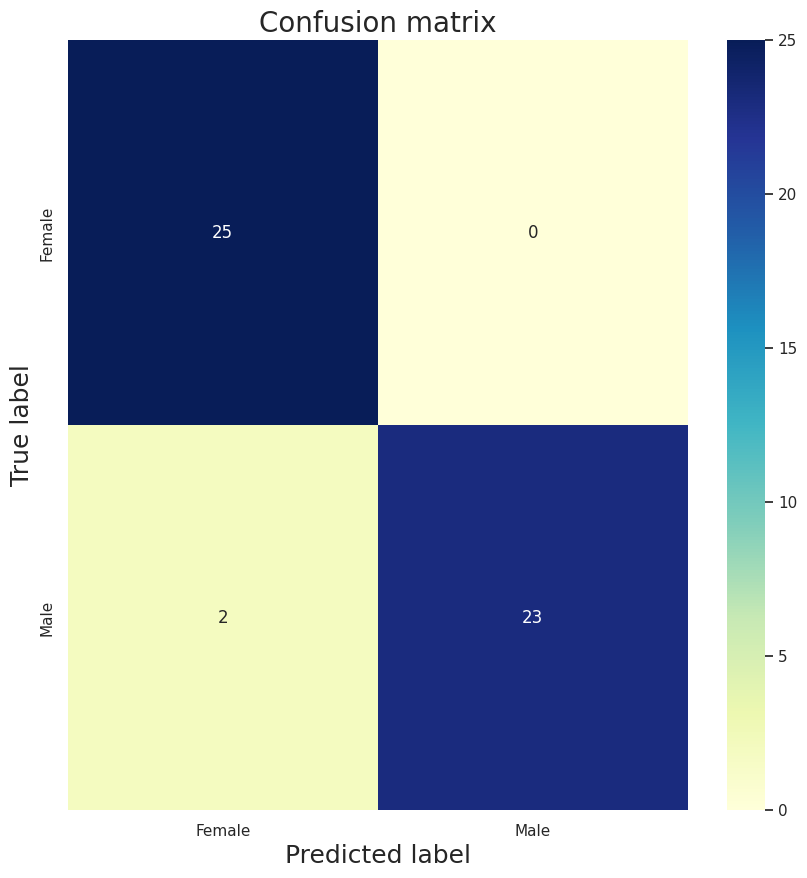

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y18['Gender_predict']

522    8.730318e-07
523    4.598679e-06
524    4.502814e-06
525    2.876148e-07
526    1.845019e-05
527    4.798600e-04
528    4.350453e-06
529    3.776401e-06
530    4.513666e-06
531    2.342800e-08
532    4.987487e-06
533    2.118423e-04
534    4.399615e-06
535    1.279957e-06
536    2.203973e-05
537    3.994135e-05
538    1.881404e-07
539    2.748645e-08
540    4.385676e-08
541    3.447683e-09
542    1.146992e-07
543    6.495255e-04
544    3.220633e-06
545    1.123410e-09
546    1.620653e-03
547    9.999151e-01
548    9.999345e-01
549    9.966511e-01
550    1.289389e-01
551    9.999986e-01
552    9.999617e-01
553    9.996558e-01
554    9.994699e-01
555    9.967074e-01
556    1.001480e-02
557    9.999697e-01
558    9.999811e-01
559    9.955732e-01
560    6.094946e-01
561    9.071647e-01
562    9.993376e-01
563    9.999854e-01
564    9.999976e-01
565    9.995925e-01
566    9.993144e-01
567    9.999989e-01
568    9.999998e-01
569    9.995804e-01
570    9.999217e-01
571    9.998656e-01


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y18['Gender_Class'].tolist()
predicted_probabilities = Y18['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

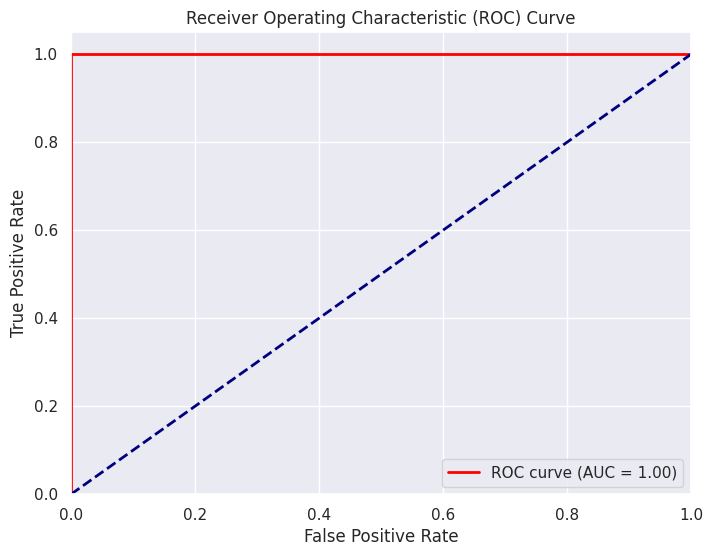

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.04
MSE: 0.04
RMSE: 0.2


# 19 year

In [ ]:
Y19 = test[test['Age(year)'] == 19]
Y19

Age(year) Gender Folder_type Folder_name  \
572         19      F      Normal        Both   
573         19      F      Normal        Both   
574         19      F      Normal        Both   
575         19      F      Normal        Both   
576         19      F      Normal        Both   
577         19      F      Normal        Both   
578         19      F      Normal        Both   
579         19      F      Normal        Both   
580         19      F      Normal        Both   
581         19      F      Normal        Both   
582         19      F      Normal        Both   
583         19      F      Normal        Both   
584         19      F      Normal        Both   
585         19      F      Normal        Both   
586         19      F      Normal        Both   
587         19      F      Normal        Both   
588         19      F      Normal        Both   
589         19      F      Normal        Both   
590         19      F      Normal        Both   
591         19      F      Normal        Both   
592         19      F      Normal        Both   
593         19      F      Normal        Both   
594         19      F      Normal          Lt   
595         19      F      Normal          Lt   
596         19      M      Normal        Both   
597         19      M      Normal        Both   
598         19      M      Normal        Both   
599         19      M      Normal        Both   
600         19      M      Normal        Both   
601         19      M      Normal        Both   
602         19      M      Normal        Both   
603         19      M      Normal        Both   
604         19      M      Normal        Both   
605         19      M      Normal        Both   
606         19      M      Normal        Both   
607         19      M      Normal        Both   
608         19      M      Normal        Both   
609         19      M      Normal        Both   
610         19      M      Normal        Both   
611         19      M      Normal        Both   
612         19      M      Normal        Both   
613         19      M      Normal        Both   
614         19      M      Normal        Both   
615         19      M      Normal        Both   
616         19      M      Normal        Both   
617         19      M      Normal        Both   
618         19      M      Normal        Both   
619         19      M      Normal        Both   
620         19      M      Normal          Rt   

                                             Path_Name      Filename  \
572  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      L220.jpg   
573  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipL220.jpg   
574  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      L230.jpg   
575  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipL230.jpg   
576  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      L231.jpg   
577  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipL231.jpg   
578  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      L232.jpg   
579  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipL232.jpg   
580  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      L240.jpg   
581  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipL240.jpg   
582  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      L244.jpg   
583  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipL244.jpg   
584  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      L250.jpg   
585  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipL250.jpg   
586  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      L262.jpg   
587  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipL262.jpg   
588  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      L267.jpg   
589  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipL267.jpg   
590  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      L236.jpg   
591  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipL236.jpg   
592  /content/gdrive/MyDrive/Tooth_Shap_GP

## confusion_matrix

In [ ]:
pred_str = np.array(Y19['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y19['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y19['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y19['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 95.91836734693878%
              precision    recall  f1-score   support

      Female       0.92      1.00      0.96        24
        Male       1.00      0.92      0.96        25

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



Text(0.5, 76.24999999999999, 'Predicted label')

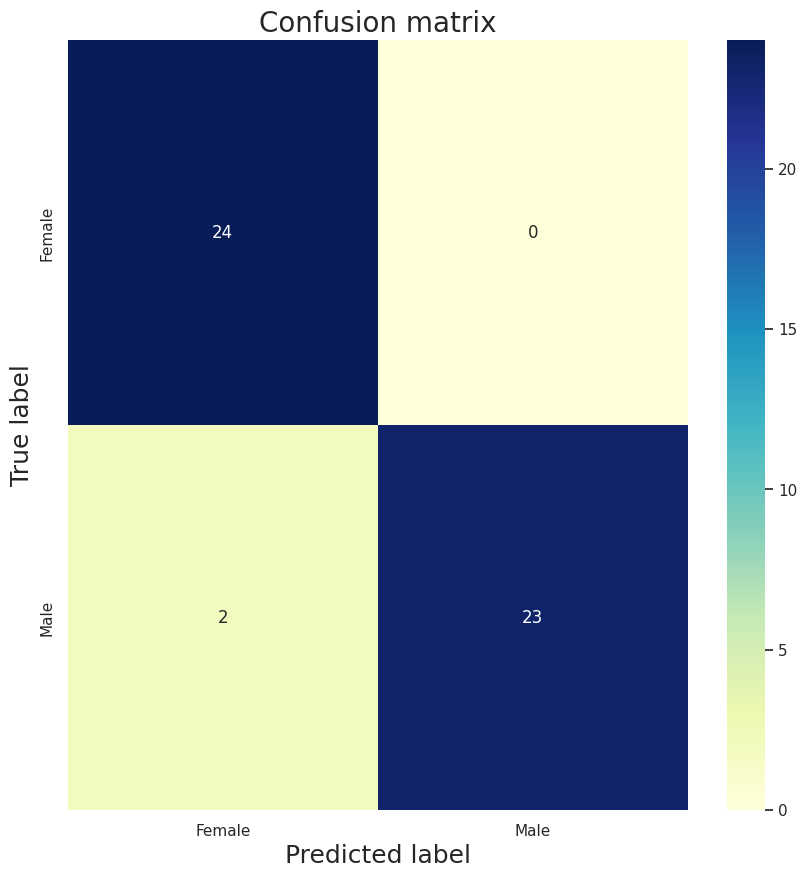

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y19['Gender_predict']

572    4.757633e-07
573    4.596939e-06
574    1.810239e-02
575    2.017118e-01
576    3.147062e-05
577    1.552597e-05
578    3.166719e-06
579    1.444652e-05
580    1.557184e-01
581    4.071634e-01
582    1.090978e-06
583    1.039311e-05
584    7.500164e-06
585    6.897201e-07
586    9.251086e-06
587    5.420351e-03
588    4.045628e-06
589    1.779238e-07
590    3.728027e-05
591    3.742277e-08
592    6.641358e-03
593    2.710619e-02
594    3.520115e-04
595    5.541547e-06
596    9.999978e-01
597    9.999965e-01
598    9.999990e-01
599    9.995373e-01
600    9.998220e-01
601    9.999816e-01
602    9.991776e-01
603    9.999399e-01
604    1.000000e+00
605    9.999998e-01
606    9.999996e-01
607    9.999966e-01
608    9.999983e-01
609    9.999848e-01
610    9.996670e-01
611    9.999921e-01
612    9.978243e-01
613    9.997968e-01
614    1.104116e-01
615    5.729156e-01
616    9.998500e-01
617    4.287070e-01
618    9.999991e-01
619    9.999241e-01
620    9.999994e-01
Name: Gender_predict

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y19['Gender_Class'].tolist()
predicted_probabilities = Y19['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

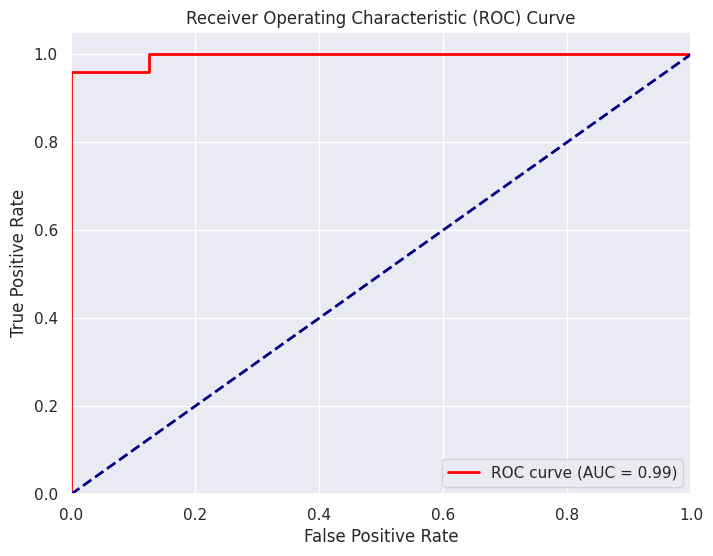

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.04081632653061224
MSE: 0.04081632653061224
RMSE: 0.20203050891044214


# 20 year

In [ ]:
Y20 = test[test['Age(year)'] == 20]
Y20

Age(year) Gender Folder_type Folder_name  \
621         20      F      Normal        Both   
622         20      F      Normal        Both   
623         20      F      Normal        Both   
624         20      F      Normal        Both   
625         20      F      Normal        Both   
626         20      F      Normal        Both   
627         20      F      Normal        Both   
628         20      F      Normal        Both   
629         20      F      Normal        Both   
630         20      F      Normal        Both   
631         20      F      Normal        Both   
632         20      F      Normal        Both   
633         20      F      Normal        Both   
634         20      F      Normal        Both   
635         20      F      Normal        Both   
636         20      F      Normal        Both   
637         20      F      Normal        Both   
638         20      F      Normal        Both   
639         20      F      Normal        Both   
640         20      F      Normal        Both   
641         20      F      Normal          Lt   
642         20      F      Normal          Lt   
643         20      F      Normal          Lt   
644         20      F      Normal          Lt   
645         20      M      Normal        Both   
646         20      M      Normal        Both   
647         20      M      Normal        Both   
648         20      M      Normal        Both   
649         20      M      Normal        Both   
650         20      M      Normal        Both   
651         20      M      Normal        Both   
652         20      M      Normal        Both   
653         20      M      Normal        Both   
654         20      M      Normal        Both   
655         20      M      Normal        Both   
656         20      M      Normal        Both   
657         20      M      Normal        Both   
658         20      M      Normal        Both   
659         20      M      Normal        Both   
660         20      M      Normal        Both   
661         20      M      Normal        Both   
662         20      M      Normal        Both   
663         20      M      Normal          Lt   
664         20      M      Normal          Lt   
665         20      M      Normal          Rt   
666         20      M      Normal          Rt   
667         20      M      Normal          Rt   
930         20      F    Abnormal          Rt   
931         20      M    Abnormal          Lt   

                                             Path_Name      Filename  \
621  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Q249.jpg   
622  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ249.jpg   
623  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Q251.jpg   
624  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ251.jpg   
625  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Q254.jpg   
626  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ254.jpg   
627  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Q264.jpg   
628  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ264.jpg   
629  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Q270.jpg   
630  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ270.jpg   
631  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Q283.jpg   
632  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ283.jpg   
633  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Q293.jpg   
634  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ293.jpg   
635  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Q250.jpg   
636  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ250.jpg   
637  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Q253.jpg   
638  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ253.jpg   
639  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Q288.jpg   
640  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipQ288.jpg   
641  /content/gdrive/MyDrive/Tooth_Shap_GP

## confusion_matrix

In [ ]:
pred_str = np.array(Y20['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y20['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y20['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y20['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 95.91836734693878%
              precision    recall  f1-score   support

      Female       0.96      0.96      0.96        25
        Male       0.96      0.96      0.96        24

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



Text(0.5, 76.24999999999999, 'Predicted label')

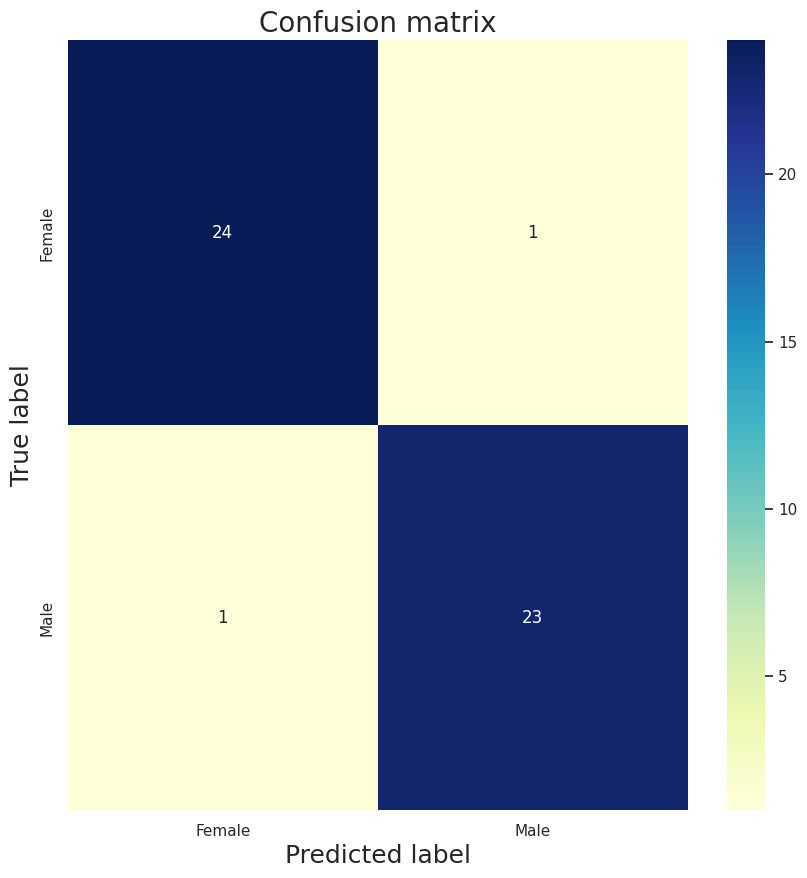

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y20['Gender_predict']

621    1.523914e-02
622    4.384805e-02
623    4.775704e-01
624    7.410667e-03
625    3.645866e-04
626    1.472353e-03
627    3.864125e-04
628    3.623815e-05
629    9.096738e-08
630    2.268401e-06
631    3.107604e-04
632    1.064339e-03
633    2.891557e-06
634    1.012901e-05
635    7.888015e-10
636    3.269737e-11
637    5.624459e-07
638    2.027243e-04
639    1.375441e-05
640    7.600212e-06
641    3.783342e-03
642    8.761238e-03
643    9.130916e-01
644    1.733738e-01
645    9.999704e-01
646    9.999998e-01
647    9.505055e-01
648    9.918992e-01
649    1.000000e+00
650    9.999983e-01
651    9.996995e-01
652    9.998959e-01
653    9.998042e-01
654    9.999845e-01
655    9.982976e-01
656    9.982252e-01
657    9.997092e-01
658    9.995251e-01
659    9.999960e-01
660    9.999980e-01
661    9.998415e-01
662    9.999366e-01
663    6.764512e-01
664    9.898322e-01
665    9.999999e-01
666    9.888143e-01
667    4.507149e-06
930    1.858036e-04
931    9.999989e-01
Name: Gender_predict

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y20['Gender_Class'].tolist()
predicted_probabilities = Y20['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

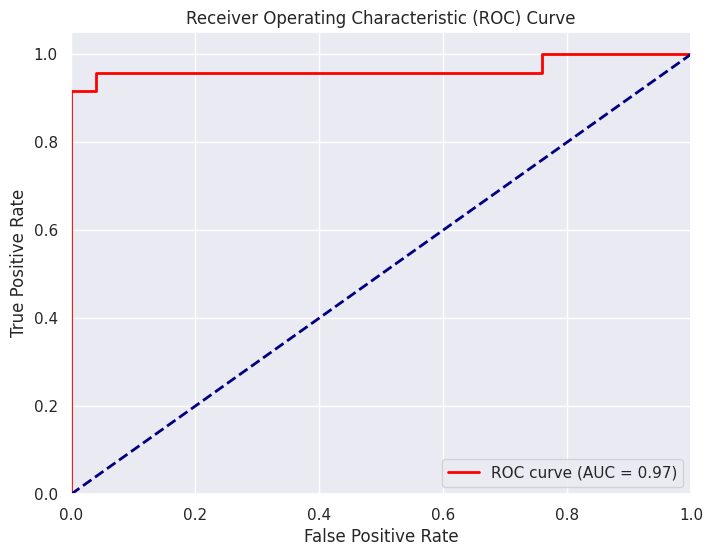

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.04081632653061224
MSE: 0.04081632653061224
RMSE: 0.20203050891044214


# 21 year

In [ ]:
Y21 = test[test['Age(year)'] == 21]
Y21

Age(year) Gender Folder_type Folder_name  \
668         21      F      Normal        Both   
669         21      F      Normal        Both   
670         21      F      Normal        Both   
671         21      F      Normal        Both   
672         21      F      Normal        Both   
673         21      F      Normal        Both   
674         21      F      Normal        Both   
675         21      F      Normal        Both   
676         21      F      Normal        Both   
677         21      F      Normal        Both   
678         21      F      Normal        Both   
679         21      F      Normal        Both   
680         21      F      Normal        Both   
681         21      F      Normal        Both   
682         21      F      Normal        Both   
683         21      F      Normal        Both   
684         21      F      Normal        Both   
685         21      F      Normal        Both   
686         21      F      Normal        Both   
687         21      F      Normal        Both   
688         21      F      Normal        Both   
689         21      F      Normal        Both   
690         21      F      Normal        Both   
691         21      F      Normal        Both   
692         21      F      Normal          Lt   
693         21      M      Normal        Both   
694         21      M      Normal        Both   
695         21      M      Normal        Both   
696         21      M      Normal        Both   
697         21      M      Normal        Both   
698         21      M      Normal        Both   
699         21      M      Normal        Both   
700         21      M      Normal        Both   
701         21      M      Normal        Both   
702         21      M      Normal        Both   
703         21      M      Normal        Both   
704         21      M      Normal        Both   
705         21      M      Normal        Both   
706         21      M      Normal        Both   
707         21      M      Normal          Lt   
708         21      M      Normal          Lt   
709         21      M      Normal          Lt   
710         21      M      Normal          Lt   
711         21      M      Normal          Lt   
712         21      M      Normal          Lt   
713         21      M      Normal          Rt   
714         21      M      Normal          Rt   
715         21      M      Normal          Rt   
716         21      M      Normal          Rt   
932         21      M    Abnormal          Lt   

                                             Path_Name      Filename  \
668  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      N150.jpg   
669  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN150.jpg   
670  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      N158.jpg   
671  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN158.jpg   
672  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      N164.jpg   
673  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN164.jpg   
674  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      N167.jpg   
675  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN167.jpg   
676  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      N168.jpg   
677  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN168.jpg   
678  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      N178.jpg   
679  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN178.jpg   
680  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      N182.jpg   
681  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN182.jpg   
682  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      N184.jpg   
683  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN184.jpg   
684  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      N149.jpg   
685  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN149.jpg   
686  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      N160.jpg   
687  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipN160.

## confusion_matrix

In [ ]:
pred_str = np.array(Y21['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y21['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y21['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y21['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 92.0%
              precision    recall  f1-score   support

      Female       0.96      0.88      0.92        25
        Male       0.89      0.96      0.92        25

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



Text(0.5, 76.24999999999999, 'Predicted label')

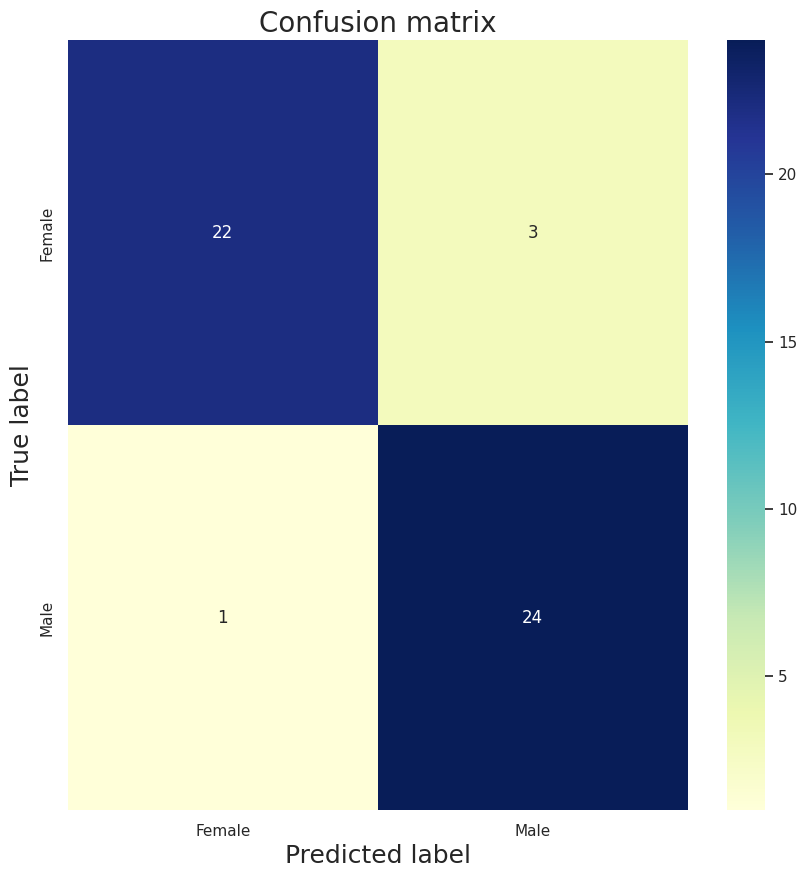

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y21['Gender_predict']

668    2.575229e-02
669    2.763099e-02
670    8.205249e-08
671    3.372890e-09
672    2.005231e-04
673    2.528459e-04
674    2.734499e-04
675    4.624116e-05
676    1.311816e-01
677    8.089091e-01
678    1.312514e-01
679    8.948905e-01
680    6.388189e-07
681    1.468000e-07
682    3.161549e-04
683    2.133063e-05
684    6.945423e-01
685    3.051637e-03
686    3.970973e-07
687    1.285625e-05
688    1.087320e-03
689    1.582897e-02
690    7.228205e-07
691    9.278061e-04
692    2.152717e-06
693    8.072293e-01
694    5.303385e-01
695    9.988778e-01
696    9.999923e-01
697    9.999999e-01
698    9.999977e-01
699    9.999937e-01
700    9.999917e-01
701    9.999993e-01
702    9.998467e-01
703    9.999824e-01
704    9.996390e-01
705    9.999992e-01
706    9.999294e-01
707    2.522510e-01
708    9.965240e-01
709    9.999977e-01
710    9.999930e-01
711    9.999951e-01
712    9.999955e-01
713    9.999999e-01
714    1.000000e+00
715    9.999919e-01
716    9.942154e-01
932    9.999999e-01


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y21['Gender_Class'].tolist()
predicted_probabilities = Y21['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

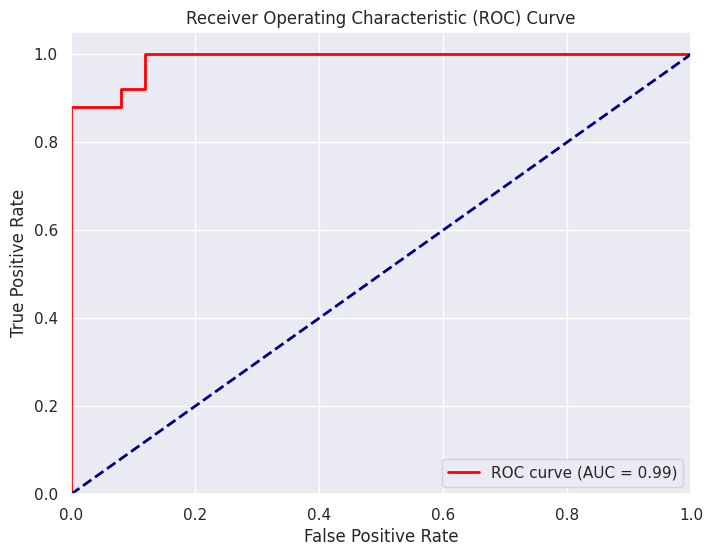

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.08
MSE: 0.08
RMSE: 0.282842712474619


# 22 year

In [ ]:
Y22 = test[test['Age(year)'] == 22]
Y22

Age(year) Gender Folder_type Folder_name  \
717         22      F      Normal        Both   
718         22      F      Normal        Both   
719         22      F      Normal        Both   
720         22      F      Normal        Both   
721         22      F      Normal        Both   
722         22      F      Normal        Both   
723         22      F      Normal        Both   
724         22      F      Normal        Both   
725         22      F      Normal        Both   
726         22      F      Normal        Both   
727         22      F      Normal          Lt   
728         22      F      Normal          Lt   
729         22      F      Normal          Lt   
730         22      F      Normal          Lt   
731         22      F      Normal          Lt   
732         22      F      Normal          Lt   
733         22      F      Normal          Lt   
734         22      F      Normal          Lt   
735         22      F      Normal          Lt   
736         22      F      Normal          Lt   
737         22      F      Normal          Lt   
738         22      F      Normal          Lt   
739         22      F      Normal          Rt   
740         22      F      Normal          Rt   
741         22      M      Normal        Both   
742         22      M      Normal        Both   
743         22      M      Normal        Both   
744         22      M      Normal        Both   
745         22      M      Normal        Both   
746         22      M      Normal        Both   
747         22      M      Normal        Both   
748         22      M      Normal        Both   
749         22      M      Normal        Both   
750         22      M      Normal        Both   
751         22      M      Normal        Both   
752         22      M      Normal        Both   
753         22      M      Normal        Both   
754         22      M      Normal        Both   
755         22      M      Normal        Both   
756         22      M      Normal        Both   
757         22      M      Normal        Both   
758         22      M      Normal        Both   
759         22      M      Normal        Both   
760         22      M      Normal        Both   
761         22      M      Normal        Both   
762         22      M      Normal        Both   
763         22      M      Normal        Both   
764         22      M      Normal        Both   
765         22      M      Normal          Rt   
933         22      F    Abnormal          Rt   

                                             Path_Name      Filename  \
717  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U156.jpg   
718  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU156.jpg   
719  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U202.jpg   
720  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU202.jpg   
721  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U297.jpg   
722  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU297.jpg   
723  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U299.jpg   
724  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU299.jpg   
725  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      U298.jpg   
726  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU298.jpg   
727  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipU62.jpg   
728  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU171.jpg   
729  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU184.jpg   
730  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU197.jpg   
731  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU230.jpg   
732  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU238.jpg   
733  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU247.jpg   
734  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU250.jpg   
735  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU269.jpg   
736  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipU278.

## confusion_matrix

In [ ]:
pred_str = np.array(Y22['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y22['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y22['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y22['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 94.0%
              precision    recall  f1-score   support

      Female       0.96      0.92      0.94        25
        Male       0.92      0.96      0.94        25

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



Text(0.5, 76.24999999999999, 'Predicted label')

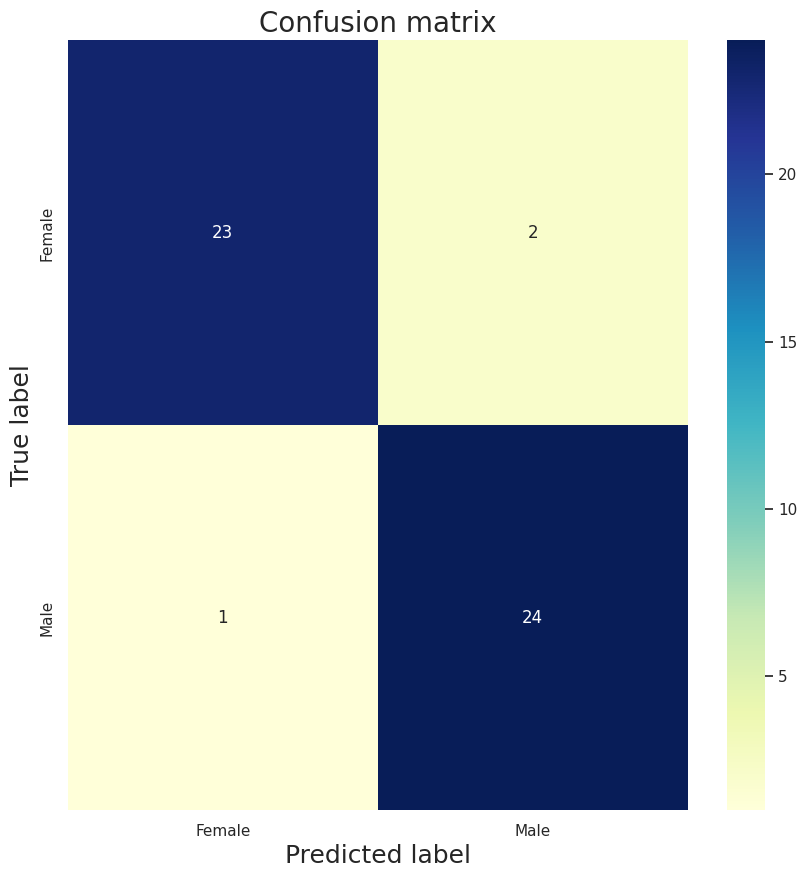

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y22['Gender_predict']

717    8.893683e-07
718    3.245182e-08
719    4.921237e-07
720    5.458368e-07
721    1.527625e-03
722    4.269805e-01
723    1.559918e-05
724    8.991482e-05
725    6.746265e-01
726    8.808223e-02
727    3.085637e-06
728    9.266704e-01
729    3.407773e-06
730    7.125092e-07
731    3.297054e-04
732    3.712762e-04
733    3.607565e-05
734    8.859427e-02
735    2.380811e-04
736    3.440835e-05
737    1.771885e-03
738    1.805362e-01
739    4.559298e-05
740    1.319312e-01
741    9.995966e-01
742    9.994732e-01
743    9.957989e-01
744    9.951107e-01
745    9.999984e-01
746    9.999981e-01
747    9.999270e-01
748    9.999990e-01
749    9.999902e-01
750    9.999998e-01
751    9.999985e-01
752    9.999998e-01
753    9.999999e-01
754    1.000000e+00
755    2.240267e-01
756    9.567884e-01
757    9.997472e-01
758    9.999991e-01
759    9.939868e-01
760    9.999990e-01
761    9.996651e-01
762    9.932986e-01
763    9.999998e-01
764    9.999803e-01
765    9.999980e-01
933    1.581376e-03


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y22['Gender_Class'].tolist()
predicted_probabilities = Y22['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

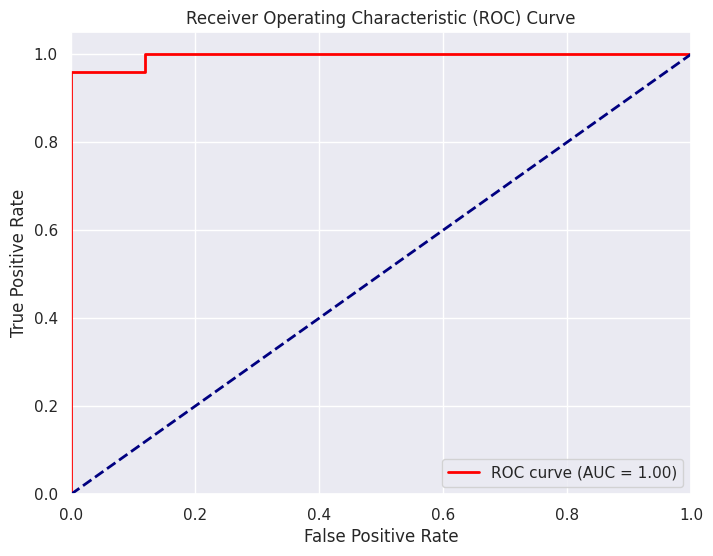

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.06
MSE: 0.06
RMSE: 0.2449489742783178


# 23 year

In [ ]:
Y23 = test[test['Age(year)'] == 23]
Y23

Age(year) Gender Folder_type Folder_name  \
766         23      F      Normal        Both   
767         23      F      Normal        Both   
768         23      F      Normal        Both   
769         23      F      Normal        Both   
770         23      F      Normal        Both   
771         23      F      Normal        Both   
772         23      F      Normal        Both   
773         23      F      Normal        Both   
774         23      F      Normal        Both   
775         23      F      Normal        Both   
776         23      F      Normal        Both   
777         23      F      Normal        Both   
778         23      F      Normal        Both   
779         23      F      Normal        Both   
780         23      F      Normal          Lt   
781         23      F      Normal          Lt   
782         23      F      Normal          Lt   
783         23      F      Normal          Lt   
784         23      F      Normal          Lt   
785         23      F      Normal          Lt   
786         23      F      Normal          Lt   
787         23      F      Normal          Lt   
788         23      F      Normal          Lt   
789         23      F      Normal          Lt   
790         23      F      Normal          Lt   
791         23      M      Normal        Both   
792         23      M      Normal        Both   
793         23      M      Normal        Both   
794         23      M      Normal        Both   
795         23      M      Normal          Lt   
796         23      M      Normal          Lt   
797         23      M      Normal          Lt   
798         23      M      Normal          Lt   
799         23      M      Normal          Lt   
800         23      M      Normal          Lt   
801         23      M      Normal          Lt   
802         23      M      Normal          Rt   
803         23      M      Normal          Rt   
804         23      M      Normal          Rt   
805         23      M      Normal          Rt   
806         23      M      Normal          Rt   
807         23      M      Normal          Rt   
808         23      M      Normal          Rt   
809         23      M      Normal          Rt   
810         23      M      Normal          Rt   
811         23      M      Normal          Rt   
812         23      M      Normal          Rt   
813         23      M      Normal          Rt   
814         23      M      Normal          Rt   
934         23      M    Abnormal          Rt   

                                             Path_Name      Filename  \
766  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      E244.jpg   
767  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE244.jpg   
768  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      E280.jpg   
769  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE280.jpg   
770  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      E282.jpg   
771  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE282.jpg   
772  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      E283.jpg   
773  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE283.jpg   
774  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      E284.jpg   
775  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE284.jpg   
776  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      E287.jpg   
777  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE287.jpg   
778  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      E297.jpg   
779  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE297.jpg   
780  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE109.jpg   
781  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE122.jpg   
782  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE123.jpg   
783  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE140.jpg   
784  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE148.jpg   
785  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipE178.

## confusion_matrix

In [ ]:
pred_str = np.array(Y23['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y23['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y23['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y23['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 98.0%
              precision    recall  f1-score   support

      Female       1.00      0.96      0.98        25
        Male       0.96      1.00      0.98        25

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Text(0.5, 76.24999999999999, 'Predicted label')

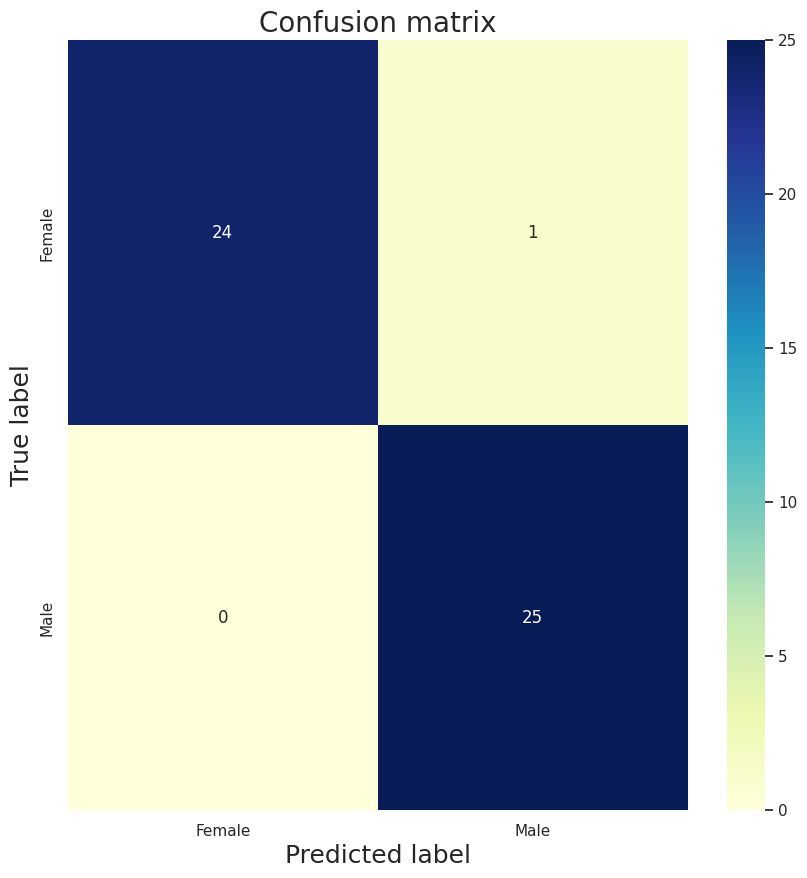

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y23['Gender_predict']

766    1.164696e-03
767    8.526320e-06
768    5.426713e-08
769    3.515403e-08
770    6.476492e-07
771    3.930511e-07
772    6.199703e-06
773    1.564445e-07
774    3.299757e-09
775    9.005689e-08
776    1.943117e-07
777    4.939900e-06
778    1.435065e-06
779    1.038349e-02
780    6.428263e-05
781    9.914847e-01
782    6.889102e-06
783    4.316196e-04
784    3.442771e-01
785    1.856042e-02
786    5.718372e-05
787    9.710117e-06
788    8.337823e-04
789    9.090066e-07
790    7.102678e-05
791    9.999989e-01
792    9.999996e-01
793    9.942889e-01
794    9.999893e-01
795    9.999999e-01
796    9.999946e-01
797    9.998432e-01
798    9.999955e-01
799    9.999994e-01
800    9.999998e-01
801    9.999996e-01
802    9.999958e-01
803    9.998593e-01
804    1.000000e+00
805    9.999995e-01
806    9.999973e-01
807    9.996715e-01
808    9.420416e-01
809    9.999580e-01
810    9.999655e-01
811    9.999999e-01
812    9.999985e-01
813    9.999998e-01
814    1.000000e+00
934    1.000000e+00


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y23['Gender_Class'].tolist()
predicted_probabilities = Y23['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

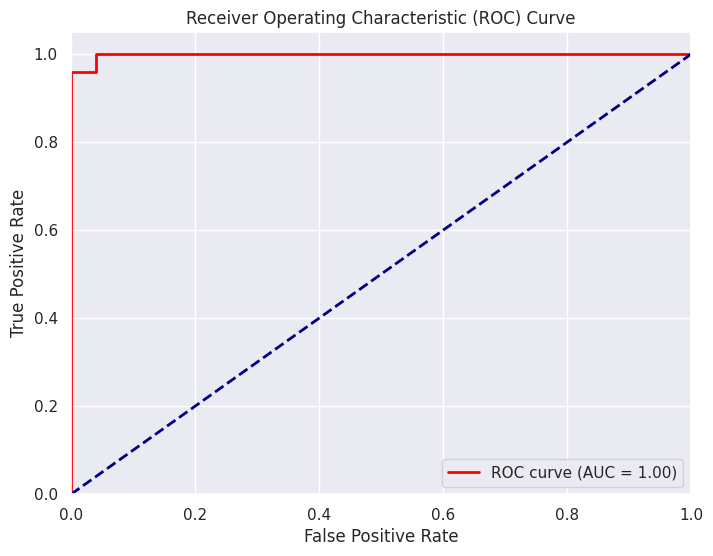

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.02
MSE: 0.02
RMSE: 0.1414213562373095


# 24 year

In [ ]:
Y24 = test[test['Age(year)'] == 24]
Y24

Age(year) Gender Folder_type Folder_name  \
815         24      F      Normal        Both   
816         24      F      Normal        Both   
817         24      F      Normal        Both   
818         24      F      Normal        Both   
819         24      F      Normal        Both   
820         24      F      Normal        Both   
821         24      F      Normal        Both   
822         24      F      Normal        Both   
823         24      F      Normal        Both   
824         24      F      Normal        Both   
825         24      F      Normal        Both   
826         24      F      Normal        Both   
827         24      F      Normal        Both   
828         24      F      Normal        Both   
829         24      F      Normal        Both   
830         24      F      Normal        Both   
831         24      F      Normal        Both   
832         24      F      Normal        Both   
833         24      F      Normal        Both   
834         24      F      Normal        Both   
835         24      F      Normal        Both   
836         24      F      Normal        Both   
837         24      F      Normal        Both   
838         24      F      Normal        Both   
839         24      F      Normal        Both   
840         24      F      Normal        Both   
841         24      M      Normal        Both   
842         24      M      Normal        Both   
843         24      M      Normal        Both   
844         24      M      Normal        Both   
845         24      M      Normal        Both   
846         24      M      Normal        Both   
847         24      M      Normal        Both   
848         24      M      Normal        Both   
849         24      M      Normal        Both   
850         24      M      Normal        Both   
851         24      M      Normal        Both   
852         24      M      Normal        Both   
853         24      M      Normal          Lt   
854         24      M      Normal          Lt   
855         24      M      Normal          Lt   
856         24      M      Normal          Lt   
857         24      M      Normal          Lt   
858         24      M      Normal          Lt   
859         24      M      Normal          Lt   
860         24      M      Normal          Rt   
861         24      M      Normal          Rt   
862         24      M      Normal          Rt   
863         24      M      Normal          Rt   
935         24      M    Abnormal          Rt   
936         24      M    Abnormal          Rt   

                                             Path_Name      Filename  \
815  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Z195.jpg   
816  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipZ195.jpg   
817  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Z199.jpg   
818  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipZ199.jpg   
819  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Z215.jpg   
820  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipZ215.jpg   
821  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Z216.jpg   
822  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipZ216.jpg   
823  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Z220.jpg   
824  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipZ220.jpg   
825  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Z227.jpg   
826  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipZ227.jpg   
827  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Z230.jpg   
828  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipZ230.jpg   
829  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Z232.jpg   
830  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipZ232.jpg   
831  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Z235.jpg   
832  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipZ235.jpg   
833  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      Z236.jpg   
834  /content/gd

## confusion_matrix

In [ ]:
pred_str = np.array(Y24['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y24['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y24['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y24['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 94.11764705882354%
              precision    recall  f1-score   support

      Female       0.96      0.92      0.94        26
        Male       0.92      0.96      0.94        25

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51



Text(0.5, 76.24999999999999, 'Predicted label')

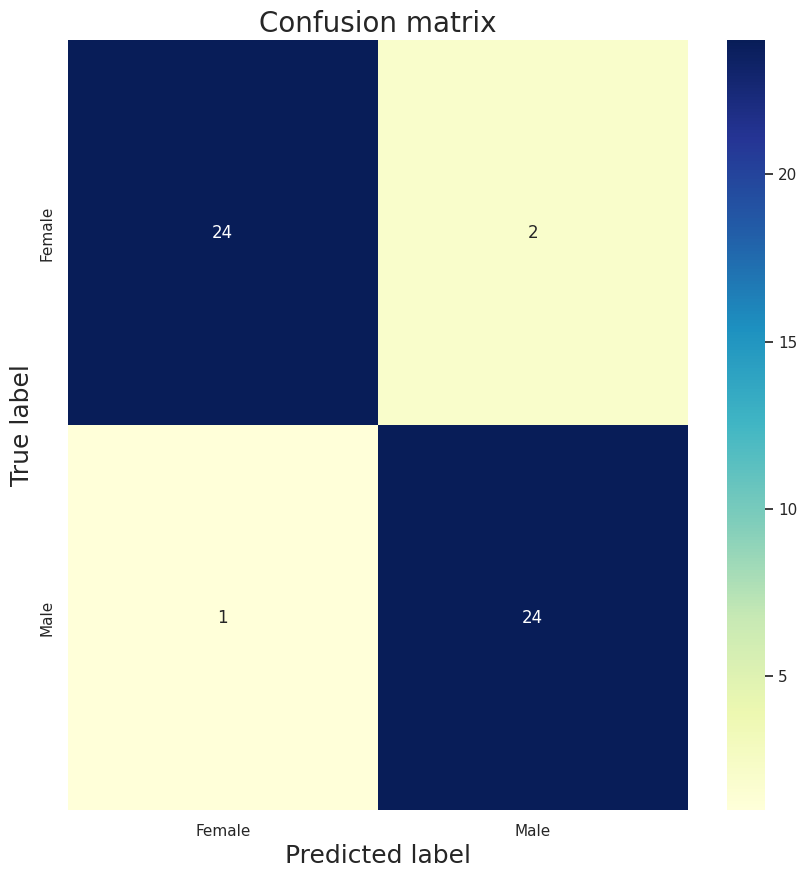

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y24['Gender_predict']

815    3.690801e-03
816    3.032936e-03
817    2.398142e-06
818    2.647664e-09
819    2.480551e-06
820    1.400687e-06
821    1.273688e-01
822    9.992924e-01
823    1.060543e-07
824    2.686715e-08
825    1.142043e-05
826    3.259295e-07
827    5.346017e-06
828    2.686697e-06
829    6.647424e-05
830    4.950557e-04
831    5.642366e-03
832    4.960822e-05
833    1.349386e-02
834    6.781917e-01
835    7.740071e-03
836    2.002017e-05
837    2.683038e-06
838    6.058331e-05
839    5.490665e-05
840    7.503218e-05
841    9.999999e-01
842    9.999972e-01
843    9.999983e-01
844    9.998209e-01
845    9.999598e-01
846    9.999602e-01
847    9.999981e-01
848    9.999954e-01
849    9.999999e-01
850    1.000000e+00
851    9.991971e-01
852    9.999996e-01
853    9.998476e-01
854    3.066799e-03
855    9.999845e-01
856    9.999636e-01
857    9.999996e-01
858    9.915483e-01
859    9.999996e-01
860    9.999965e-01
861    9.958592e-01
862    9.998910e-01
863    1.000000e+00
935    9.999986e-01


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y24['Gender_Class'].tolist()
predicted_probabilities = Y24['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

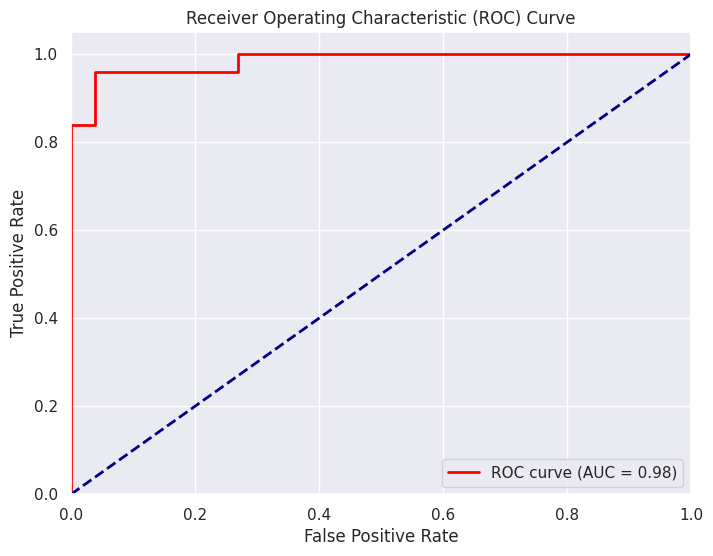

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.058823529411764705
MSE: 0.058823529411764705
RMSE: 0.24253562503633297


# 25 year

In [ ]:
Y25 = test[test['Age(year)'] == 25]
Y25

Age(year) Gender Folder_type Folder_name  \
864         25      F      Normal        Both   
865         25      F      Normal        Both   
866         25      F      Normal        Both   
867         25      F      Normal        Both   
868         25      F      Normal        Both   
869         25      F      Normal        Both   
870         25      F      Normal        Both   
871         25      F      Normal        Both   
872         25      F      Normal        Both   
873         25      F      Normal        Both   
874         25      F      Normal        Both   
875         25      F      Normal        Both   
876         25      F      Normal        Both   
877         25      F      Normal        Both   
878         25      F      Normal          Lt   
879         25      F      Normal          Lt   
880         25      F      Normal          Lt   
881         25      F      Normal          Lt   
882         25      F      Normal          Lt   
883         25      M      Normal        Both   
884         25      M      Normal        Both   
885         25      M      Normal        Both   
886         25      M      Normal        Both   
887         25      M      Normal        Both   
888         25      M      Normal        Both   
889         25      M      Normal        Both   
890         25      M      Normal        Both   
891         25      M      Normal        Both   
892         25      M      Normal        Both   
893         25      M      Normal        Both   
894         25      M      Normal        Both   
895         25      M      Normal        Both   
896         25      M      Normal        Both   
897         25      M      Normal        Both   
898         25      M      Normal        Both   
899         25      M      Normal        Both   
900         25      M      Normal        Both   
901         25      M      Normal        Both   
902         25      M      Normal        Both   
903         25      M      Normal        Both   
904         25      M      Normal        Both   
905         25      M      Normal        Both   
906         25      M      Normal        Both   
907         25      M      Normal          Rt   
937         25      F    Abnormal          Rt   
938         25      F    Abnormal          Rt   
939         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name      Filename  \
864  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      J190.jpg   
865  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipJ190.jpg   
866  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      J258.jpg   
867  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipJ258.jpg   
868  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      J265.jpg   
869  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipJ265.jpg   
870  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      J274.jpg   
871  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipJ274.jpg   
872  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      J275.jpg   
873  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipJ275.jpg   
874  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      J276.jpg   
875  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipJ276.jpg   
876  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      J260.jpg   
877  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipJ260.jpg   
878  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipJ58.jpg   
879  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipJ67.jpg   
880  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipJ71.jpg   
881  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipJ89.jpg   
882  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipJ180.jpg   
883  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      J447.

## confusion_matrix

In [ ]:
pred_str = np.array(Y25['Gender_predict_str'].tolist()) #ทำนาย
act_str = np.array(Y25['Gender_Predict'].tolist()) # จริง

pred_int = np.array(Y25['Gender_predict_int'].tolist())  #แทำนาย
act_int = np.array(Y25['Gender_Class'].tolist()) #ค่าจริง

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_str, pred_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_str, pred_str))#performance

classifier accuracy = 80.0%
              precision    recall  f1-score   support

      Female       0.94      0.64      0.76        25
        Male       0.73      0.96      0.83        25

    accuracy                           0.80        50
   macro avg       0.83      0.80      0.79        50
weighted avg       0.83      0.80      0.79        50



Text(0.5, 76.24999999999999, 'Predicted label')

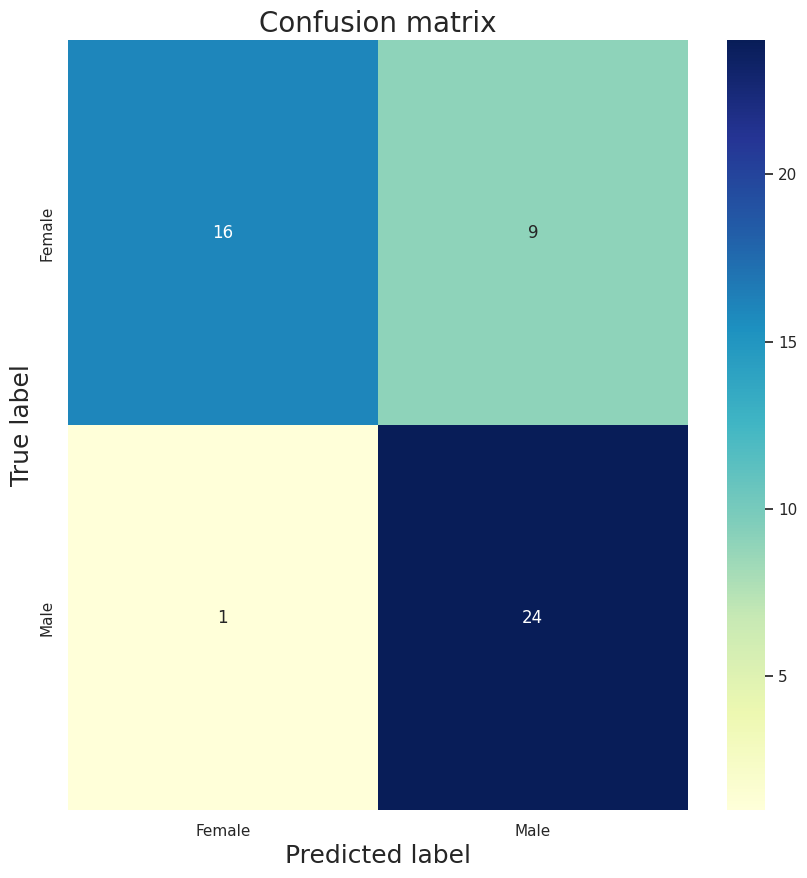

In [ ]:
#create CF
data = {'Actual': act_str,'Predicted' : pred_str}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_str, pred_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## ROC

In [ ]:
Y25['Gender_predict']

864    1.602221e-07
865    3.316689e-07
866    9.992177e-01
867    9.999970e-01
868    9.647718e-01
869    9.525566e-01
870    1.043185e-03
871    3.920766e-02
872    1.580112e-02
873    1.442823e-03
874    9.999998e-01
875    9.999999e-01
876    9.999706e-01
877    9.999955e-01
878    1.555989e-03
879    2.173321e-08
880    1.000000e+00
881    3.272582e-05
882    3.272582e-05
883    9.999973e-01
884    9.999994e-01
885    9.999998e-01
886    9.999996e-01
887    9.999999e-01
888    9.999999e-01
889    9.904289e-01
890    9.953638e-01
891    9.999999e-01
892    9.999996e-01
893    2.220428e-01
894    9.738547e-01
895    9.999990e-01
896    9.999992e-01
897    9.999995e-01
898    9.999695e-01
899    9.999998e-01
900    9.999999e-01
901    9.998042e-01
902    9.999998e-01
903    9.999987e-01
904    9.999983e-01
905    9.994724e-01
906    8.337222e-01
907    9.999987e-01
937    9.307751e-06
938    1.800772e-05
939    1.193717e-01
940    1.212690e-03
941    3.044486e-09
942    9.307751e-06


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
# Example: Replace these with your actual labels and predicted probabilities
actual_labels = Y25['Gender_Class'].tolist()
predicted_probabilities = Y25['Gender_predict'].tolist()

In [ ]:
fpr, tpr, thresholds = roc_curve(actual_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

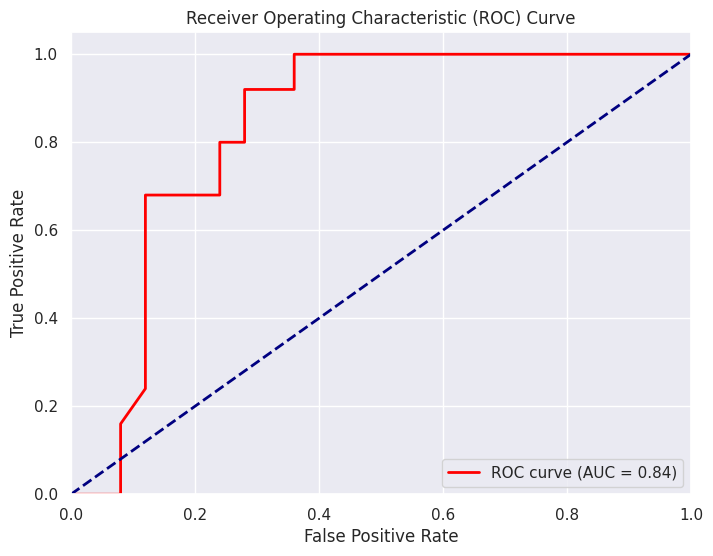

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## MSE and MAE

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_int,pred_int)
mse = mean_squared_error(act_int,pred_int)
rmse = mean_squared_error(act_int,pred_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.2
MSE: 0.2
RMSE: 0.4472135954999579


# Plot Accuracy graph (All)

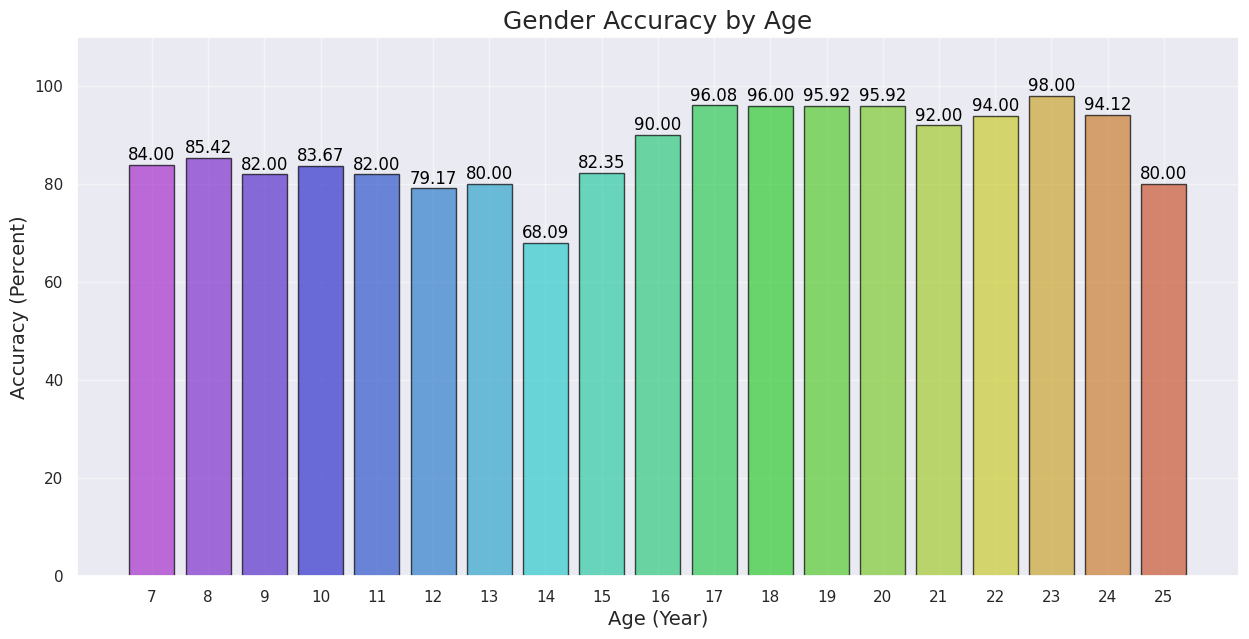

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
ages = ['7', '8', '9', '10', '11', '12', '13', '14', '15',' 16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
accuracy = [84.00, 85.42, 82.00, 83.67, 82.00, 79.17, 80.00, 68.09, 82.35, 90.00, 96.08, 96.00, 95.92, 95.92, 92.00, 94.00, 98.00, 94.12, 80.00]
colors = [ '#a633cc','#8033cc','#5933cc', '#3333cc', '#3359cc', '#3380cc', '#33a6cc', '#33cccc', '#33cca6', '#33cc80', '#33cc59','#33cc33', '#59cc33', '#80cc33', '#a6cc33', '#cccc33', '#cca633', '#cc8033','#cc5933']

# สร้างกราฟแท่ง
bars = plt.bar(ages, accuracy, width = 0.8, color = colors, alpha=0.7, edgecolor='black', linewidth=1)


plt.xticks(range(len(ages)), ages)
plt.xlabel('Age (Year)', fontsize=14)
plt.ylabel('Accuracy (Percent)', fontsize=14)
plt.title('Gender Accuracy by Age', fontsize=18)
plt.grid(True, alpha=0.5)
plt.ylim(0, 110)  # กำหนดช่วงค่าบนแกน y

# Add text labels for accuracy above each bar
for bar, accuracy in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 1 - 0.4, accuracy + 1, f'{accuracy:.2f}', ha='center', color='black',fontsize=12)

# แสดงกราฟ
plt.show();


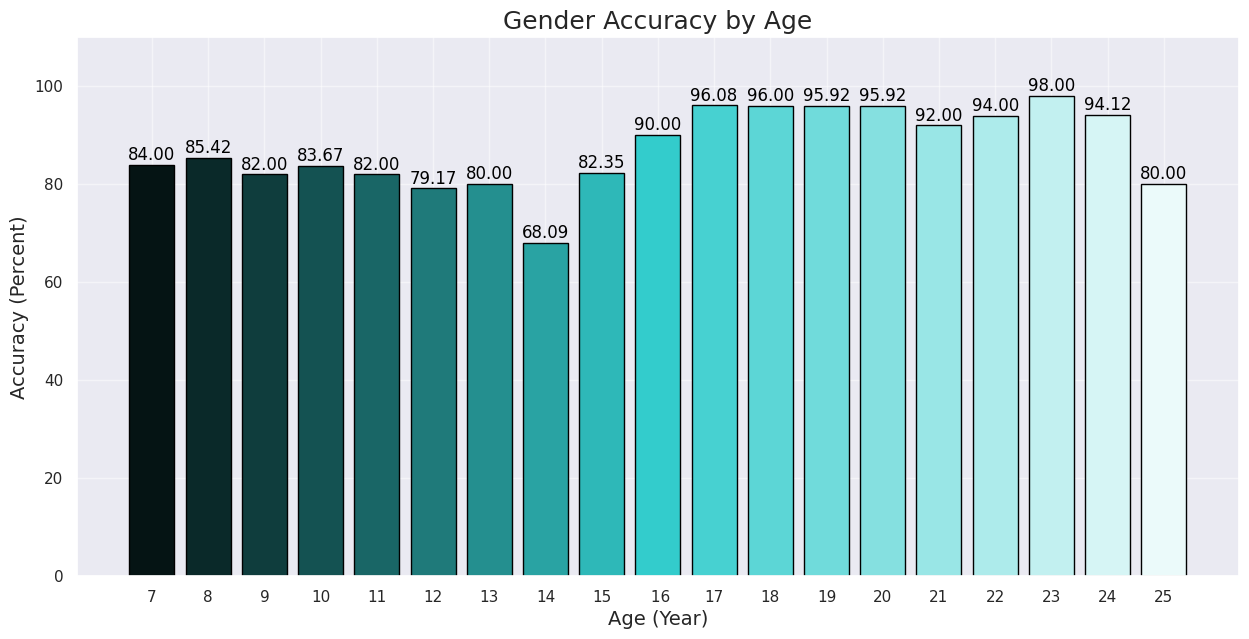

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
ages = ['7', '8', '9', '10', '11', '12', '13', '14', '15',' 16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
accuracy = [84.00, 85.42, 82.00, 83.67, 82.00, 79.17, 80.00, 68.09, 82.35, 90.00, 96.08, 96.00, 95.92, 95.92, 92.00, 94.00, 98.00, 94.12, 80.00]
colors = [ '#051414','#0a2929','#0f3d3d', '#145252', '#196666', '#1f7a7a', '#248f8f', '#29a3a3', '#2eb8b8', '#33cccc', '#47d1d1','#5cd6d6', '#70dbdb', '#85e0e0', '#99e6e6', '#adebeb', '#c2f0f0', '#d6f5f5','#ebfafa']

# สร้างกราฟแท่ง
bars = plt.bar(ages, accuracy, width = 0.8, color = colors, alpha=1, edgecolor='black', linewidth=1)


plt.xticks(range(len(ages)), ages)
plt.xlabel('Age (Year)', fontsize=14)
plt.ylabel('Accuracy (Percent)', fontsize=14)
plt.title('Gender Accuracy by Age', fontsize=18)
plt.grid(True, alpha=0.5)
plt.ylim(0, 110)  # กำหนดช่วงค่าบนแกน y

# Add text labels for accuracy above each bar
for bar, accuracy in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 1 - 0.4, accuracy + 1, f'{accuracy:.2f}', ha='center', color='black',fontsize=12)

# แสดงกราฟ
plt.show();


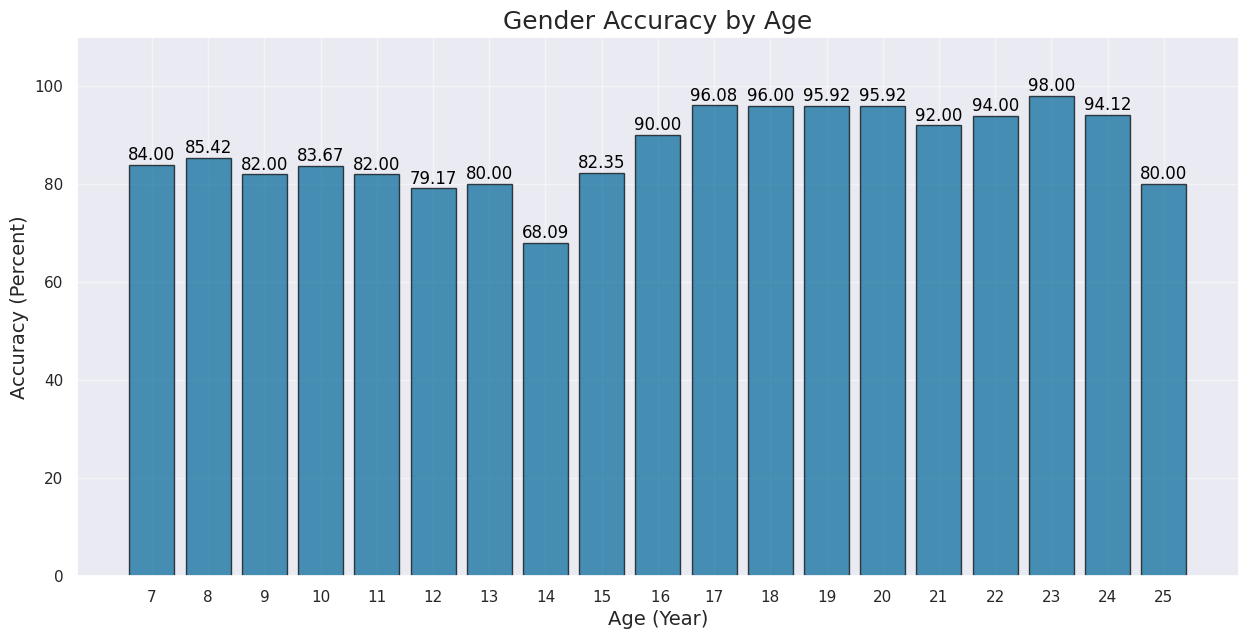

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
ages = ['7', '8', '9', '10', '11', '12', '13', '14', '15',' 16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
accuracy = [84.00, 85.42, 82.00, 83.67, 82.00, 79.17, 80.00, 68.09, 82.35, 90.00, 96.08, 96.00, 95.92, 95.92, 92.00, 94.00, 98.00, 94.12, 80.00]
#colors = [ '#051414','#0a2929','#0f3d3d', '#145252', '#196666', '#1f7a7a', '#248f8f', '#29a3a3', '#2eb8b8', '#33cccc', '#47d1d1','#5cd6d6', '#70dbdb', '#85e0e0', '#99e6e6', '#adebeb', '#c2f0f0', '#d6f5f5','#ebfafa']

# สร้างกราฟแท่ง
bars = plt.bar(ages, accuracy, width = 0.8, color = '#006699', alpha=0.7, edgecolor='black', linewidth=1)


plt.xticks(range(len(ages)), ages)
plt.xlabel('Age (Year)', fontsize=14)
plt.ylabel('Accuracy (Percent)', fontsize=14)
plt.title('Gender Accuracy by Age', fontsize=18)
plt.grid(True, alpha=0.5)
plt.ylim(0, 110)  # กำหนดช่วงค่าบนแกน y

# Add text labels for accuracy above each bar
for bar, accuracy in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 1 - 0.4, accuracy + 1, f'{accuracy:.2f}', ha='center', color='black',fontsize=12)

# แสดงกราฟ
plt.show();

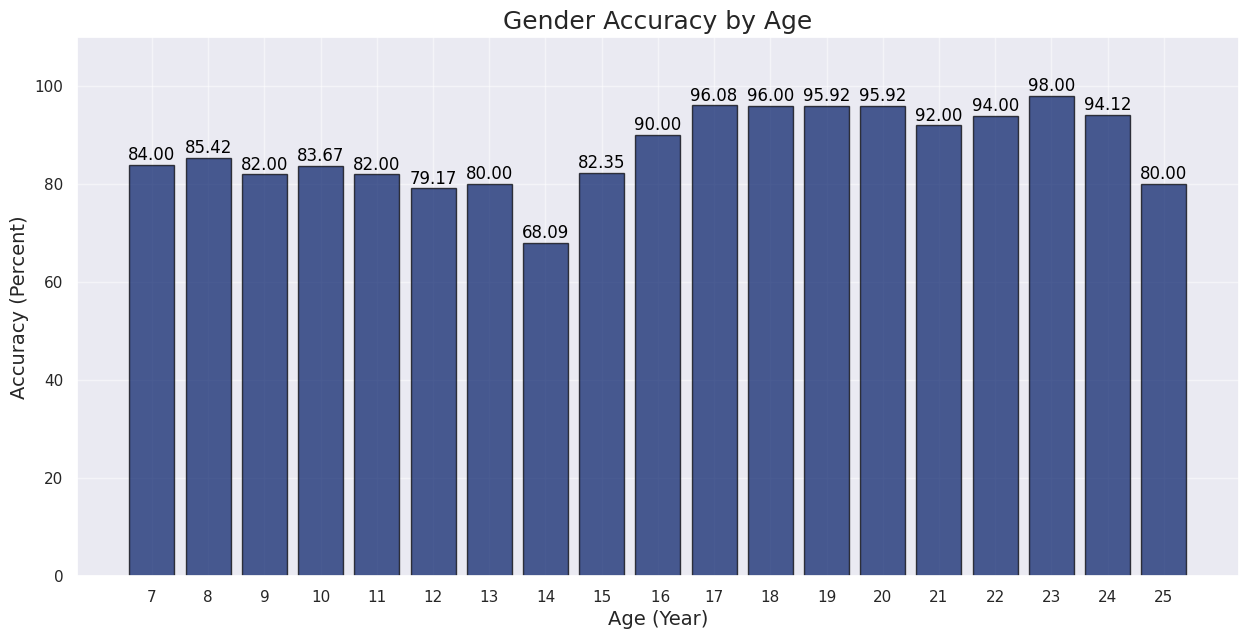

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
ages = ['7', '8', '9', '10', '11', '12', '13', '14', '15',' 16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
accuracy = [84.00, 85.42, 82.00, 83.67, 82.00, 79.17, 80.00, 68.09, 82.35, 90.00, 96.08, 96.00, 95.92, 95.92, 92.00, 94.00, 98.00, 94.12, 80.00]
#colors = [ '#051414','#0a2929','#0f3d3d', '#145252', '#196666', '#1f7a7a', '#248f8f', '#29a3a3', '#2eb8b8', '#33cccc', '#47d1d1','#5cd6d6', '#70dbdb', '#85e0e0', '#99e6e6', '#adebeb', '#c2f0f0', '#d6f5f5','#ebfafa']

# สร้างกราฟแท่ง
bars = plt.bar(ages, accuracy, width = 0.8, color = '#001a66', alpha=0.7, edgecolor='black', linewidth=1)


plt.xticks(range(len(ages)), ages)
plt.xlabel('Age (Year)', fontsize=14)
plt.ylabel('Accuracy (Percent)',fontsize=14)
plt.title('Gender Accuracy by Age', fontsize=18)
plt.grid(True, alpha=0.5)
plt.ylim(0, 110)  # กำหนดช่วงค่าบนแกน y

# Add text labels for accuracy above each bar
for bar, accuracy in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 1 - 0.4, accuracy + 1, f'{accuracy:.2f}', ha='center', color='black',fontsize=12)

# แสดงกราฟ
plt.show();

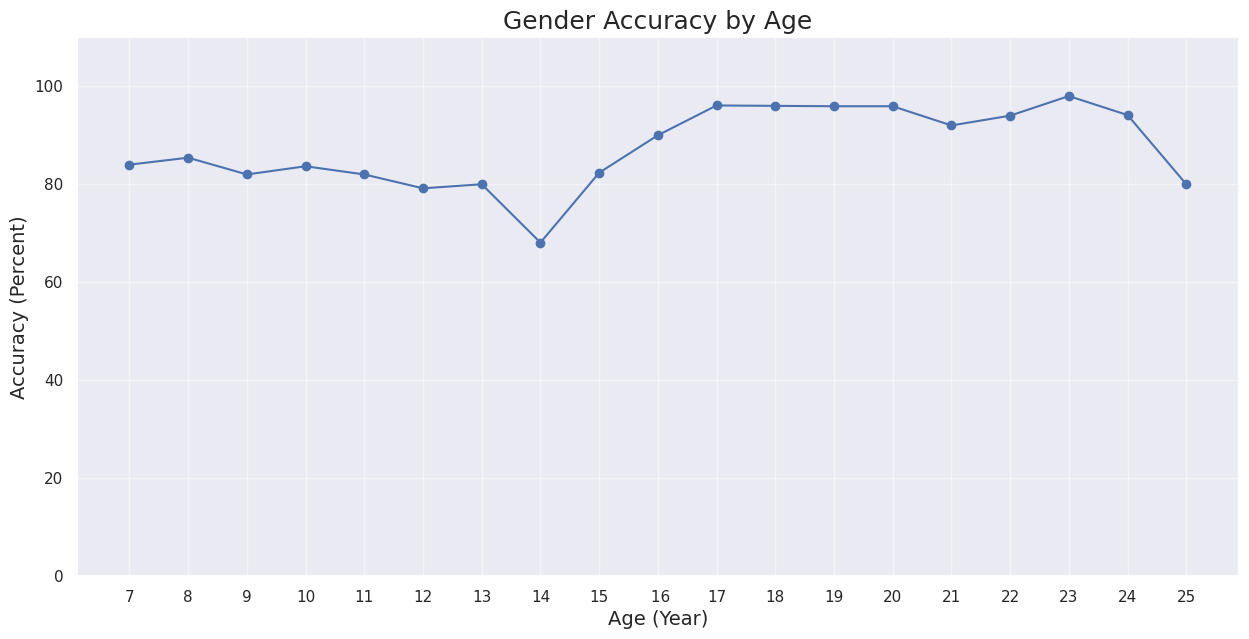

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
ages = ['7', '8', '9', '10', '11', '12', '13', '14', '15',' 16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
accuracy = [84.00, 85.42, 82.00, 83.67, 82.00, 79.17, 80.00, 68.09, 82.35, 90.00, 96.08, 96.00, 95.92, 95.92, 92.00, 94.00, 98.00, 94.12, 80.00]
#colors = [ '#051414','#0a2929','#0f3d3d', '#145252', '#196666', '#1f7a7a', '#248f8f', '#29a3a3', '#2eb8b8', '#33cccc', '#47d1d1','#5cd6d6', '#70dbdb', '#85e0e0', '#99e6e6', '#adebeb', '#c2f0f0', '#d6f5f5','#ebfafa']

# สร้างกราฟแท่ง
# plt.subplot()
# bars = plt.bar(ages, accuracy, width = 0.8, color = '#006699', alpha=0.7, edgecolor='black', linewidth=1)
# plt.subplot()
plt.plot(ages, accuracy,'o-')

plt.xticks(range(len(ages)), ages)
plt.xlabel('Age (Year)', fontsize=14)
plt.ylabel('Accuracy (Percent)',fontsize=14)
plt.title('Gender Accuracy by Age', fontsize=18)
plt.grid(True, alpha=0.5)
plt.ylim(0, 110)  # กำหนดช่วงค่าบนแกน y

# Add text labels for accuracy above each bar
# for bar, accuracy in zip(bars, accuracy):
#     plt.text(bar.get_x() + bar.get_width() / 1 - 0.4, accuracy + 2, f'{accuracy:.2f}', ha='center', color='black',fontsize=12)

# แสดงกราฟ
plt.show();

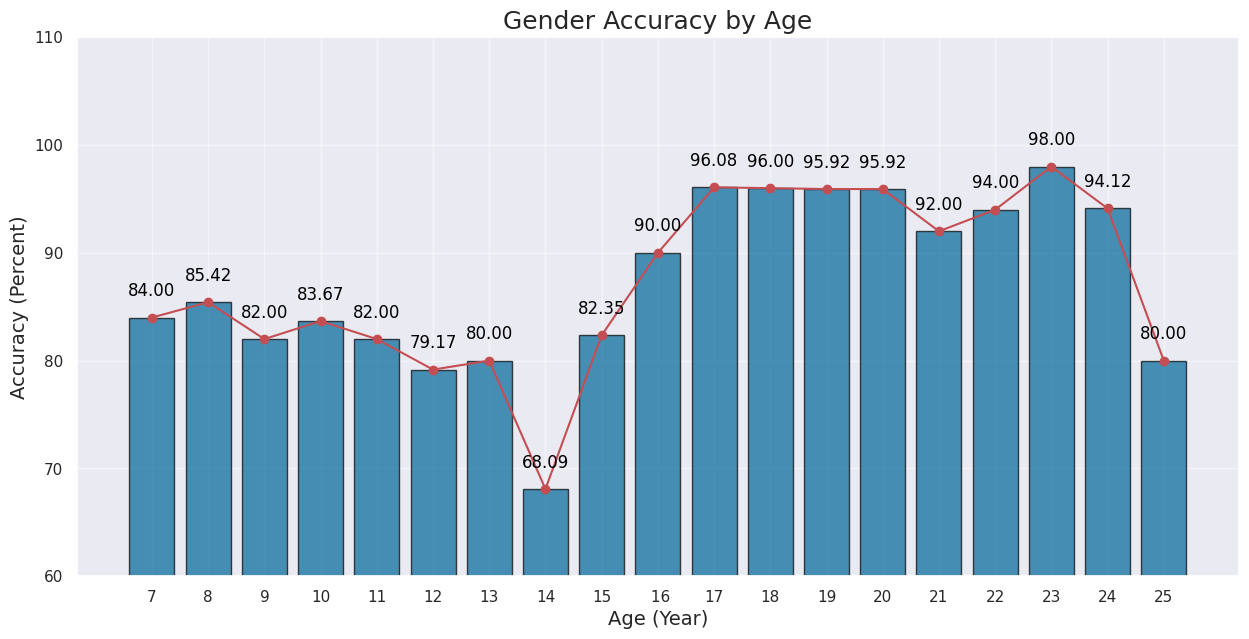

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
ages = ['7', '8', '9', '10', '11', '12', '13', '14', '15',' 16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
accuracy = [84.00, 85.42, 82.00, 83.67, 82.00, 79.17, 80.00, 68.09, 82.35, 90.00, 96.08, 96.00, 95.92, 95.92, 92.00, 94.00, 98.00, 94.12, 80.00]
#colors = [ '#051414','#0a2929','#0f3d3d', '#145252', '#196666', '#1f7a7a', '#248f8f', '#29a3a3', '#2eb8b8', '#33cccc', '#47d1d1','#5cd6d6', '#70dbdb', '#85e0e0', '#99e6e6', '#adebeb', '#c2f0f0', '#d6f5f5','#ebfafa']

# สร้างกราฟแท่ง
plt.subplot()
bars = plt.bar(ages, accuracy, width = 0.8, color = '#006699', alpha=0.7, edgecolor='black', linewidth=1)
plt.subplot()
plt.plot(ages, accuracy,'ro-')

plt.xticks(range(len(ages)), ages)
plt.xlabel('Age (Year)', fontsize=14)
plt.ylabel('Accuracy (Percent)',fontsize=14)
plt.title('Gender Accuracy by Age', fontsize=18)
plt.grid(True, alpha=0.5)
plt.ylim(60, 110)  # กำหนดช่วงค่าบนแกน y

# Add text labels for accuracy above each bar
for bar, accuracy in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 1 - 0.4, accuracy + 2, f'{accuracy:.2f}', ha='center', color='black',fontsize=12)

# แสดงกราฟ
plt.show();

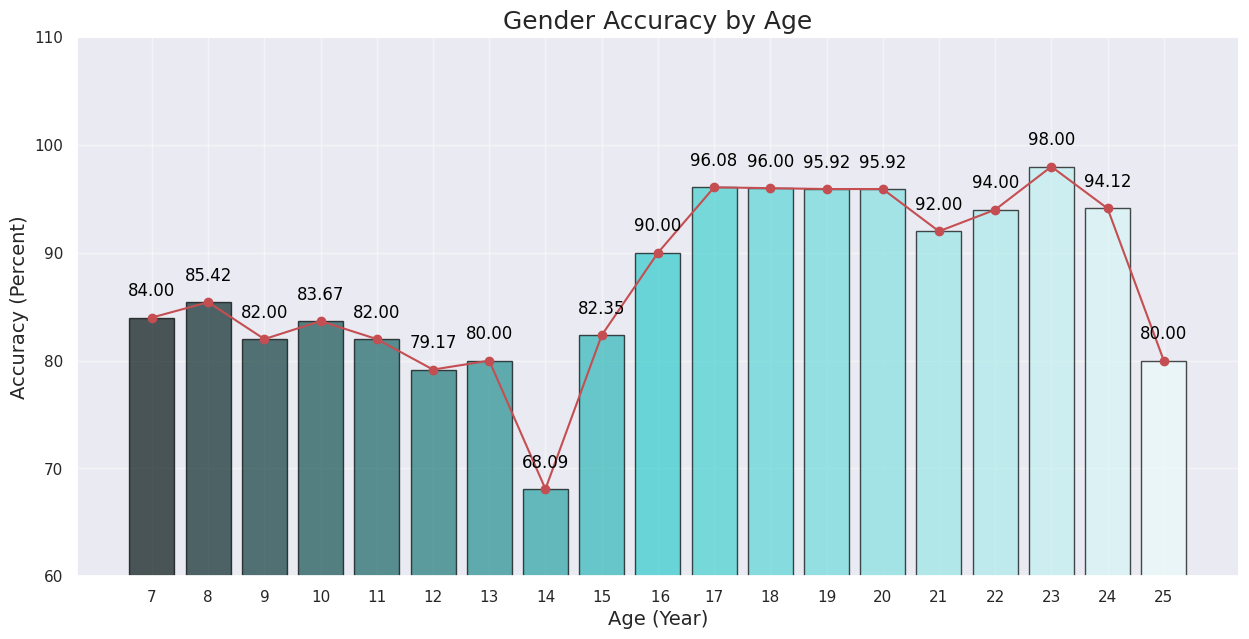

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
ages = ['7', '8', '9', '10', '11', '12', '13', '14', '15',' 16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
accuracy = [84.00, 85.42, 82.00, 83.67, 82.00, 79.17, 80.00, 68.09, 82.35, 90.00, 96.08, 96.00, 95.92, 95.92, 92.00, 94.00, 98.00, 94.12, 80.00]
colors = [ '#051414','#0a2929','#0f3d3d', '#145252', '#196666', '#1f7a7a', '#248f8f', '#29a3a3', '#2eb8b8', '#33cccc', '#47d1d1','#5cd6d6', '#70dbdb', '#85e0e0', '#99e6e6', '#adebeb', '#c2f0f0', '#d6f5f5','#ebfafa']

# สร้างกราฟแท่ง
plt.subplot()
bars = plt.bar(ages, accuracy, width = 0.8, color = colors, alpha=0.7, edgecolor='black', linewidth=1)
plt.subplot()
plt.plot(ages, accuracy,'ro-')

plt.xticks(range(len(ages)), ages)
plt.xlabel('Age (Year)', fontsize=14)
plt.ylabel('Accuracy (Percent)',fontsize=14)
plt.title('Gender Accuracy by Age', fontsize=18)
plt.grid(True, alpha=0.5)
plt.ylim(60, 110)  # กำหนดช่วงค่าบนแกน y

# Add text labels for accuracy above each bar
for bar, accuracy in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 1 - 0.4, accuracy + 2, f'{accuracy:.2f}', ha='center', color='black',fontsize=12)

# แสดงกราฟ
plt.show();

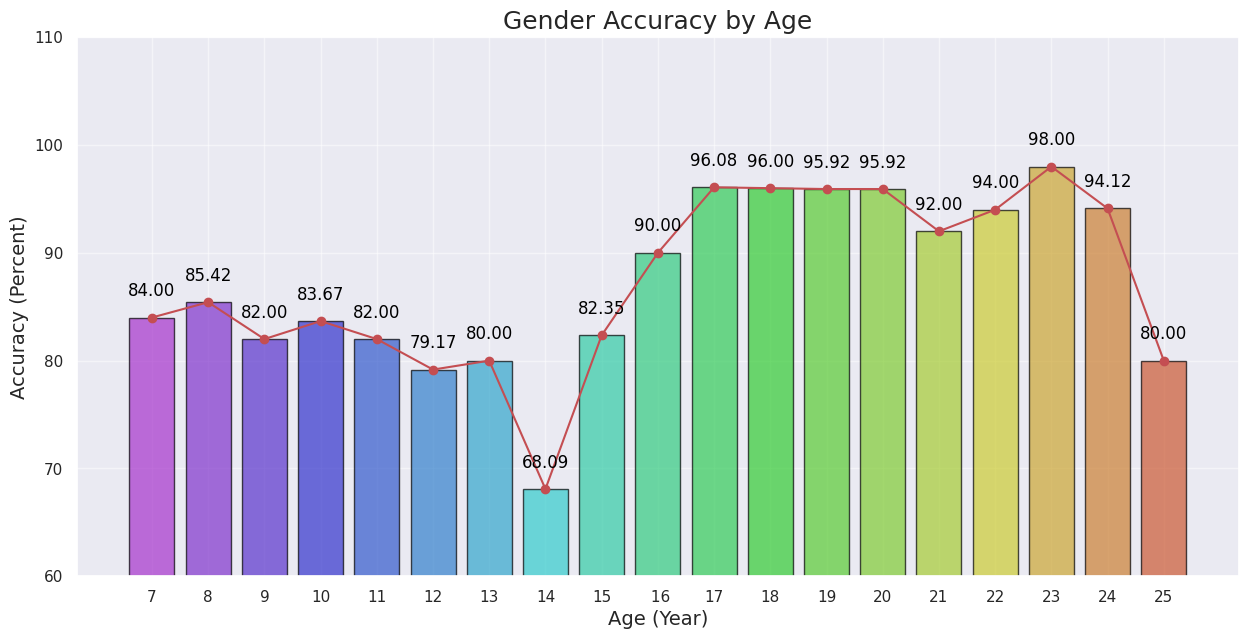

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
ages = ['7', '8', '9', '10', '11', '12', '13', '14', '15',' 16', '17', '18', '19', '20', '21', '22', '23', '24', '25']
accuracy = [84.00, 85.42, 82.00, 83.67, 82.00, 79.17, 80.00, 68.09, 82.35, 90.00, 96.08, 96.00, 95.92, 95.92, 92.00, 94.00, 98.00, 94.12, 80.00]
colors = [ '#a633cc','#8033cc','#5933cc', '#3333cc', '#3359cc', '#3380cc', '#33a6cc', '#33cccc', '#33cca6', '#33cc80', '#33cc59','#33cc33', '#59cc33', '#80cc33', '#a6cc33', '#cccc33', '#cca633', '#cc8033','#cc5933']

# สร้างกราฟแท่ง
plt.subplot()
bars = plt.bar(ages, accuracy, width = 0.8, color = colors, alpha=0.7, edgecolor='black', linewidth=1)
plt.subplot()
plt.plot(ages, accuracy,'ro-')

plt.xticks(range(len(ages)), ages)
plt.xlabel('Age (Year)', fontsize=14)
plt.ylabel('Accuracy (Percent)',fontsize=14)
plt.title('Gender Accuracy by Age', fontsize=18)
plt.grid(True, alpha=0.5)
plt.ylim(60, 110)  # กำหนดช่วงค่าบนแกน y

# Add text labels for accuracy above each bar
for bar, accuracy in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 1 - 0.4, accuracy + 2, f'{accuracy:.2f}', ha='center', color='black',fontsize=12)

# แสดงกราฟ
plt.show();